# Project 2: Ames Housing Data and Kaggle Challenge
-------

## Background
One important considerations when selling or buying the house is to determine the property price. If the price is set too high, the demand for the house reduces (less buyers). If the price is set too low, low, the supply of the house reduces (less sellers). Unfortunately, there is no simple way to determine the market value of the property and it is dependent on past comparable sales. Hence, there is a market need for an accurate property price predicting model. 

*In this project, the aim is to use the well known Ames housing data to create a regression model that predicts the price of houses in Ames, IA. The scope of the project is based on the features that are present in this dataset ([source](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge)).*


## Problem Statement
As part of a team of analysts in a property consultancy agency, which service home buyers/sellers in buying/selling houses for flipping investment purposes, the project aims to explore existing dataset and build a 'Predicting Property Price' (PPP) model that predicts the price of houses in Ames to narrow the gap between the desired selling/buying price of sellers/buyers, resulting in more successful transanction and income for the agency. The model, using linear, ridge or lasso, should serve the following function:
1. Support potential buyer/seller in analysing home prices, based on budget and preferences. 
2. Provide seller advice on features for renovation to sell the property at a higher price. 
3. Provide a reference for seller/buyer to verify if the price offered is above or below the expected price.

The model will be evaluated based on the Root Mean Squared Error (RMSE), which measures the differences between the true selling price and the predicted selling price. The project recommends the models with the lowest RMSE will be proposed to the Senior Management Team for adoption and equipping of all consultants in the agency. 

## Executive Summary

Property sale price is dependant on past comparable sale transanction. With the given data set, this project conducted data cleaning and imputed significant amount of missing data, while preserving the integrity of the data in order to develop an accurate predicting property price model. Thereafter, the data consisting of 80 features were categorised into four data types: Nominal, Ordinal, Continuous and Discrete. 

Exploratory Data Analysis was conducted to understand the features and their relation with the sale prices. Findings from the analysis were used to conduct the preliminary selection of features or re-categorise features. This would reduce the multi-collinearity of features and complexity of the model to be generated. As a result, the final data set has 65 features before One Hot Encoding (OHE) and 75 features after OHE. 

A baseline model using linear regression was built as a reference to evaluate subsequent models developed using Root Mean Squared Error (RMSE). After a few iterative process, the model with the lowest RMSE was selected and proposed to the senior management for adoption and implementation.

The final model, Ridge Model 5, has a total of 50 features. It has achieved a low RMSE of 24839 (about $25k difference between predicted sale price and true sale price) and able to explain 90% of the variability in the Sale Price. 

The model also identified the top 5 features, in terms of absolute coefficients, that has significant effect on sale price. They are 1stFlrSF, ExterQual_OverallQual metric, 2ndFlrSF, BsmtFinSF1_BsmtFinType1 metric and Neighborhood_UpperQuan. 

The model will help buyer/seller to consider the total cost of buying and selling the property and adjusts their requirements accordingly, e.g. buy a poor quality property then renovate to increase its valuation or buy a good quality property with minimal renovation needed. 

It also serve as a tool to provide a reference price to both seller and buyer so that both may agree on a common price. 



## Content

**Part 1**: Data Cleaning and EDA
1. [Data Cleaning](#1.-Data-Cleaning)
    - Analysis of dataset
    - Account for missing values
    - Catrgorise and update data types
    - Rename features
    - Clean test data set
2. [Exploratory Data Analysis (EDA)](#2.-Exploratory-Data-Analysis-(EDA))
    - Nominal Data
    - Ordinal Data
    - Continuous and Discrete Data
    - Export cleaned training and testing data
    
**Part 2**: Preprocessing and Modelling

1. Pre-processing of Data
    - Import data from Part 1
    - Train-Test-Split
    - Standard Scaling
2. Modelling
    - Model 1: Linear Regression Model (Baseline Model)
    - Model 2: Ridge Model
    - Model 3: Lasso Model
    - Model 4: Ridge Model (With outliers removed, Zero Lasso Coefficient features removed)
    - Model 5: Ridge Model (Engineered new features, Zero Lasso Coefficient features removed)
    - Overview of all models
    - Evaluation
3. Recommendations and Future Works
    - Propose Model 5
    - Future Works
4. Processing of Test Data for Kaggle Submission
    - Preparing Kaggle Test Data
    - Predict Sale Price
    - Kaggle Submissions Result
5. Conclusion

**Data Sets**

The data used for this project are:
1. [`train.csv`](../datasets/train.csv): This data contains all of the training data for the model created in this project.
2. [`test.csv`](../datasets/test.csv): This data contains the test data for model to be created. It will be fed into the regression model to make predictions.
    - The target variable (SalePrice) is excluded from the test set.

**Project Notebooks**

The project was seperated into the following seperate notebooks:
1. Data Cleaning and EDA
2. Preprocessing and Modelling


## Functions Definition

### subplot_histograms Function

In [1]:
# Define subplot histogram function. It takes the names of 2+ columns and subplot histograms.

def subplot_histograms(dataframe, list_of_columns, list_of_titles, 
                       list_of_xlabels, ylabels, plot_title, bin):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, sharex=False , sharey=True, figsize = (15,10))
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.suptitle(plot_title, fontsize=20, y=1.05)
    plt.xticks()
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        values, bins, bars = ax[i].hist(dataframe[column])
        ax[i].set_title(list_of_titles[i], fontsize=16, y=1.01)   # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)  # Set titles, labels, etc here for each subplot
        ax[i].set_ylabel(ylabels, fontsize=12)
        ax[i].axvline(dataframe[column].median(), color='r', 
                      linestyle='dashed', linewidth=1, 
                      label='median')
        ax[i].axvline(dataframe[column].mean(), color='k', 
                      linestyle='dashed', linewidth=1, 
                      label = 'mean')
        ax[i].legend()
        ax[i].bar_label(bars, fontsize=10) 
        
    plt.tight_layout()   

### subplot_boxplot Function

In [2]:
# Define subplot boxplot function. It takes the names of 2+ columns and subplot boxplot.

def subplot_boxplot(dataframe, y_value, 
                    list_of_columns, list_of_titles, 
                    list_of_xlabels, ylabels, 
                    plot_title, figsize):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, sharex=False , sharey=True, figsize = figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.tight_layout(h_pad = 5,pad=5);
    plt.suptitle(plot_title, fontsize=20, y=1.05)
    plt.xticks()
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(data=dataframe, x=column, y=y_value, ax=ax[i], palette="Blues");
        ax[i].set_title(list_of_titles[i], fontsize=16, y=1.01)   # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)  # Set titles, labels, etc here for each subplot
        ax[i].set_ylabel(ylabels, fontsize=12)
        
    # plt.tight_layout()   

### subplot_countplot Function

In [3]:
# Define subplot boxplot function. It takes the names of 2+ columns and subplot boxplot.

def subplot_countplot(dataframe, 
                      list_of_columns, list_of_titles, 
                      list_of_xlabels, 
                      plot_title, figsize):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, sharex=False , sharey=True, figsize = figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.tight_layout(h_pad = 5,pad=5);
    plt.suptitle(plot_title, fontsize=20, y=1.05)
    plt.xticks()
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.countplot(data=dataframe, x=column, ax=ax[i], palette="Blues");
        ax[i].set_title(list_of_titles[i], fontsize=16, y=1.01)   # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)  # Set titles, labels, etc here for each subplot
        ax[i].set_ylabel("Count", fontsize=12)
                
    # plt.tight_layout()   

### subplot_barplot Function

In [4]:
# Define subplot boxplot function. It takes the names of 2+ columns and subplot boxplot.

def subplot_barplot(dataframe, 
                    list_of_columns, list_of_titles, 
                    list_of_xlabels, 
                    plot_title, figsize):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, sharex=False , sharey=False, figsize = figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.suptitle(plot_title, fontsize=20, y=1.05)
    plt.xticks()
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.barplot(data=dataframe, x=column, y=dataframe[column].value_counts(), ax=ax[i], palette="Blues");
        ax[i].set_title(list_of_titles[i], fontsize=16, y=1.01)   # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)  # Set titles, labels, etc here for each subplot
        ax[i].set_ylabel('Count', fontsize=12)
        ax[i].bar_label(bars, fontsize=10) 
    
    plt.tight_layout()   

### subplot_regplot Function

In [5]:
# Define subplot regplot function. It takes the names of 2+ columns and subplot regplot.

def subplot_regplot(dataframe, y_value, 
                    list_of_columns, list_of_titles, 
                    list_of_xlabels, ylabels, 
                    plot_title, figsize=(10,15)):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, sharex=False , sharey=True, figsize = figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.suptitle(plot_title, fontsize=20, y=1.05)
    plt.xticks()
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.regplot(data=dataframe, x=column, y=y_value, ax=ax[i]);
        ax[i].set_title(list_of_titles[i], fontsize=16, y=1.01)   # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)  # Set titles, labels, etc here for each subplot
        ax[i].set_ylabel(ylabels, fontsize=12)
        
    plt.tight_layout()   

### map_ordinal Function

In [6]:
def map_ordinal(data, column, ordinal_dict):
    print(f" {column} ".center(22, "="))
    print(f"Before:\n{data[column].value_counts()}\n")
    data[column] = data[column].replace(ordinal_dict)
    print(f"After:\n{data[column].value_counts()}\n")
    return data.head()

### subplot_compare_nominal Function

In [7]:
# Define subplot boxplot function. It takes the names of 2+ columns and subplot boxplot.

def subplot_compare_nominal(dataframe, y_value,
                            list_of_columns, 
                            plot_title, figsize):
    nrows = int(np.ceil(len(list_of_columns))) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=False , sharey=False, figsize = figsize)
    plt.tight_layout(h_pad = 5,pad=5);
    plt.suptitle(plot_title, fontsize=20, y=1.05)
    plt.xticks()
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.countplot(data=dataframe, x=column, ax=ax[i][0], palette="Blues");
        ax[i][0].set_title(f"{column}", fontsize=16, y=1.01)   # feel free to add more settings
        ax[i][0].set_xlabel(f"{column}", fontsize=12)  # Set titles, labels, etc here for each subplot
        ax[i][0].set_ylabel("Count", fontsize=12)
        
        sns.boxplot(data=dataframe, x=column, y=y_value, ax=ax[i][1], palette="Blues");
        ax[i][1].set_title(f"{column}", fontsize=16, y=1.01)   # feel free to add more settings
        ax[i][1].set_xlabel(f"{column}", fontsize=12)  # Set titles, labels, etc here for each subplot
        ax[i][1].set_ylabel(f"{y_value}", fontsize=12)
        
    # plt.tight_layout()   

### compare_nominal Function

In [8]:
def compare_nominal(dataframe, column, y_value, plot_title, figsize):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False , sharey=False, figsize = figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.tight_layout(h_pad = 5,pad=5);
    plt.suptitle(plot_title, fontsize=20, y=1.05)
           
    sns.countplot(data=dataframe, x=column, ax=ax[0], palette="Blues")
    ax[0].set_title(f'{column}', fontsize=16, y=1.01)   # feel free to add more settings
    # ax[0].set_xlabel(f'{column}', fontsize=12)  # Set titles, labels, etc here for each subplot
    ax[0].set_ylabel('Counts', fontsize=12)
    ax[0].tick_params('x', labelrotation=45)
              
    sns.boxplot(data=dataframe, x=column, y=y_value, ax=ax[1], palette="Blues");
    ax[1].set_title(f'{column}', fontsize=16, y=1.01)   # feel free to add more settings
    # ax[1].set_xlabel(f'{column}', fontsize=12)  # Set titles, labels, etc here for each subplot
    ax[1].set_ylabel(f'{y_value}', fontsize=12)
    ax[1].tick_params('x', labelrotation=45)

    

### compare_discrete Function

In [9]:
def compare_discrete(dataframe, column, y_value, plot_title, figsize):
    fig, ax = plt.subplots(nrows=1, ncols=3, sharex=False , sharey=False, figsize = figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.tight_layout(h_pad = 5,pad=5);
    plt.suptitle(plot_title, fontsize=20, y=1.05)
    plt.xticks()
        
    sns.boxplot(data=dataframe, x=column, y=None, ax=ax[0], palette="Blues");
    ax[0].set_title(f'{column}', fontsize=16, y=1.01)   # feel free to add more settings
    ax[0].set_xlabel(f'{column}', fontsize=12)  # Set titles, labels, etc here for each subplot
    ax[0].set_ylabel('', fontsize=12)
    
    sns.barplot(data=dataframe, x=column, y=dataframe[column].value_counts(), ax=ax[1], palette="Blues");
    ax[1].set_title(f'{column}', fontsize=16, y=1.01)   # feel free to add more settings
    ax[1].set_xlabel(f'{column}', fontsize=12)  # Set titles, labels, etc here for each subplot
    ax[1].set_ylabel('Counts', fontsize=12)
    # ax[i].bar_label(bars, fontsize=10) 
    
    sns.boxplot(data=dataframe, x=column, y=y_value, ax=ax[2], palette="Blues");
    ax[2].set_title(f'{column}', fontsize=16, y=1.01)   # feel free to add more settings
    ax[2].set_xlabel(f'{column}', fontsize=12)  # Set titles, labels, etc here for each subplot
    ax[2].set_ylabel(f'{y_value}', fontsize=12)
    

    

### compare_histograms Function

In [10]:
# create a function to compare histograms of original & imputed data
def compare_histograms(imputed_column, original_column, x_label, y_label = 'Frequency'):
    fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols = 1, figsize = (16,9))

    # Set axes of histograms.
    mode = statistics.mode(imputed_column)
    rnge = max(original_column) - min(original_column)
    xmin = min(original_column) - 0.02 * rnge
    xmax = max(original_column) + 0.02 * rnge
    ymax = 40

    ax0.set_xlim(xmin, xmax)
    ax0.set_ylim(0, ymax)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(0, ymax)

    # Set top labels.
    ax0.set_title('Real Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax0.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax0.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax0.set_xticks([])
    ax0.set_yticks([])

    # Generate top histogram.
    ax0.hist(original_column, bins = 15, color = '#185fad', alpha = 0.75, label = '')
    ax0.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax0.legend(prop={'size': 15}, loc = 1)

    # Set bottom labels.
    ax1.set_title('Imputed Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax1.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax1.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Generate bottom histogram.
    ax1.hist(imputed_column, bins = 15, color = 'orange', alpha = 0.75, label = '', stacked = True)
    ax1.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax1.axvline(np.mean(imputed_column), color = 'darkorange', lw = 5, label = 'Imputed Mean')
    ax1.legend(prop={'size': 15}, loc = 1)

    plt.tight_layout();

---
## 1. Data Cleaning

### Data Preparation

#### Libraries
All libraries are imported here.

In [11]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

#Stylistic Choice:
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

# modeling imports
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [12]:
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 60)

---
#### Data Import

In [13]:
# reading data of all selected dataset 
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

---
#### Displaying and Analysing Data

Display the data: print the first 5 rows of each dataframe.

In [14]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond  ... Half Bath  \
0      BrkFace         289.0         Gd         TA  ...         1   
1      BrkFace         132.0         Gd         TA  ...         1   
2         None           0.0         TA         Gd  ...         0   
3         None           0.0         TA         TA  ...         1   
4         None           0.0         TA         TA  ...         0   

  Bedroom AbvGr Kitchen AbvGr Kitchen Qual TotRms AbvGrd  Functional  \
0             3             1           Gd             6         Typ   
1             4             1           Gd             8         Typ   
2             3             1           Gd             5         Typ   
3             3             1           TA             7         Typ   
4             3             1           TA             6         Typ   

  Fireplaces  Fireplace Qu  Garage Type  Garage Yr Blt Garage Finish  \
0          0           NaN       Attchd         1976.0           RFn   
1          1            TA       Attchd         1997.0           RFn   
2          0           NaN       Detchd         1953.0           Unf   
3          0           NaN      BuiltIn         2007.0           Fin   
4          0           NaN       Detchd         1957.0           Unf   

  Garage Cars Garage Area Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  \
0         2.0       475.0          TA           TA            Y             0   
1         2.0       559.0          TA           TA            Y             0   
2         1.0       246.0          TA           TA            Y             0   
3         2.0       400.0          TA           TA            Y           100   
4         2.0       484.0          TA           TA            N             0   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0             44               0           0             0          0   
1             74               0           0             0          0   
2             52               0           0             0          0   
3              0               0           0             0    

In [15]:
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond  ... Full Bath Half Bath  \
0         None           0.0         TA         Fa  ...         2         0   
1         None           0.0         TA         TA  ...         2         0   
2         None           0.0         Gd         TA  ...         2         1   
3         None           0.0         Gd         TA  ...         1         0   
4      BrkFace         247.0         TA         TA  ...         1         1   

  Bedroom AbvGr Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  \
0             4             2           Fa              9        Typ   
1             6             2           TA             10        Typ   
2             3             1           Gd              7        Typ   
3             2             1           TA              5        Typ   
4             3             1           TA              6        Typ   

   Fireplaces  Fireplace Qu  Garage Type Garage Yr Blt Garage Finish  \
0           0           NaN       Detchd        1910.0           Unf   
1           0           NaN       Attchd        1977.0           Fin   
2           1            Gd       Attchd        2006.0           RFn   
3           0           NaN       Detchd        1935.0           Unf   
4           2            Gd       Attchd        1963.0           RFn   

  Garage Cars Garage Area  Garage Qual  Garage Cond  Paved Drive  \
0           1         440           Po           Po            Y   
1           2         580           TA           TA            Y   
2           2         426           TA           TA            Y   
3           2         480           Fa           TA            N   
4           2         514           TA           TA            Y   

   Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
0             0             60             112           0             0   
1           170              0               0           0             0   
2           100             24               0           0             0   
3             0              0             184           0     

In the train data set, there are 81 columns. Excluding the 'SalePrice' columns, it is implied that there are 80 features. 

In [16]:
# check the size of the dataset
train.shape, test.shape

((2051, 81), (878, 80))

In [17]:
# Check the proportion of train set to test set.
len(train)/ (len(train)+len(test))

0.700238989416183

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

----
Check for missing values.

In [19]:
# Verify that the saleprice was removed from test set. 
set(train.columns) - set(test.columns)

{'SalePrice'}

In [20]:
# Checking features that has null values
check_null_df = train.isnull().sum().sort_values(ascending=False)

# Display features with null values
null_features = check_null_df[check_null_df>0]
null_features

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
dtype: int64

In [21]:
# Check number of features with null values.
null_features.shape

(26,)

In [22]:
# Calculate number of data equivalent to 5% of train data set. 
len(train)*0.05

102.55000000000001

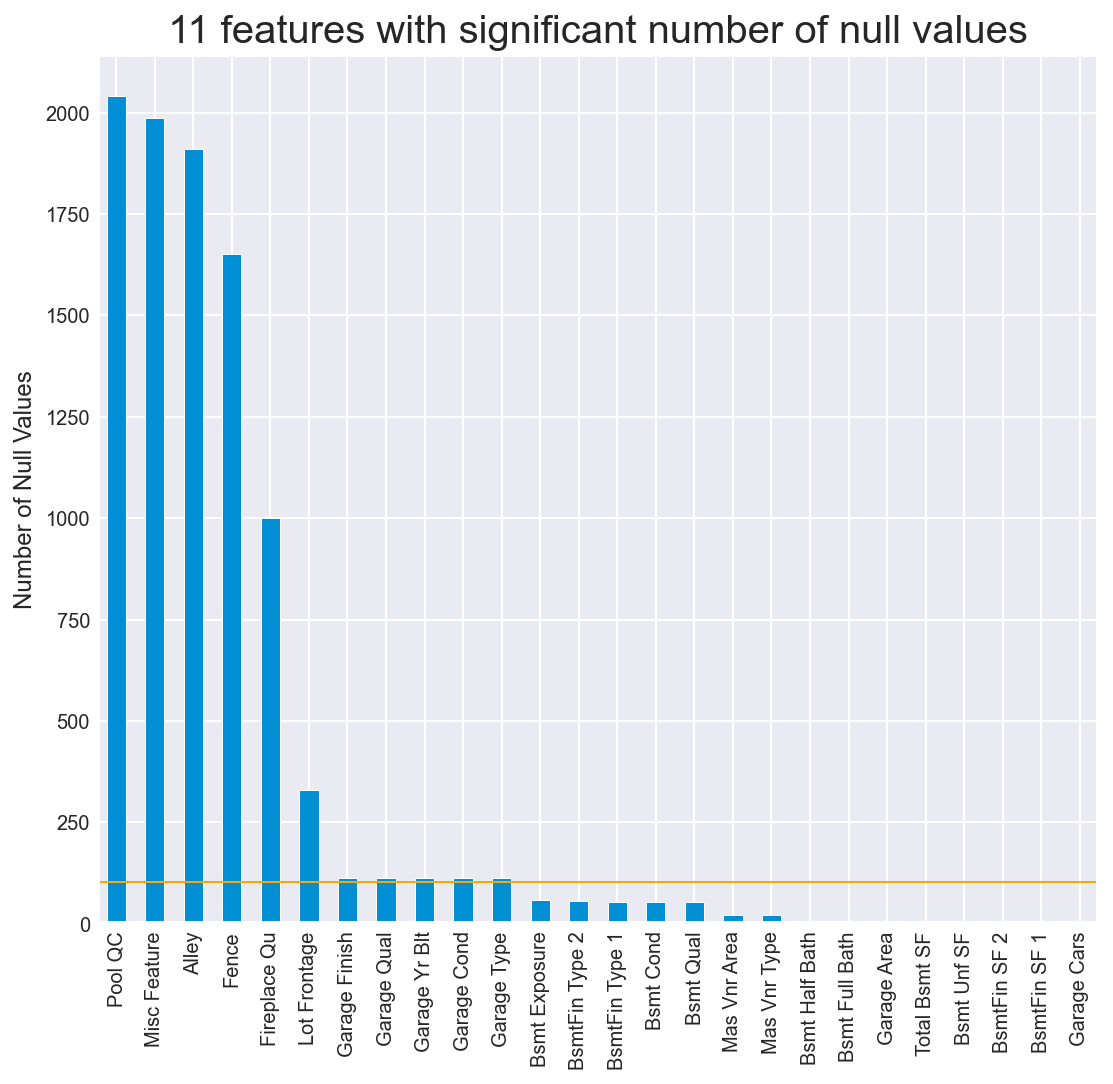

In [23]:
# plot features with null values in a bar chart.
plt.figure(figsize=(8, 8))
null_features.plot.bar();
plt.axhline(y=int(len(train)*0.05), 
            linestyle='-', linewidth=1,
            color='orange', label='Quantities=103');
plt.ylabel('Number of Null Values');
plt.title('11 features with significant number of null values', 
          fontsize=20);

There are 26 features with null values. 
Features with more than 5% null values (>103 null values) are:
- `Pool QC`
- `Misc Feature`
- `Alley`
- `Fence`
- `Fireplace Qu`
- `Lot Frontage`
- `Garage Finish`      
- `Garage Qual`        
- `Garage Yr Blt`      
- `Garage Cond`        
- `Garage Type` 

In [24]:
# Creating a series of features with significant number of null values.
features_with_many_missing_values = null_features[null_features>103]
features_with_many_missing_values

Pool QC          2042
Misc Feature     1986
Alley            1911
Fence            1651
Fireplace Qu     1000
Lot Frontage      330
Garage Finish     114
Garage Qual       114
Garage Yr Blt     114
Garage Cond       114
Garage Type       113
dtype: int64

In [25]:
# Checking the data types for features with null values
train[null_features.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pool QC         9 non-null      object 
 1   Misc Feature    65 non-null     object 
 2   Alley           140 non-null    object 
 3   Fence           400 non-null    object 
 4   Fireplace Qu    1051 non-null   object 
 5   Lot Frontage    1721 non-null   float64
 6   Garage Finish   1937 non-null   object 
 7   Garage Qual     1937 non-null   object 
 8   Garage Yr Blt   1937 non-null   float64
 9   Garage Cond     1937 non-null   object 
 10  Garage Type     1938 non-null   object 
 11  Bsmt Exposure   1993 non-null   object 
 12  BsmtFin Type 2  1995 non-null   object 
 13  BsmtFin Type 1  1996 non-null   object 
 14  Bsmt Cond       1996 non-null   object 
 15  Bsmt Qual       1996 non-null   object 
 16  Mas Vnr Area    2029 non-null   float64
 17  Mas Vnr Type    2029 non-null   o

In [26]:
# Display first few rows of dataframe of features with null values.
train[null_features.index].head()

Pool QC Misc Feature Alley Fence Fireplace Qu  Lot Frontage Garage Finish  \
0     NaN          NaN   NaN   NaN          NaN           NaN           RFn   
1     NaN          NaN   NaN   NaN           TA          43.0           RFn   
2     NaN          NaN   NaN   NaN          NaN          68.0           Unf   
3     NaN          NaN   NaN   NaN          NaN          73.0           Fin   
4     NaN          NaN   NaN   NaN          NaN          82.0           Unf   

  Garage Qual  Garage Yr Blt Garage Cond Garage Type Bsmt Exposure  \
0          TA         1976.0          TA      Attchd            No   
1          TA         1997.0          TA      Attchd            No   
2          TA         1953.0          TA      Detchd            No   
3          TA         2007.0          TA     BuiltIn            No   
4          TA         1957.0          TA      Detchd            No   

  BsmtFin Type 2 BsmtFin Type 1 Bsmt Cond Bsmt Qual  Mas Vnr Area  \
0            Unf            GLQ        TA        TA         289.0   
1            Unf            GLQ        TA        Gd         132.0   
2            Unf            GLQ        TA        TA           0.0   
3            Unf            Unf        TA        Gd           0.0   
4            Unf            Unf        Gd        Fa           0.0   

  Mas Vnr Type  Bsmt Half Bath  Bsmt Full Bath  Garage Area  Total Bsmt SF  \
0      BrkFace             0.0             0.0        475.0          725.0   
1      BrkFace             0.0             1.0        559.0          913.0   
2         None             0.0             1.0        246.0         1057.0   
3         None             0.0             0.0        400.0          384.0   
4         None             0.0             0.0        484.0          676.0   

   Bsmt Unf SF  BsmtFin SF 2  BsmtFin SF 1  Garage Cars  
0        192.0           0.0         533.0          2.0  
1        276.0           0.0         637.0          2.0  
2        326.0           0.0         731.0          1.0  
3        384.0           0.0           0.0          2.0  
4        676.0           0.0           0.0          2.0

---
Check for duplicated rows. There are no duplicated rows. 

In [27]:
# Check for duplicated rows
train[train.duplicated()]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

---
Check if Id and PID are unique. Since both are unique, they are assessed to be not useful in predicting the price of the properties and is dropped. 

In [28]:
# In addition to the above, verify that all transanction are unique
train['Id'].value_counts().sort_values(ascending=False)

109     1
2006    1
153     1
318     1
255     1
       ..
785     1
916     1
639     1
525     1
10      1
Name: Id, Length: 2051, dtype: int64

In [29]:
# Verify if all PID are unique
train['PID'].value_counts().sort_values(ascending=False)

533352170    1
903201090    1
535304180    1
916386060    1
906425045    1
            ..
905377130    1
909253010    1
535179160    1
528477070    1
527162130    1
Name: PID, Length: 2051, dtype: int64

In [30]:
# Since both are unique, they are assessed to be not useful in predicting the price of the properties and is dropped.
train.drop(columns=['Id', 'PID'], inplace=True)

##### Summary of Observations 
1. The train data set constitutes to 70% of the total datasets (train and test combined).
2. There are a total of 80 features in the original data set.
3. The test data excludes the 'SalePrice' column, which the model aims to predict.

For the train data set:
1. There are no duplicated rows. 
2. There are 26 columns (features) with null values.  
    - There are 11 features with more than 5% null values (>103 null values). These features will need to be assessed and imputed subsequently. These features are:
        - `Pool QC`
        - `Misc Feature`
        - `Alley`
        - `Fence`
        - `Fireplace Qu`
        - `Lot Frontage`
        - `Garage Finish`      
        - `Garage Qual`        
        - `Garage Yr Blt`      
        - `Garage Cond`        
        - `Garage Type` 
    - As the remaining 15 features has less than 5% null values (<103 null values), the missing data will be ignored and not accounted. 
4. Both `Id` and `PID` columns values are unique, they are assessed to be not useful in predicting the price of the properties and are dropped.


---
#### Account for Features with Missing Data

In [31]:
# recall features with significant number of missing values. 
features_with_many_missing_values

Pool QC          2042
Misc Feature     1986
Alley            1911
Fence            1651
Fireplace Qu     1000
Lot Frontage      330
Garage Finish     114
Garage Qual       114
Garage Yr Blt     114
Garage Cond       114
Garage Type       113
dtype: int64

##### `Pool QC`
- There is one more column relating to pool: `Pool Area`. For `Pool Area` column, it has 2041 rows with 0 pool area. This means that there is no pool in these properties.
- The total number of input for `Pool QC` column corresponds to the total number of data for `Pool Area` with non-zero value. Hence, it is deduced that the null values for `Pool QC` should be 'NotApplicable' (no pool) instead.

In [32]:
# Create a datafrom for pool related columns and sale price. 
pool_df = train[['Pool QC', 'Pool Area', 'SalePrice']]

In [33]:
# Count the number of unique values in 'Pool Area'
train['Pool Area'].value_counts()

0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: Pool Area, dtype: int64

In [34]:
# Display data for properties with pool. 
pool_df[pool_df['Pool Area']!=0]

Pool QC  Pool Area  SalePrice
52        Fa        519     250000
657       Gd        576     171000
761       Gd        800     260000
952       Ex        228     315000
960       Gd        480     160000
1130      Fa        648     181000
1249      Gd        738     274970
1635      TA        368     153000
1875      TA        561     130000

In [35]:
#The total number of input for Pool QC column corresponds to 
# the total number of data for Pool Area with non-zero value. 
# Hence, it is deduced that the null values for Pool QC 
# should be 'NotApplicable' (no pool) instead.

# Replace null value in 'Pool QC' column with 'NotApplicable'
train['Pool QC'].fillna('NotApplicable', inplace=True)

In [36]:
# Check that all null values in 'Pool QC' are replaced
train['Pool QC'].value_counts()

NotApplicable    2042
Gd                  4
Fa                  2
TA                  2
Ex                  1
Name: Pool QC, dtype: int64

In [37]:
train.isnull().sum().sort_values(ascending=False)

Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
Lot Frontage     330
                ... 
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 79, dtype: int64

##### `Misc Feature`
- Coloumns related to `Misc Feature`: `Misc Val`
- From the 65 non-null values in the 'Misc Feature' column, their corresponding 'SalePrice' distribution for the individual category does not seem to significantly differentiate that properties from the others (see boxplot below).
- Although property with Tennis Court may fetch a higher price, there is only one entry with such transaction and is insufficient to be considered when creating the model. 
- From the heatmap, the individual category in the 'Misc Feature' also do not have significant correlations to sale price. 
- Therefore, `Misc Feature` and `Misc Val` columns are dropped due to the large number of null value and its insignificance in determining the sale price. 

In [38]:
# Checking the values in 'Misc Feature' columns.
train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [39]:
# Display Misc Feature and Misc Val columns
train.groupby('Misc Feature')[['Misc Feature', 'Misc Val']].value_counts()

Misc Feature  Misc Val
Elev          17000        1
Gar2          3000         1
              12500        1
              8300         1
              4500         1
Othr          6500         1
              3500         1
              3000         1
Shed          400         12
              500          8
              600          6
              450          5
              2000         4
              700          4
              2500         2
              1200         2
              4500         1
              1500         1
              1300         1
              1150         1
              900          1
              800          1
              650          1
              480          1
              460          1
              455          1
              300          1
              80           1
              54           1
TenC          2000         1
dtype: int64

In [40]:
# Recap on the number of null values for 'Misc Feature'
train['Misc Feature'].isnull().sum()

1986

In [41]:
# Check the corresponding Misc Value for the null value in Misc Feature columns. 
# There is no anomaly observed. 
train[train['Misc Feature'].isnull()]['Misc Val'].value_counts()

0    1986
Name: Misc Val, dtype: int64

In [42]:
# Assuming rows with null values in 'Misc Feature' are NA. 
# The objective is to understand the distribution of 'SalePrice' 
# for these rows compared with the 'Misc Feature' input.
train['Misc Feature'].fillna('NotApplicable', inplace=True)

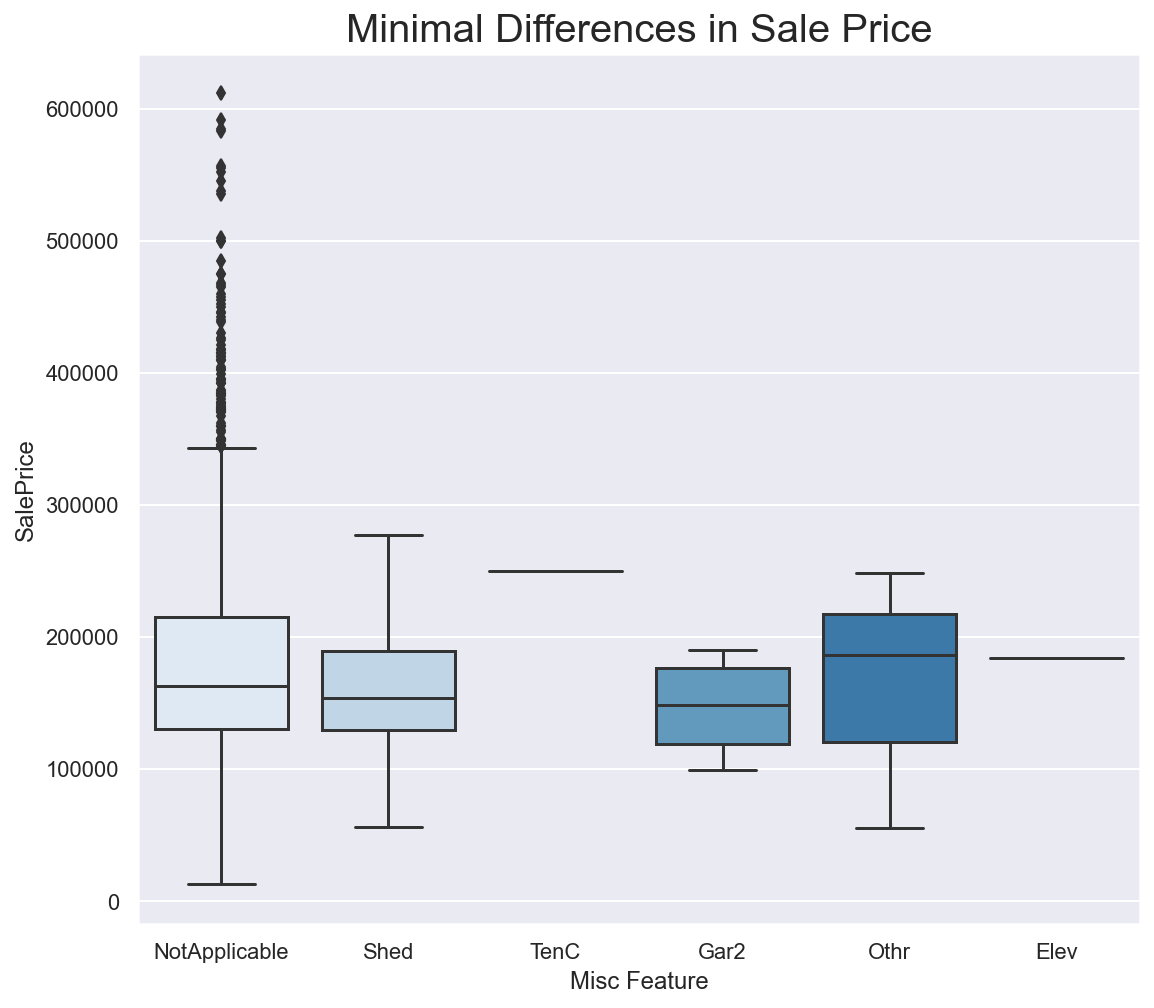

In [43]:
# plot boxplot of 'Misc Feature' against 'SalePrice'
sns.set(rc={'figure.figsize':(8,8)})
misc_feature_boxplot = sns.boxplot(data=train, x='Misc Feature', y='SalePrice', palette="Blues");
misc_feature_boxplot.set_title('Minimal Differences in Sale Price', fontsize=20);

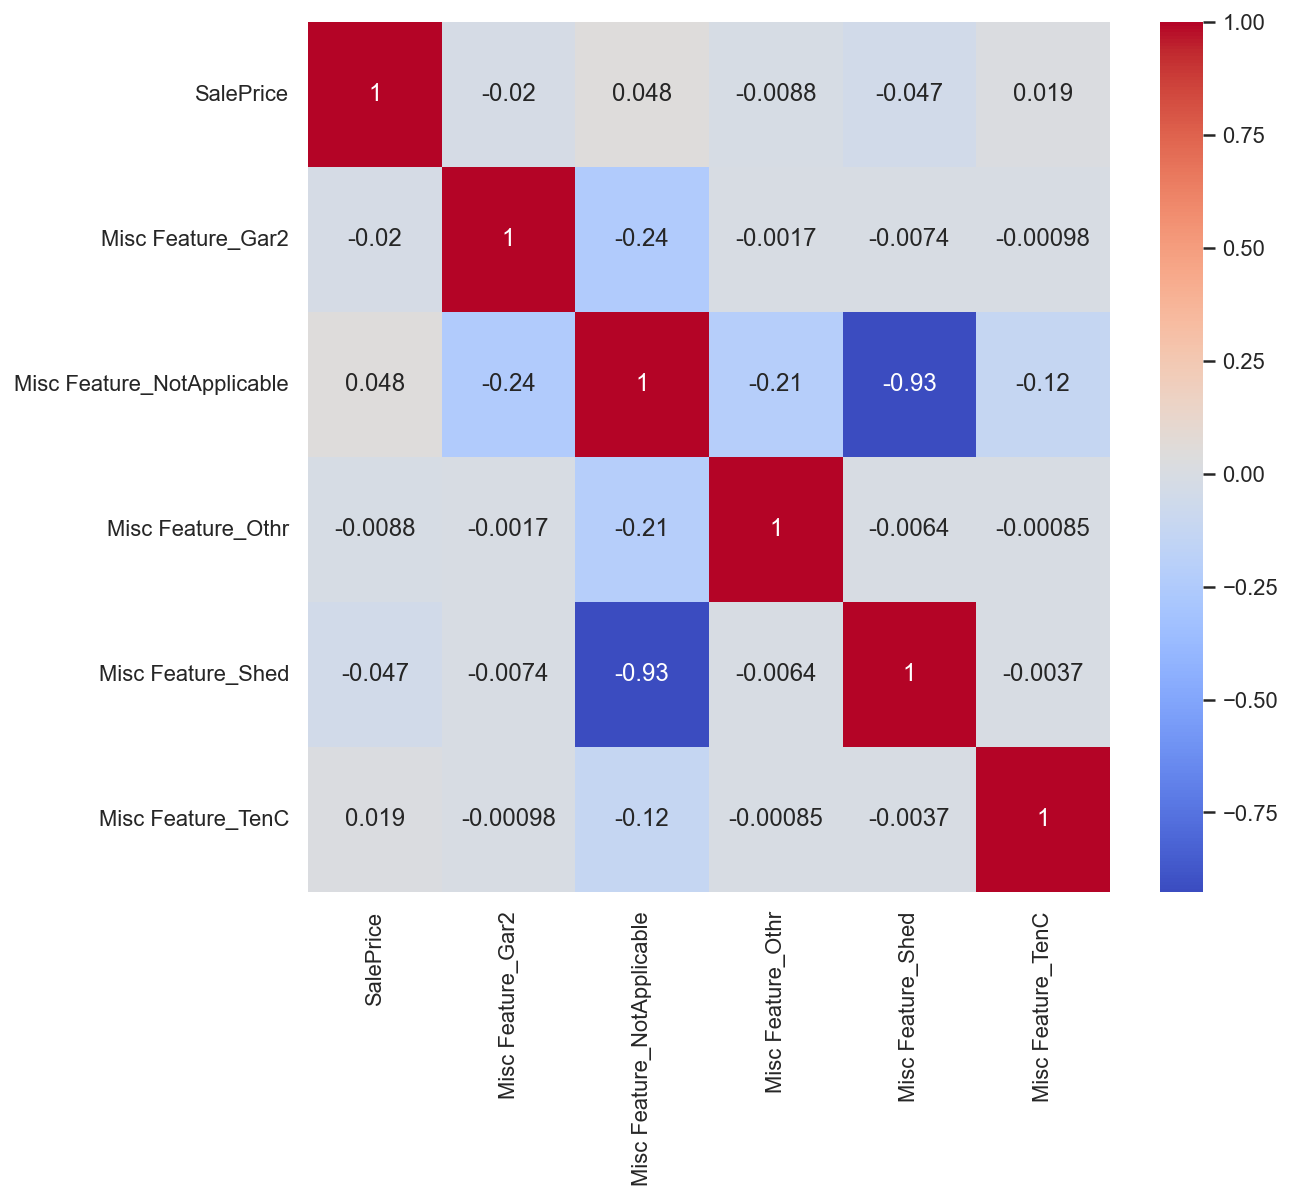

In [44]:
# create 'Misc Feature' dataframe, which will be used to understand correlations with 'Sale Price'
misc_features_df = pd.get_dummies(train[['Misc Feature', 'SalePrice']], columns=['Misc Feature'], drop_first=True)
sns.heatmap(misc_features_df.corr(), annot=True, cmap='coolwarm');

In [45]:
# Misc Feature column is dropped due to the large number of null value 
# and its insignificance in determining the sale price.
train.drop(columns=['Misc Feature', 'Misc Val'], inplace=True)

# check if 'Misc Feature' column was removed
train.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           60        RL           NaN     13517   Pave   NaN       IR1   
1           60        RL          43.0     11492   Pave   NaN       IR1   
2           20        RL          68.0      7922   Pave   NaN       Reg   
3           60        RL          73.0      9802   Pave   NaN       Reg   
4           50        RL          82.0     14235   Pave   NaN       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  ...  \
0         289.0         Gd         TA     CBlock        TA  ...   
1         132.0         Gd         TA      PConc        Gd  ...   
2           0.0         TA         Gd     CBlock        TA  ...   
3           0.0         TA         TA      PConc        Gd  ...   
4           0.0         TA         TA      PConc        Fa  ...   

  Bsmt Half Bath Full Bath Half Bath  Bedroom AbvGr Kitchen AbvGr  \
0            0.0         2         1              3             1   
1            0.0         2         1              4             1   
2            0.0         1         0              3             1   
3            0.0         2         1              3             1   
4            0.0         2         0              3             1   

   Kitchen Qual  TotRms AbvGrd  Functional Fireplaces Fireplace Qu  \
0            Gd              6         Typ          0          NaN   
1            Gd              8         Typ          1           TA   
2            Gd              5         Typ          0          NaN   
3            TA              7         Typ          0          NaN   
4            TA              6         Typ          0          NaN   

  Garage Type Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  \
0      Attchd        1976.0            RFn          2.0        475.0   
1      Attchd        1997.0            RFn          2.0        559.0   
2      Detchd        1953.0            Unf          1.0        246.0   
3     BuiltIn        2007.0            Fin          2.0        400.0   
4      Detchd        1957.0            Unf          2.0        484.0   

   Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  Open Porch SF  \
0           TA           TA            Y             0             44   
1           TA           TA            Y             0             74   
2           TA           TA            Y             0             52   
3           TA           TA            Y           100              0   
4           TA           TA            N             0             59   

   Enclosed Porch  3Ssn Porc

##### `Alley`
- The other columns related to gravel or paved categories are `Street` and `Paved Drive`.
- When the dataframe is grouped by `Alley` columns, the `Street` and `Paved Drive` type is 'Paved'.
- From the boxplots below, it is observed that paved street access to property has higher sale price compared to gravel street access.
- While the type of alley access is able to differentiate the sale prices for property with paved street access, the alley values only makes up to about 7% (140 alley values/ 2044 paved street) of the property with paved street. 
- In addition, if `Alley` feature is included in the regression model, it is likely that multi-collinearity will increase. 
- Therefore, `Alley` feature is dropped from the train data set. 



In [46]:
# Checking the values in 'Alley' columns.
train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [47]:
# Recap on the number of null values for 'Alley'
train['Alley'].isnull().sum()

1911

In [48]:
# Create a datafrom for related columns and sale price. 
alley_related_df = train[['Alley', 'Street', 'Paved Drive', 'SalePrice']]

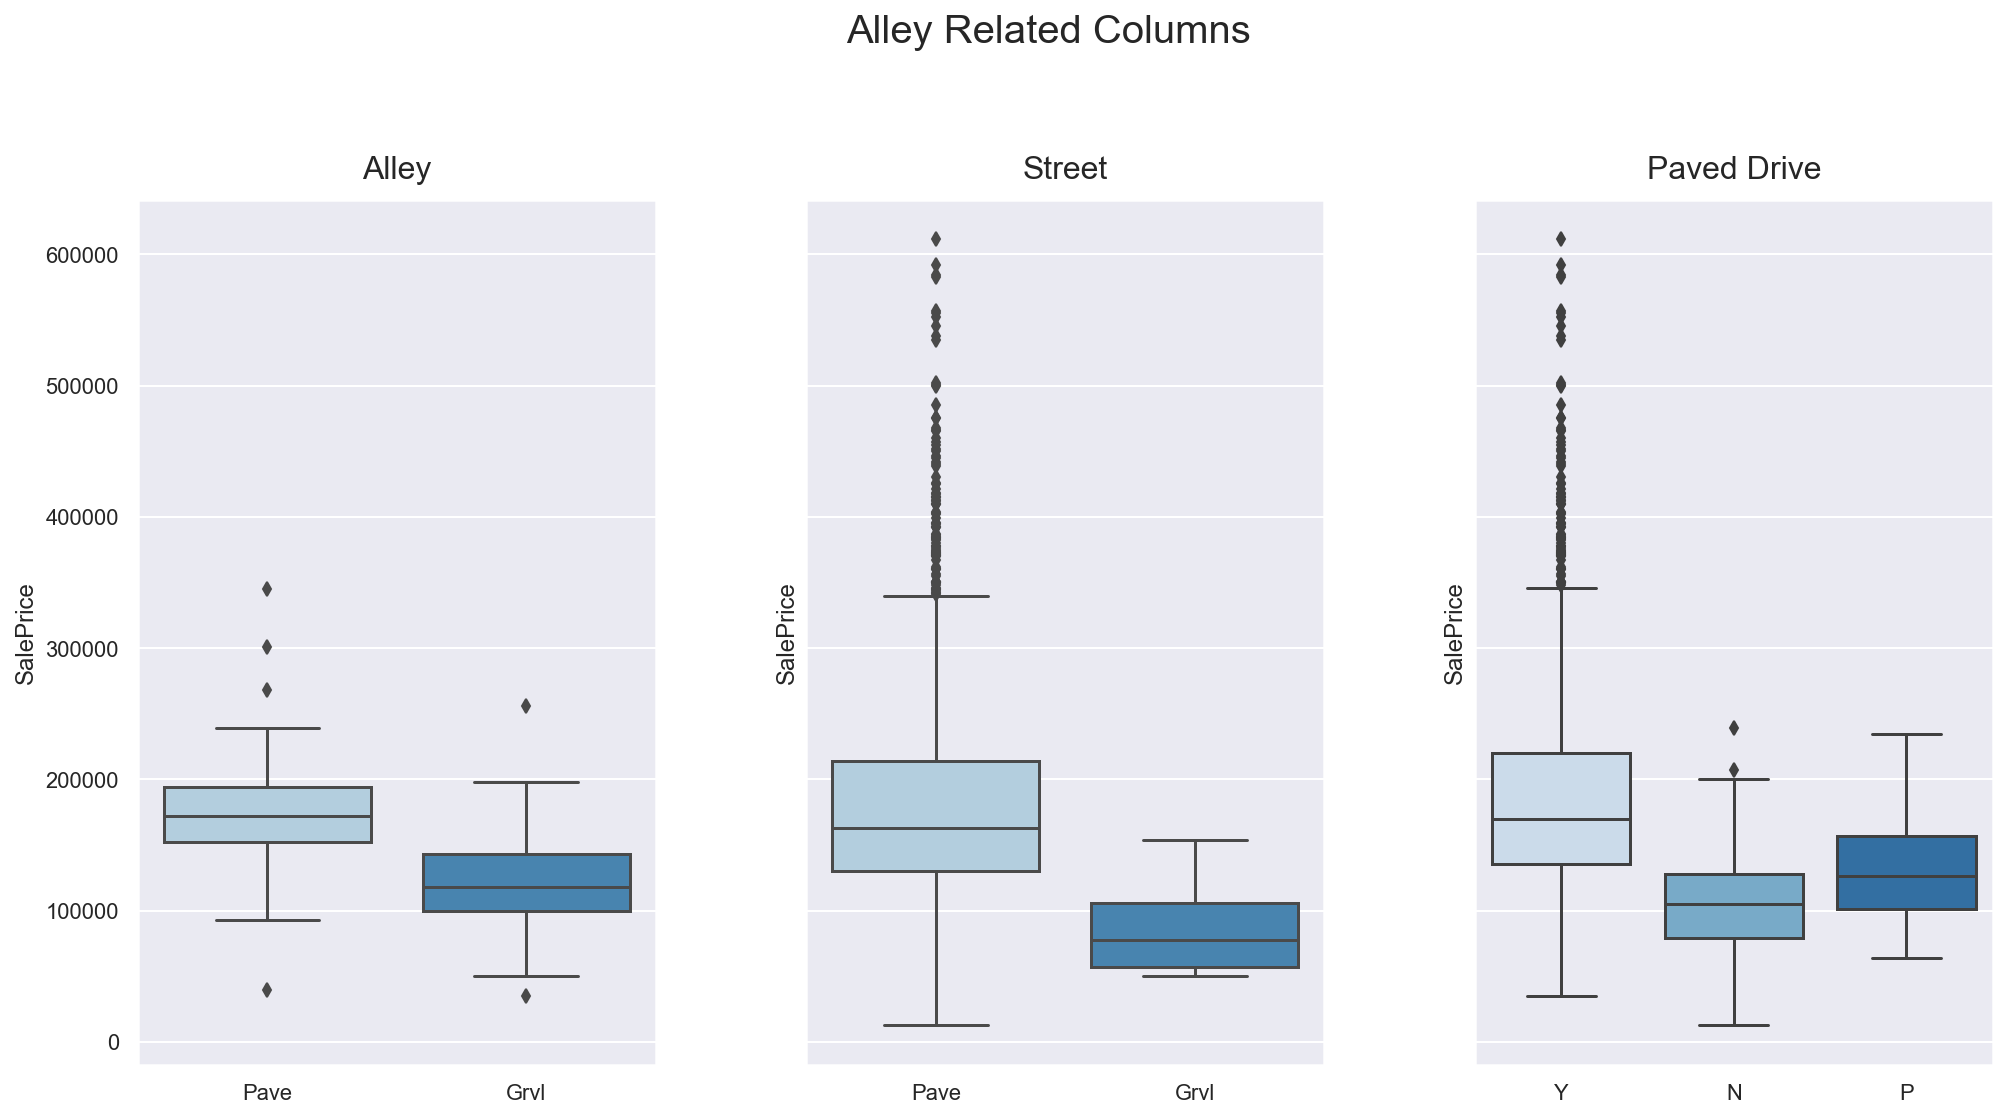

In [49]:
# plot boxplot of 'Alley' against 'SalePrice'
subplot_boxplot(dataframe=alley_related_df,
                y_value='SalePrice', 
                list_of_columns=['Alley', 'Street', 'Paved Drive'],
                list_of_titles=['Alley', 'Street', 'Paved Drive'], 
                list_of_xlabels=['']*3, 
                ylabels='SalePrice', 
                plot_title='Alley Related Columns', 
                figsize=(15,8));

In [50]:
# Checking the various various combinations of alley with 'Street' and 'Paved Drive' columns 
alley_related_df.groupby('Alley').value_counts()

Alley  Street  Paved Drive  SalePrice
Grvl   Pave    Y            140000       2
                            150000       2
                            122000       2
                            120000       2
                            110000       2
                                        ..
Pave   Pave    Y            197000       1
                            199900       1
                            149500       1
                            200000       1
                            345000       1
Length: 126, dtype: int64

In [51]:
# since alley is only related to paved street, 
# a comparison is done on the number of values for paved street. 
train['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

While the type of alley access is able to differentiate the sale prices for property with paved street access, the alley values only makes up to about 7% (140 alley values/ 2044 paved street) of the property with paved street. In addition, if `Alley` feature is included in the regression model, it is likely that multi-collinearity will increase. Therefore, `Alley` feature is dropped from the train data set.


In [52]:
# Alley column is dropped due to insignificant size of values 
# and increase likelihood of multi-collinearity.
train.drop(columns='Alley', inplace=True)

# check if 'Alley' column was removed
train.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0           60        RL           NaN     13517   Pave       IR1   
1           60        RL          43.0     11492   Pave       IR1   
2           20        RL          68.0      7922   Pave       Reg   
3           60        RL          73.0      9802   Pave       Reg   
4           50        RL          82.0     14235   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  ...  \
0         289.0         Gd         TA     CBlock        TA        TA  ...   
1         132.0         Gd         TA      PConc        Gd        TA  ...   
2           0.0         TA         Gd     CBlock        TA        TA  ...   
3           0.0         TA         TA      PConc        Gd        TA  ...   
4           0.0         TA         TA      PConc        Fa        Gd  ...   

  Bsmt Half Bath Full Bath  Half Bath Bedroom AbvGr  Kitchen AbvGr  \
0            0.0         2          1             3              1   
1            0.0         2          1             4              1   
2            0.0         1          0             3              1   
3            0.0         2          1             3              1   
4            0.0         2          0             3              1   

   Kitchen Qual  TotRms AbvGrd Functional Fireplaces Fireplace Qu Garage Type  \
0            Gd              6        Typ          0          NaN      Attchd   
1            Gd              8        Typ          1           TA      Attchd   
2            Gd              5        Typ          0          NaN      Detchd   
3            TA              7        Typ          0          NaN     BuiltIn   
4            TA              6        Typ          0          NaN      Detchd   

   Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  Garage Qual  \
0         1976.0            RFn          2.0        475.0           TA   
1         1997.0            RFn          2.0        559.0           TA   
2         1953.0            Unf          1.0        246.0           TA   
3         2007.0            Fin          2.0        400.0           TA   
4         1957.0            Unf          2.0        484.0           TA   

   Garage Cond  Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0           TA            Y             0             44               0   
1           TA            Y             0             74               0   
2           TA            Y             0             52               0   
3           TA            Y           100              

##### `Fence`

- From the 400 non-null values in the 'Fence' column, their corresponding 'SalePrice' distribution for the individual category does not seem to significantly differentiate that properties from the others (see boxplot below).
- From the heatmap, the individual category in the 'Misc Feature' also do not have significant correlations to sale price. 
- Therefore, `Fence` column is dropped due to the large number of null value and its insignificance in determining the sale price. 

In [53]:
# Checking the values in 'Fence' columns.
train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [54]:
# Recap on the number of null values for 'Fence'
train['Fence'].isnull().sum()

1651

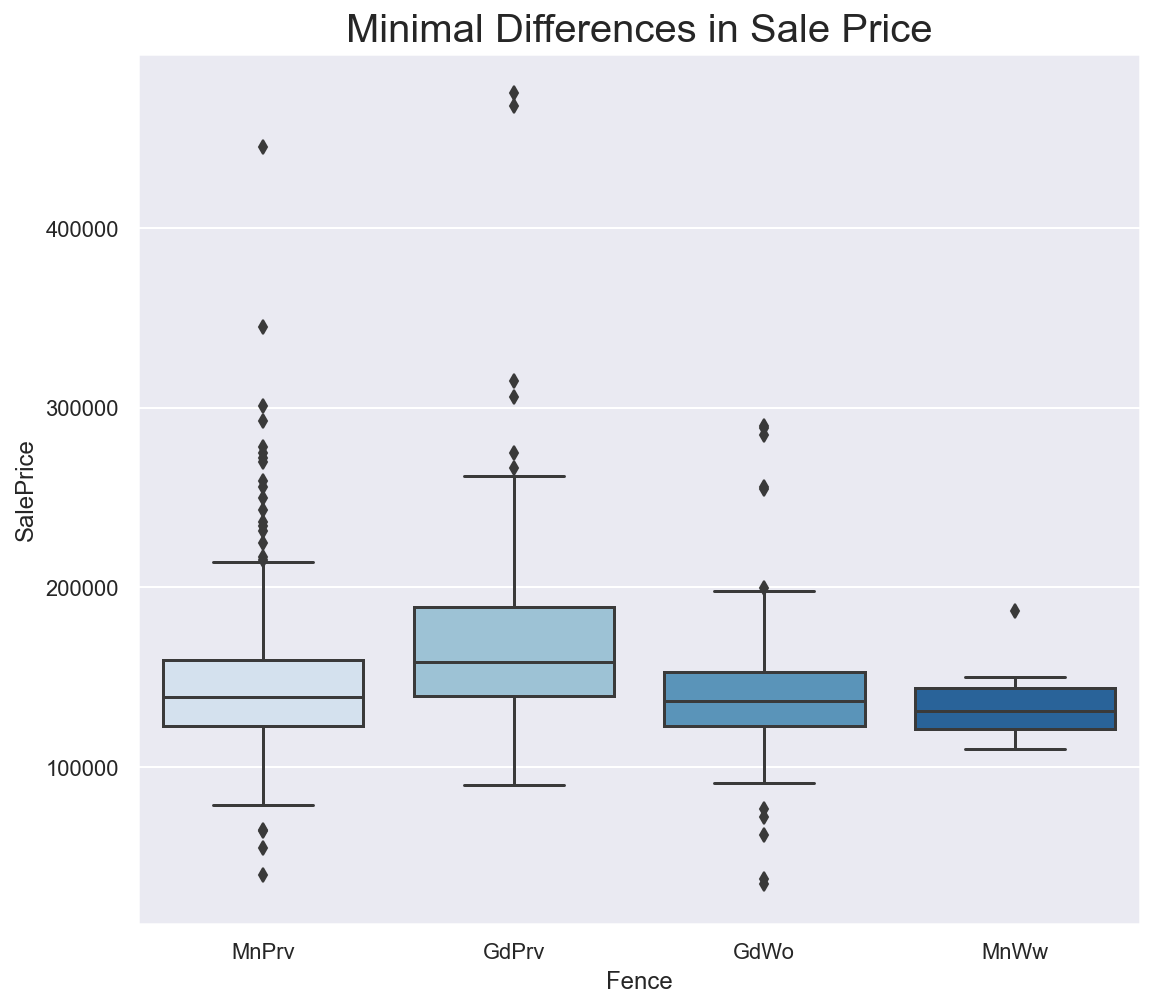

In [55]:
# plot boxplot of 'Fence' against 'SalePrice'
sns.set(rc={'figure.figsize':(8,8)})
fence_boxplot = sns.boxplot(data=train, x='Fence', y='SalePrice', palette="Blues");
fence_boxplot.set_title('Minimal Differences in Sale Price', fontsize=20);

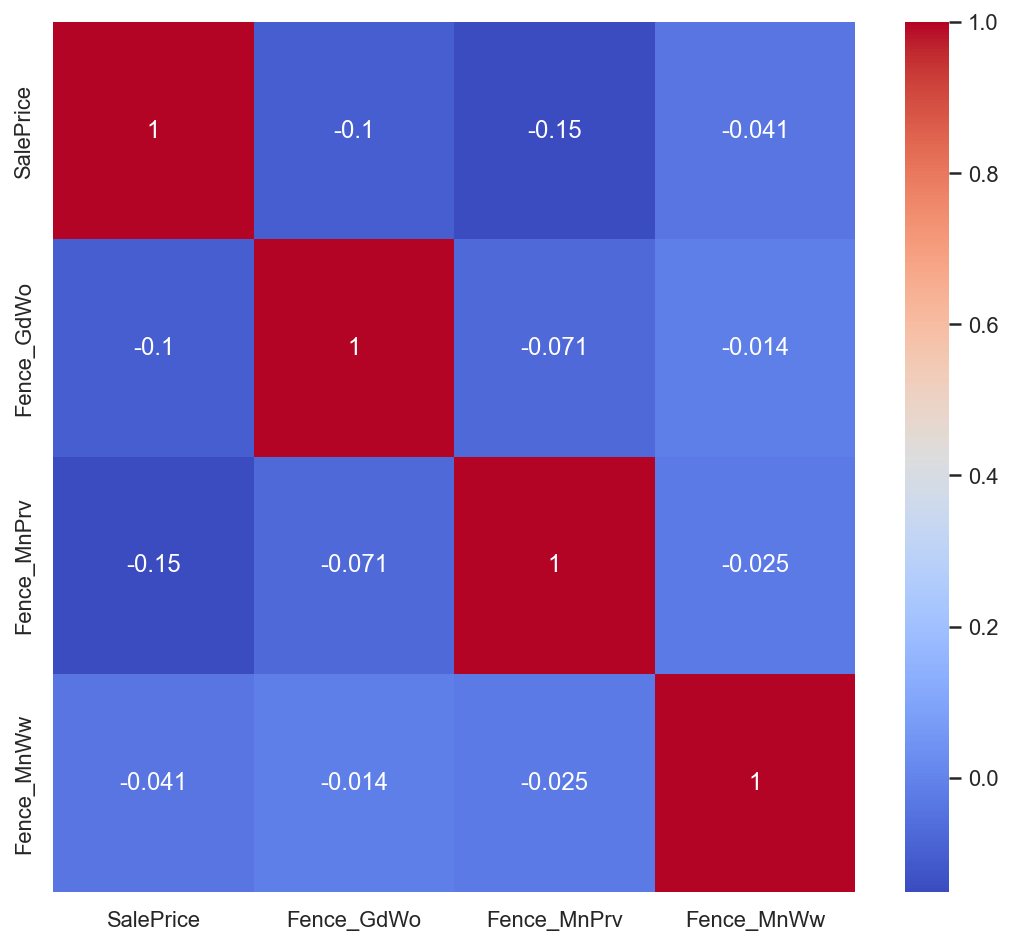

In [56]:
# create 'Fence' dataframe, which will be used to understand correlations with 'Sale Price'
fence_df = pd.get_dummies(train[['Fence', 'SalePrice']], columns=['Fence'], drop_first=True)
sns.heatmap(fence_df.corr(), annot=True, cmap='coolwarm');

In [57]:
# `Fence` column is dropped due to the large number of null value 
# and its insignificance in determining the sale price.
train.drop(columns='Fence', inplace=True)

# check if 'Fence' column was removed
train.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0           60        RL           NaN     13517   Pave       IR1   
1           60        RL          43.0     11492   Pave       IR1   
2           20        RL          68.0      7922   Pave       Reg   
3           60        RL          73.0      9802   Pave       Reg   
4           50        RL          82.0     14235   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  ...  \
0         289.0         Gd         TA     CBlock        TA        TA  ...   
1         132.0         Gd         TA      PConc        Gd        TA  ...   
2           0.0         TA         Gd     CBlock        TA        TA  ...   
3           0.0         TA         TA      PConc        Gd        TA  ...   
4           0.0         TA         TA      PConc        Fa        Gd  ...   

  Bsmt Full Bath Bsmt Half Bath  Full Bath Half Bath  Bedroom AbvGr  \
0            0.0            0.0          2         1              3   
1            1.0            0.0          2         1              4   
2            1.0            0.0          1         0              3   
3            0.0            0.0          2         1              3   
4            0.0            0.0          2         0              3   

   Kitchen AbvGr  Kitchen Qual TotRms AbvGrd Functional Fireplaces  \
0              1            Gd             6        Typ          0   
1              1            Gd             8        Typ          1   
2              1            Gd             5        Typ          0   
3              1            TA             7        Typ          0   
4              1            TA             6        Typ          0   

  Fireplace Qu  Garage Type  Garage Yr Blt  Garage Finish  Garage Cars  \
0          NaN       Attchd         1976.0            RFn          2.0   
1           TA       Attchd         1997.0            RFn          2.0   
2          NaN       Detchd         1953.0            Unf          1.0   
3          NaN      BuiltIn         2007.0            Fin          2.0   
4          NaN       Detchd         1957.0            Unf          2.0   

   Garage Area  Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  \
0        475.0           TA           TA            Y             0   
1        559.0           TA           TA            Y             0   
2        246.0           TA           TA            Y             0   
3        400.0           TA           TA            Y           100   
4        484.0           TA           TA            N           

##### `Fireplace Qu`
- There is one more column relating to fireplace: `Fireplaces`. For `Fireplaces` column, it has 1000 rows with 0 fireplaces. This means that there is no fireplaces in these properties, which corresponds to the null value in the `Fireplace Qu`.
- Hence, it is deduced that the null values for `Fireplace Qu` should be 'NotApplicable' (no fireplace) instead.

In [58]:
# Count the number of unique values in 'Fireplaces'
train['Fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

In [59]:
# Recap on the number of missing values for 'Fireplace QC'
train['Fireplace Qu'].isnull().sum()

1000

In [60]:
# For rows with 'Fireplace Qu' null values, check the quantity of fireplaces.  
train[train['Fireplace Qu'].isnull()]['Fireplaces'].value_counts()

0    1000
Name: Fireplaces, dtype: int64

In [61]:
# For Fireplaces column, it has 1000 rows with 0 fireplaces. 
# This means that there is no fireplaces in these properties, 
# which corresponds to the null value in the Fireplace Qu.

# Replace null value in 'Fireplace Qu' column with 'NotApplicable'
train['Fireplace Qu'].fillna('NotApplicable', inplace=True)

# Check that all null values in 'Pool QC' are replaced
train['Fireplace Qu'].value_counts()

NotApplicable    1000
Gd                523
TA                407
Fa                 59
Po                 31
Ex                 31
Name: Fireplace Qu, dtype: int64

##### `Lot Frontage`
- There are columns relating to Lot Frontage: `Lot Area`, `Lot Shape` and `LotConfig`.
- While 'Lot Frontage' do not have strong correlation with sale price (see regplot below), it has notable correlation with `Lot Area` (see heatmap below), which do not contain null values. 
- Although 'Lot Frontage' is able to predict the sale price to a certain extend, only approximately 38% of the observed variation can be explained by the correlation. 
- In addition, if `Lot Frontage` feature is included in the regression model, it is likely that multi-collinearity will increase. 
- Therefore, `Lot Frontage` feature is dropped from the train data set.

In [62]:
# Count the number of unique values in 'Lot Frontage'
train['Lot Frontage'].value_counts()

60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
        ... 
118.0      1
137.0      1
195.0      1
115.0      1
135.0      1
Name: Lot Frontage, Length: 118, dtype: int64

In [63]:
# Recap on the number of null values for 'Alley'
train['Lot Frontage'].isnull().sum()

330

In [64]:
# Create a datafrom for related columns and sale price. 
lotfrontage_related_df = train[['Lot Frontage', 'Lot Area', 'Lot Shape', 'Lot Config', 'SalePrice']]
lotfrontage_related_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lot Frontage  1721 non-null   float64
 1   Lot Area      2051 non-null   int64  
 2   Lot Shape     2051 non-null   object 
 3   Lot Config    2051 non-null   object 
 4   SalePrice     2051 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 80.2+ KB


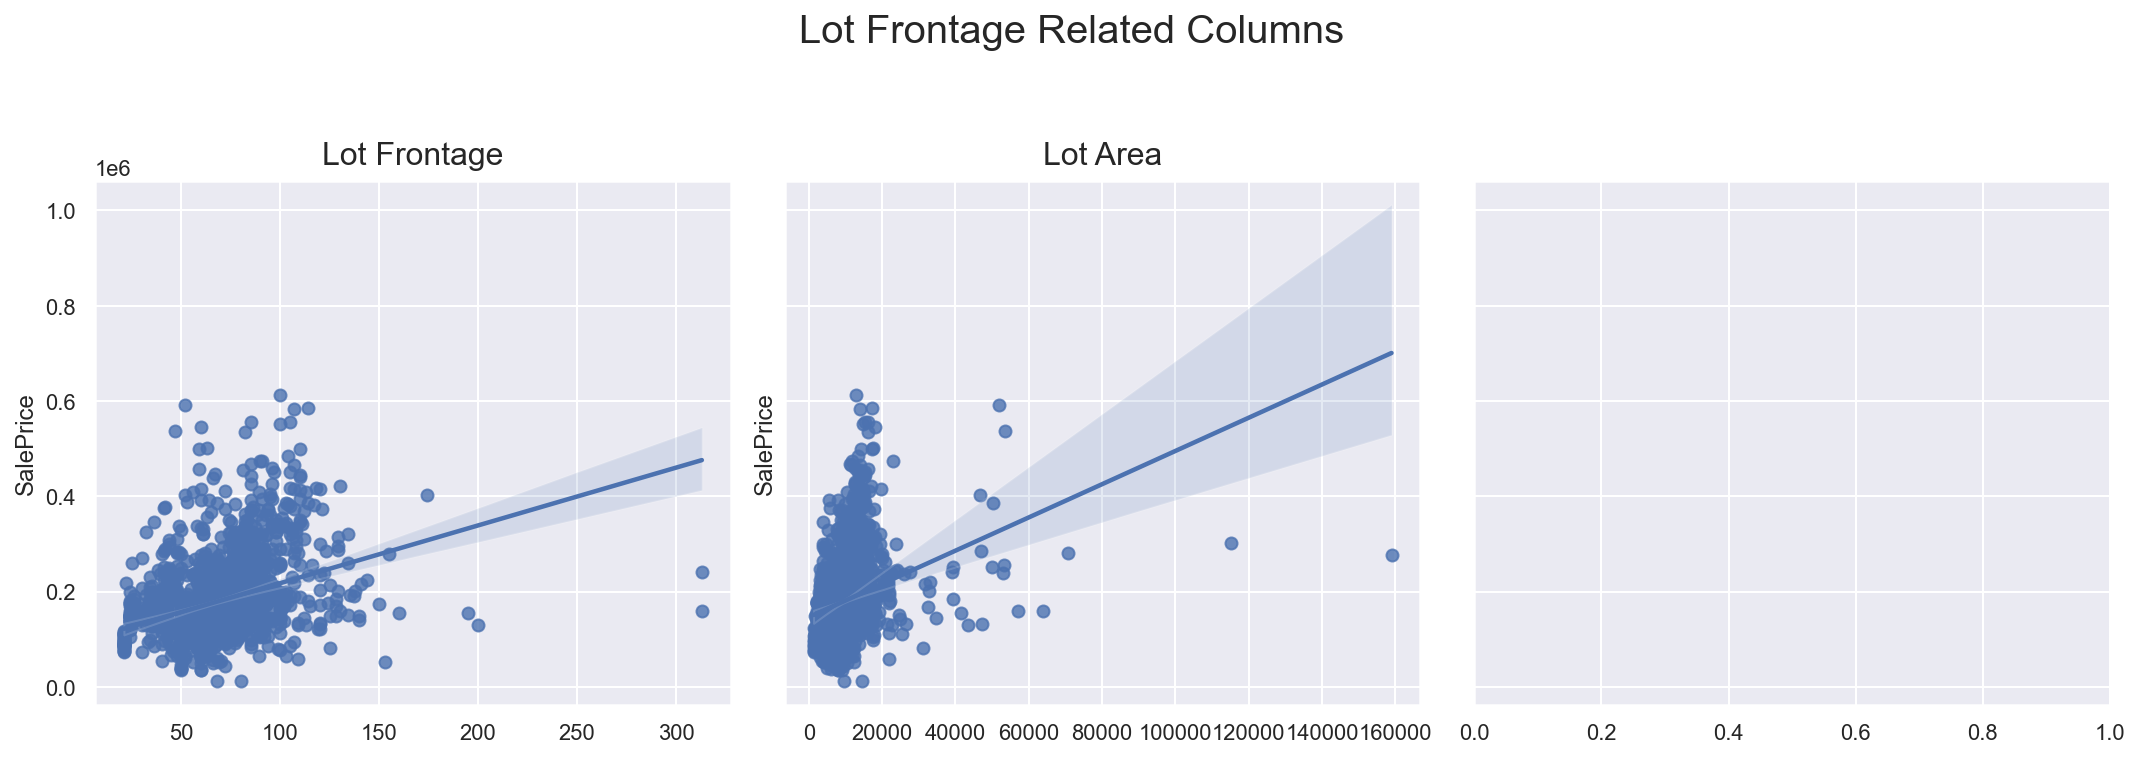

In [65]:
# plot regplot to visualise the relationship of Lot frontage and area with sale price 
subplot_regplot(dataframe=lotfrontage_related_df, 
                y_value='SalePrice', 
                list_of_columns=['Lot Frontage', 'Lot Area'],
                list_of_titles=['Lot Frontage', 'Lot Area'], 
                list_of_xlabels=['']*2, 
                ylabels='SalePrice', 
                plot_title='Lot Frontage Related Columns',
                figsize=(15, 5));

In [66]:
# Understanding lotfrontage correlation with saleprice
train['Lot Frontage'].corr(train['SalePrice'])

0.34184248372687126

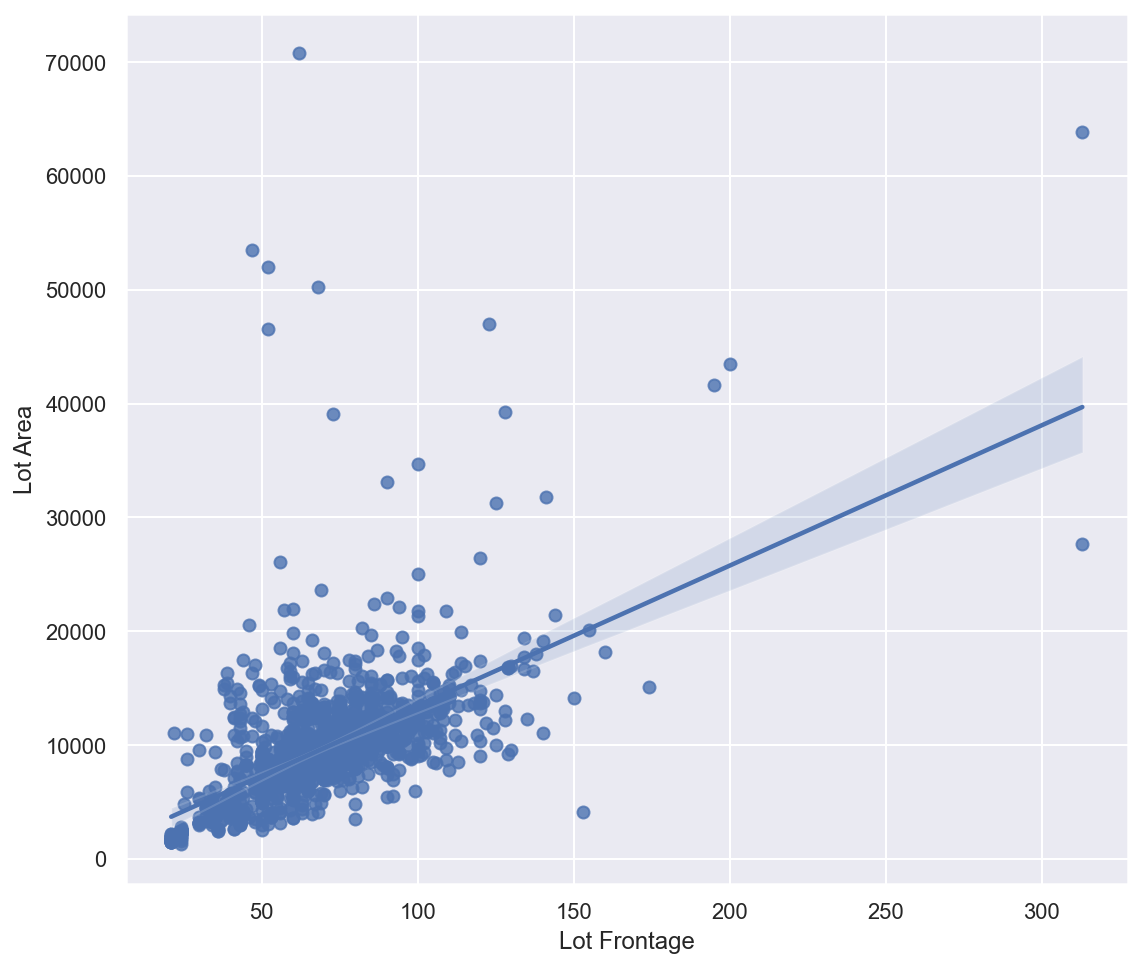

In [67]:
# Understanding Lot Frontage correlation with Lot Area
sns.regplot(data=lotfrontage_related_df, x='Lot Frontage', y='Lot Area');

In [68]:
# Understanding lotfrontage correlation with saleprice
train['Lot Frontage'].corr(train['Lot Area'])

0.5740243171179966

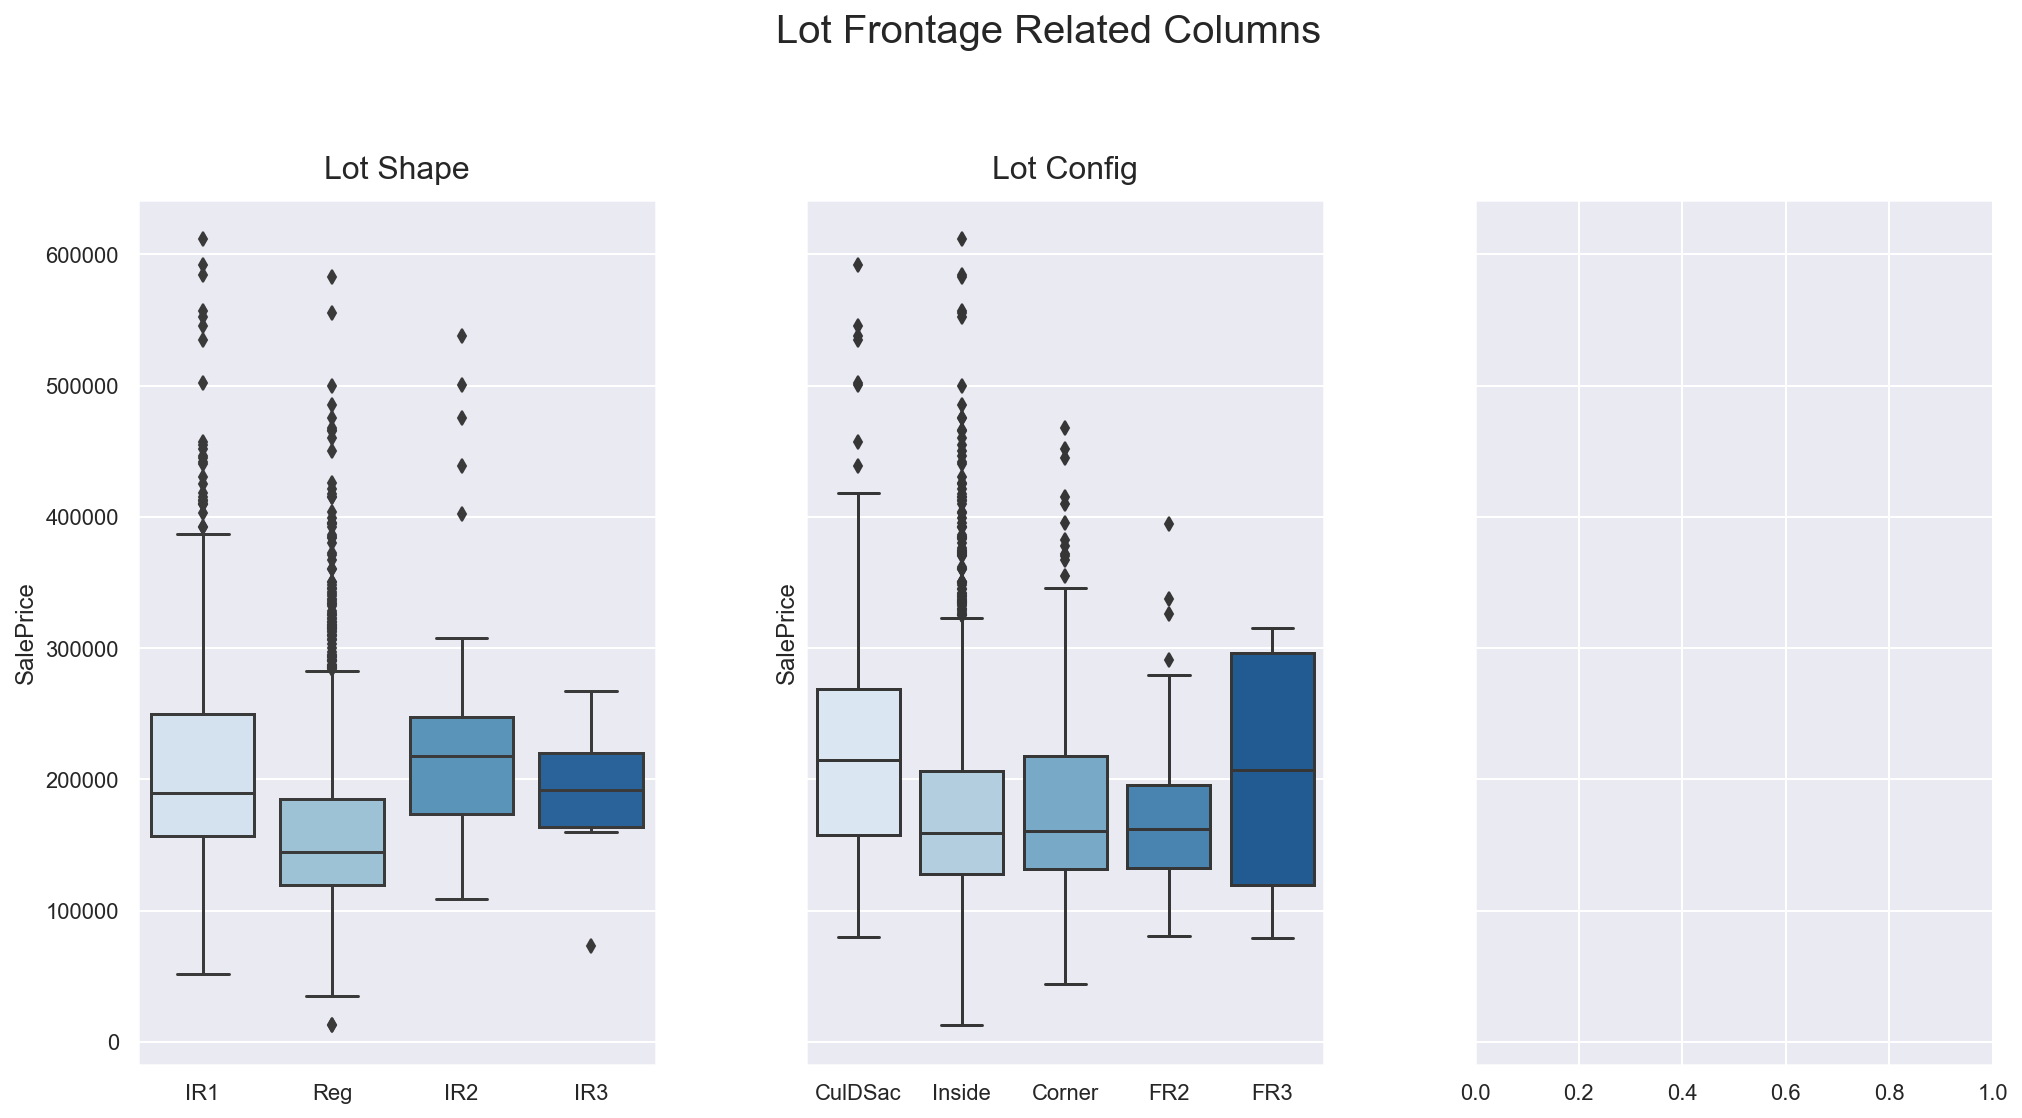

In [69]:
# plot boxplot of 'Lot Shape' and 'Lot Config' against 'SalePrice'
subplot_boxplot(dataframe=lotfrontage_related_df,
                y_value='SalePrice', 
                list_of_columns=['Lot Shape', 'Lot Config'],
                list_of_titles=['Lot Shape', 'Lot Config'], 
                list_of_xlabels=['']*2, 
                ylabels='SalePrice', 
                plot_title='Lot Frontage Related Columns', 
                figsize=(15,8));

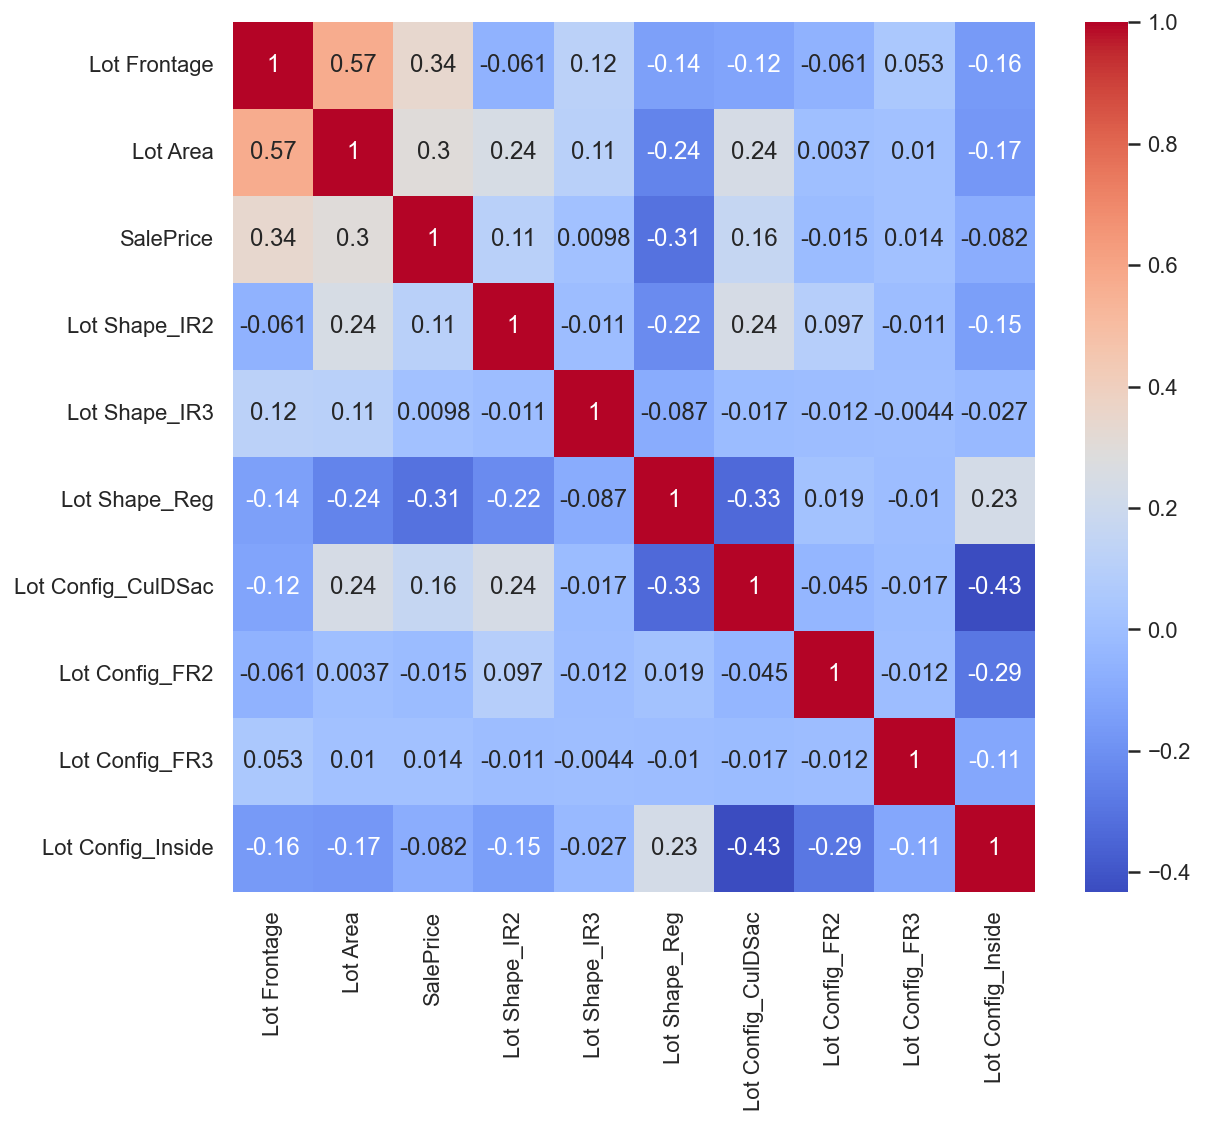

In [70]:
# Modify 'Lot Frontage' dataframe, which will be used to understand correlations
lotfrontage_related_df = pd.get_dummies(lotfrontage_related_df, 
                                        columns=['Lot Shape', 'Lot Config'], 
                                        drop_first=True)
sns.heatmap(lotfrontage_related_df.corr(), annot=True, cmap='coolwarm');

In [71]:
# Lot Frontage column is dropped due to increase likelihood of multi-collinearity 
# and could possibly be represented by Lot Area.
train.drop(columns='Lot Frontage', inplace=True)

# check if 'Lot Frontage' column was removed
train.head()

MS SubClass MS Zoning  Lot Area Street Lot Shape Land Contour Utilities  \
0           60        RL     13517   Pave       IR1          Lvl    AllPub   
1           60        RL     11492   Pave       IR1          Lvl    AllPub   
2           20        RL      7922   Pave       Reg          Lvl    AllPub   
3           60        RL      9802   Pave       Reg          Lvl    AllPub   
4           50        RL     14235   Pave       IR1          Lvl    AllPub   

  Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type  \
0    CulDSac        Gtl       Sawyer        RRAe        Norm      1Fam   
1    CulDSac        Gtl      SawyerW        Norm        Norm      1Fam   
2     Inside        Gtl        NAmes        Norm        Norm      1Fam   
3     Inside        Gtl       Timber        Norm        Norm      1Fam   
4     Inside        Gtl      SawyerW        Norm        Norm      1Fam   

  House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
0      2Story             6             8        1976            2005   
1      2Story             7             5        1996            1997   
2      1Story             5             7        1953            2007   
3      2Story             5             5        2006            2007   
4      1.5Fin             6             8        1900            1993   

  Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area  \
0      Gable   CompShg      HdBoard      Plywood      BrkFace         289.0   
1      Gable   CompShg      VinylSd      VinylSd      BrkFace         132.0   
2      Gable   CompShg      VinylSd      VinylSd         None           0.0   
3      Gable   CompShg      VinylSd      VinylSd         None           0.0   
4      Gable   CompShg      Wd Sdng      Plywood         None           0.0   

  Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure  ...  \
0         Gd         TA     CBlock        TA        TA            No  ...   
1         Gd         TA      PConc        Gd        TA            No  ...   
2         TA         Gd     CBlock        TA        TA            No  ...   
3         TA         TA      PConc        Gd        TA            No  ...   
4         TA         TA      PConc        Fa        Gd            No  ...   

  Bsmt Full Bath  Bsmt Half Bath Full Bath  Half Bath  Bedroom AbvGr  \
0            0.0             0.0         2          1              3   
1            1.0             0.0         2          1              4   
2            1.0             0.0         1          0              3   
3            0.0             0.0         2          1              3   
4            0.0             0.0         2          0              3   

   Kitchen AbvGr Kitchen Qual TotRms AbvGrd Functional Fireplaces  \
0              1           Gd             6        Typ          0   
1              1           Gd             8        Typ          1   
2              1           Gd             5        Typ          0   
3              1           TA             7        Typ          0   
4              1           TA             6        Typ          0   

    Fireplace Qu  Garage Type  Garage Yr Blt  Garage Finish  Garage Cars  \
0  NotApplicable       Attchd         1976.0            RFn          2.0   
1             TA       Attchd         1997.0            RFn          2.0   
2  NotApplicable       Detchd         1953.0            Unf          1.0   
3  NotApplicable      BuiltIn         2007.0            Fin          2.0   
4  NotApplicable       Detchd         1957.0            Unf          2.0   

   Garage Area  Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  \
0        475.0           TA           TA            Y             0   
1        559.0           TA           TA            Y             0   
2        246.0           TA           TA            Y             0   
3        400.0           TA           TA            Y           100   
4        484.0           TA           TA            

##### Garage Related Features
`Garage Finish`, `Garage Qual`, `Garage Yr Blt`, `Garage Cond`,`Garage Type`, `Garage Area` and `Garage Cars`

- There are 113 properties without garage, i.e., garage area is zero.
    - The corresponding missing values for garage related features should be NA, except for Garage Yr Blt.
    - As missing value in 'Garage Yr Blt' cannot be left as 'NotApplicable' or zero, a new column `GarageAge` will be created to reflect zero for no garage. `Garage Yr Blt` will be dropped. 
- Identified a row (**index 1712**) which the garage features has null values except for Garage Type. As all columns is filled except for the 6 garage related features with missing value, the missing values will be imputed. 
    - `Garage Yr Blt` is filled as 1923, assuming garage is built with the property. This is assessed to be reasonable as there is a high correlation between year which property was built and year which garage was built. Moreover, their correlation with the sale price is about the same. Refer to heatmap and scatter plot below. 
    - `Garage Finish`, `Garage Qual`, `Garage Cond` will be imputed with the mode of the respective column. 
    - `Garage Cars` and `Garage Area` will be imputed with the mean of the respective column. 


In [72]:
# dataframe of garage related features. 
garage_features_df = train.filter(like='Garage')

# add 'SalePrice' column to dataframe of garage related features
garage_features_df = train[list(garage_features_df.columns)+['SalePrice', 'Yr Sold']]
garage_features_df

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
0         Attchd         1976.0           RFn          2.0        475.0   
1         Attchd         1997.0           RFn          2.0        559.0   
2         Detchd         1953.0           Unf          1.0        246.0   
3        BuiltIn         2007.0           Fin          2.0        400.0   
4         Detchd         1957.0           Unf          2.0        484.0   
...          ...            ...           ...          ...          ...   
2046      Attchd         2007.0           Fin          2.0        520.0   
2047      Detchd         1961.0           Unf          2.0        539.0   
2048      Detchd         1929.0           Unf          2.0        342.0   
2049      Attchd         1956.0           Unf          1.0        294.0   
2050      Attchd         1999.0           Fin          2.0        442.0   

     Garage Qual Garage Cond  SalePrice  Yr Sold  
0             TA          TA     130500     2010  
1             TA          TA     220000     2009  
2             TA          TA     109000     2010  
3             TA          TA     174000     2010  
4             TA          TA     138500     2010  
...          ...         ...        ...      ...  
2046          TA          TA     298751     2008  
2047          TA          TA      82500     2009  
2048          Fa          Fa     177000     2009  
2049          TA          TA     144000     2009  
2050          TA          TA     189000     2010  

[2051 rows x 9 columns]

In [73]:
# Recap on the number of missing values for garage features.
garage_features_df.isnull().sum().sort_values(ascending=False)

Garage Yr Blt    114
Garage Finish    114
Garage Qual      114
Garage Cond      114
Garage Type      113
Garage Cars        1
Garage Area        1
SalePrice          0
Yr Sold            0
dtype: int64

In [74]:
# Check number of properties without garage, that is, garage area is zero.
garage_features_df['Garage Area'].value_counts()

0.0      113
440.0     70
576.0     69
484.0     52
528.0     46
        ... 
535.0      1
399.0      1
859.0      1
100.0      1
217.0      1
Name: Garage Area, Length: 514, dtype: int64

In [75]:
# for properties with no garage, check for missing values in the other garage features
garage_features_df[garage_features_df['Garage Area']==0].isnull().sum()

Garage Type      113
Garage Yr Blt    113
Garage Finish    113
Garage Cars        0
Garage Area        0
Garage Qual      113
Garage Cond      113
SalePrice          0
Yr Sold            0
dtype: int64

For properties with no garage, the corresponding missing values for garage related features should be NA, except for Garage Yr Blt. 

In [76]:
train['Garage Yr Blt'].dtypes

dtype('float64')

In [77]:
# For properties with no garage, fill missing value 
# of the corresponding missing values for garage related features with NA.

garage_features_to_fill = ['Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Type']

train.loc[train['Garage Area'] == 0, garage_features_to_fill] = 'NotApplicable'            

In [78]:
# Check if missing value for garage yr blt correspond to properties with no garage (that is zero garage area)
train[train['Garage Yr Blt'].isnull() & train['Garage Area'].notnull()][['Garage Area']].value_counts()

Garage Area
0.0            113
dtype: int64

As 'Garage Yr Blt' cannot be left as 'NotApplicable' or zero, a new column `GarageAge` will be created to reflect zero for no garage. `Garage Yr Blt` will be dropped later in the section. 

In [79]:
# Add a columns called GarageAge in garage_features_df
for i in train.index:
    if train.loc[i,'Garage Area']>0:
        train.loc[i, 'GarageAge'] = train.loc[i, 'Yr Sold'] - train.loc[i, 'Garage Yr Blt']
    else:
        train.loc[i, 'GarageAge'] = 0

In [80]:
# check if null values were filled with 'NotApplicable'
train.filter(like='Garage').isnull().sum()

Garage Type        0
Garage Yr Blt    114
Garage Finish      1
Garage Cars        1
Garage Area        1
Garage Qual        1
Garage Cond        1
GarageAge          0
dtype: int64

There is still one null values for each garage related columns except for garage type.

In [81]:
# identify row of data with garage area is null value  
train[train['Garage Area'].isnull()][list(garage_features_df.columns)+['Year Built', 'Year Remod/Add']]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1712      Detchd            NaN           NaN          NaN          NaN   

     Garage Qual Garage Cond  SalePrice  Yr Sold  Year Built  Year Remod/Add  
1712         NaN         NaN     150909     2007        1923            1999

This is the same row which the garage features has null values except for Garage Type. As all columns in index 1712 is filled except for the 6 garage related features with missing value, the missing values will be imputed. 
- `Garage Yr Blt` is filled as 1923, assuming garage is built with the property. This is assessed to be reasonable as there is a high correlation between year which property was built and year which garage was built. Moreover, their correlation with the sale price is about the same. Refer to heatmap and scatter plot below. 
- `Garage Finish`, `Garage Qual`, `Garage Cond` will be imputed with the mode of the respective column. 
- `Garage Cars` and `Garage Area` will be imputed with the mean of the respective column. 

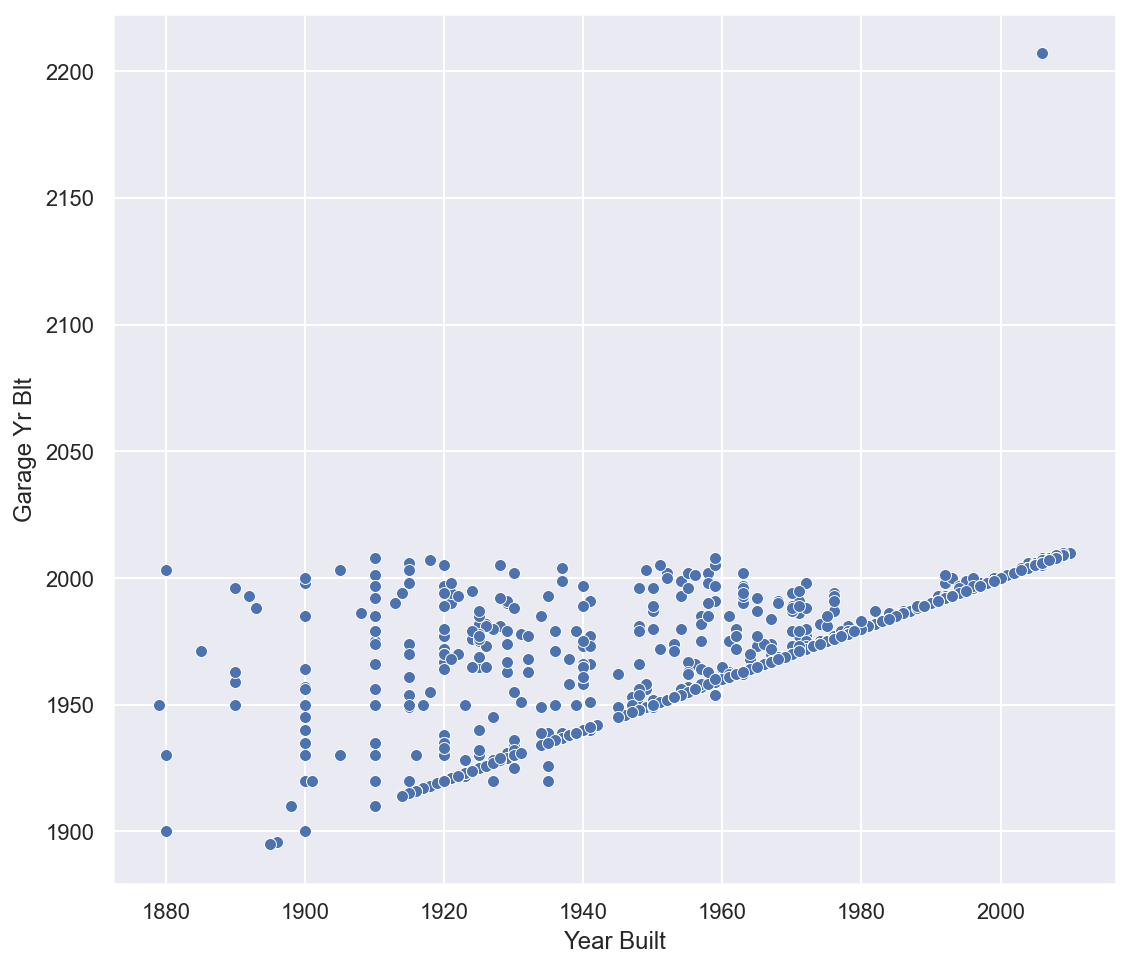

In [82]:
# Scatter plot between year property was built and year garage was built. 
year_built = sns.scatterplot(data=train, x='Year Built', y='Garage Yr Blt');

Additional observations of scatterplot:
1. There are values which garage year built is earlier than the property year built. 
2. There is an anomaly that the garage is built in future, that is, beyond 2200. 

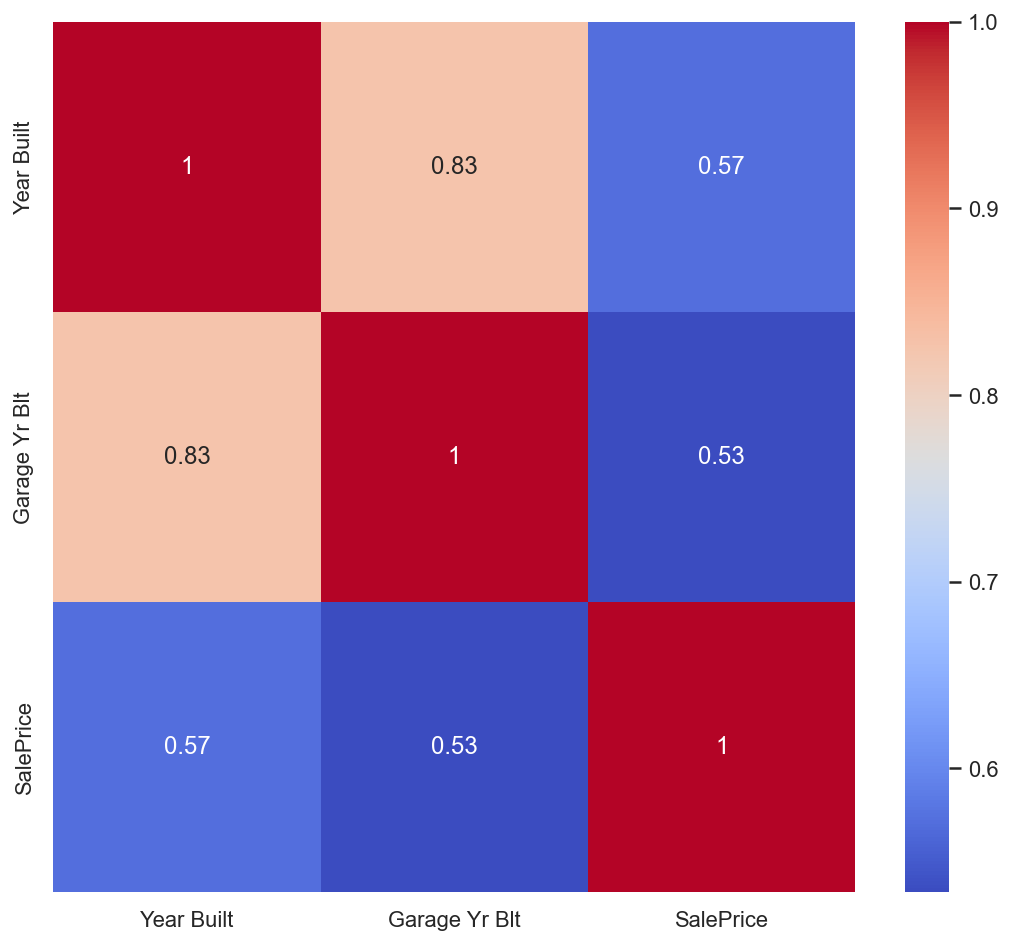

In [83]:
sns.heatmap(train[['Year Built', 'Garage Yr Blt', 'SalePrice']].corr(),  cmap='coolwarm', annot=True);

For index 1712, Garage Yr Blt is filled as 1923, assuming garage is built with the property. This is assessed to be reasonable as there is a high correlation between year which property was built and year which garage was built.

In [84]:
# input Garage Yr Blt for index 1712. 
train.loc[train.index==1712, 'Garage Yr Blt'] = 1923  

In [85]:
# Check that value is input correctly.
train.loc[train.index==1712][garage_features_df.columns]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1712      Detchd         1923.0           NaN          NaN          NaN   

     Garage Qual Garage Cond  SalePrice  Yr Sold  
1712         NaN         NaN     150909     2007

In [86]:
train.loc[train['Garage Type']=='Detchd','Garage Finish']

2       Unf
4       Unf
8       Unf
10      Unf
13      Unf
       ... 
2026    Unf
2030    RFn
2035    Unf
2047    Unf
2048    Unf
Name: Garage Finish, Length: 536, dtype: object

In [87]:
# Compute the mode for 'Garage Finish', 'Garage Qual', 'Garage Cond' column. 
garage_mode_df = train.loc[train['Garage Type']=='Detchd', ['Garage Finish', 'Garage Qual', 'Garage Cond']].mode()
garage_mode_df

Garage Finish Garage Qual Garage Cond
0           Unf          TA          TA

In [88]:
# impute 'Garage Finish', 'Garage Qual', 'Garage Cond' column with the respective mode values for index 1712. 
train.loc[train.index==1712, ['Garage Finish', 'Garage Qual', 'Garage Cond']] = list(garage_mode_df.iloc[0])

In [89]:
# Check that value is input correctly.
train.loc[train.index==1712][garage_features_df.columns]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1712      Detchd         1923.0           Unf          NaN          NaN   

     Garage Qual Garage Cond  SalePrice  Yr Sold  
1712          TA          TA     150909     2007

In [90]:
# Compute the mean for 'Garage Cars' and 'Garage Area'. 
garage_mean = train.loc[train['Garage Type']=='Detchd', ['Garage Cars', 'Garage Area']].mean()
garage_mean

Garage Cars      1.558879
Garage Area    419.543925
dtype: float64

In [91]:
# impute 'Garage Cars', 'Garage Area' column with the respective mean values for index 1712. 
train.loc[train.index==1712, ['Garage Cars', 'Garage Area']] = list(round(garage_mean))

In [92]:
# Check that value is input correctly.
train.loc[train.index==1712][garage_features_df.columns]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1712      Detchd         1923.0           Unf          2.0        420.0   

     Garage Qual Garage Cond  SalePrice  Yr Sold  
1712          TA          TA     150909     2007

Addressing other observations of scatterplot earlier:
1. There is an anomaly that the garage is built in future, that is, beyond 2200.
2. There are values which garage year built is earlier than the property year built.

In [93]:
# 1. Investigate further for anomaly in garage built in future. 
# Display data with garage "built" in future, that is, beyond 2200.
train[train['Garage Yr Blt']>2200][['Year Built', 'Garage Yr Blt', 'Year Remod/Add', 'Yr Sold', 'GarageAge']]

Year Built  Garage Yr Blt  Year Remod/Add  Yr Sold  GarageAge
1699        2006         2207.0            2007     2007     -200.0

It is observed that the Garage Yr Blt was input was "2207". It is deduced that the correct value should be "2007" due to the following reason:
- Property was built in 2006 and was re-modelled/enhanced with additional features in 2007. Garage is likely to be built together with the re-modelled/enhancement work.
- In addition, the property was subsequently sold in 2007. The owner likely built the garage to fetch a higher sale price.

In [94]:
# impute 'Garage Yr Blt' with '2007'for index 1699. 
train.loc[train.index==1699, 'Garage Yr Blt'] = 2007

# Correct 'GarageAge' value accodingly.
train.loc[train.index==1699, 'GarageAge'] = train.loc[train.index==1699, 'Yr Sold'] - train.loc[train.index==1699, 'Garage Yr Blt']

# Check that value is input correctly.
train.loc[train.index==1699][['Year Built', 'Garage Yr Blt', 'Year Remod/Add', 'Yr Sold', 'GarageAge']]

Year Built  Garage Yr Blt  Year Remod/Add  Yr Sold  GarageAge
1699        2006         2007.0            2007     2007        0.0

In [95]:
# 2. Investigate further for values which garage year built is earlier than the property year built.
# Display data for garange year built earlier than property built
train[train['Garage Yr Blt']<train['Year Built']][['Year Built', 'Garage Yr Blt', 'Year Remod/Add']]

Year Built  Garage Yr Blt  Year Remod/Add
72          1959         1954.0            1959
77          1927         1920.0            1950
336         1935         1920.0            1998
493         1935         1926.0            1950
533         1941         1940.0            1950
902         2006         2005.0            2006
1076        1923         1922.0            2000
1686        1950         1949.0            1950
1716        1930         1925.0            1950
1907        1963         1962.0            1963
1964        2006         2005.0            2007

It may be possible that the garage is being built before property is built. 
- Majority of the values shows year built on the subsequent year the garage is built. This means that garage may be built around year end period and property is being built at the start of subsequent years. 
- For year built a fews after garage built, it is assumed that the owner may face issue, such as lack of funding, and delayed the building of the property.
- The data will be left as it is and may be considered later on in the project to improve accuracy of the model to be generated. 

In [96]:
# Drop 'Garage Yr Blt' column
train.drop(columns='Garage Yr Blt', inplace=True)

##### Basement Related Features
`Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin SF 1`, `BsmtFin Type 2`, `BsmtFin SF 2`, `Bsmt Unf SF`, `Total Bsmt SF`, `Bsmt Full Bath`, `Bsmt Half Bath`

- For properties with no basement (`Total Bsmt SF` =0), the corresponding basement related columns are imputed with either zero or NotApplicable.
- There is 1 property (**index 1327**) has missing value in all basement related columns. It is assumed that the property has no basement. The missing value will be replaced with either 'NotApplicable' or zero.
- There is 1 property (**index 616**), with all the basement related data mising, other than BsmtFinSF1, BsmtFinSF2, Bsmt Unf SF, Total Bsmt SF. This is because the property has no basement. The missing value will be replaced with either 'NotApplicable' or zero.
- For the property (**index 1147**), it is reasonable to assume that the BsmtFin Type 2 is 'Unf', typical input given that the BsmtFin Type 1 is indicated as 'GLQ'.
- For properties, **index 1456, 1547, 1997**, 'Bsmt Exposure' column is imputed with 'No' based on the mode for the feature. 

In [97]:
# dataframe of basement related features. 
bsmt_features = train.filter(like='Bsmt').columns

# Recap on the missing values. 
train[bsmt_features].isnull().sum()

Bsmt Qual         55
Bsmt Cond         55
Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin SF 1       1
BsmtFin Type 2    56
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
dtype: int64

In [98]:
# Identify row with Total Bsmt SF is null. 
train[train['Total Bsmt SF'].isnull()][bsmt_features]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1327       NaN       NaN           NaN            NaN           NaN   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
1327            NaN           NaN          NaN            NaN             NaN   

      Bsmt Half Bath  
1327             NaN

All the basement related data is missing for this property. It is assumed that the property has no basement. The missing value will be replaced with either 'NotApplicable' or zero. 

In [99]:
# Impute values for index 1327.
for col in bsmt_features:
    if train[col].dtypes=='object':
        train.loc[1327, col] = 'NotApplicable'
    else:
        train.loc[1327, col] = 0

# Verify that data has been replace correctly.         
train.loc[1327, bsmt_features]

Bsmt Qual         NotApplicable
Bsmt Cond         NotApplicable
Bsmt Exposure     NotApplicable
BsmtFin Type 1    NotApplicable
BsmtFin SF 1                0.0
BsmtFin Type 2    NotApplicable
BsmtFin SF 2                0.0
Bsmt Unf SF                 0.0
Total Bsmt SF               0.0
Bsmt Full Bath              0.0
Bsmt Half Bath              0.0
Name: 1327, dtype: object

In [100]:
# Recap on the missing values. 
train[bsmt_features].isnull().sum()

Bsmt Qual         54
Bsmt Cond         54
Bsmt Exposure     57
BsmtFin Type 1    54
BsmtFin SF 1       0
BsmtFin Type 2    55
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Bsmt Full Bath     1
Bsmt Half Bath     1
dtype: int64

In [101]:
# Identify row with Total Bsmt SF is null. 
train[train['Bsmt Full Bath'].isnull()][bsmt_features]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
616       NaN       NaN           NaN            NaN           0.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
616            NaN           0.0          0.0            0.0             NaN   

     Bsmt Half Bath  
616             NaN

All the basement related data, other than `BsmtFinSF1`, `BsmtFinSF2`, `Bsmt Unf SF`, `Total Bsmt SF`,  is missing for this property. This is because the property has no basement. The missing value will be replaced with either 'NotApplicable' or zero. 

In [102]:
# Impute values for index 616.
for col in bsmt_features:
    if train[col].dtypes=='object':
        train.loc[616, col] = 'NotApplicable'
    else:
        train.loc[616, col] = 0

# Verify that data has been replace correctly.         
train.loc[616, bsmt_features]

Bsmt Qual         NotApplicable
Bsmt Cond         NotApplicable
Bsmt Exposure     NotApplicable
BsmtFin Type 1    NotApplicable
BsmtFin SF 1                0.0
BsmtFin Type 2    NotApplicable
BsmtFin SF 2                0.0
Bsmt Unf SF                 0.0
Total Bsmt SF               0.0
Bsmt Full Bath              0.0
Bsmt Half Bath              0.0
Name: 616, dtype: object

In [103]:
# Recap on the missing values. 
train[bsmt_features].isnull().sum()

Bsmt Qual         53
Bsmt Cond         53
Bsmt Exposure     56
BsmtFin Type 1    53
BsmtFin SF 1       0
BsmtFin Type 2    54
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Bsmt Full Bath     0
Bsmt Half Bath     0
dtype: int64

In [104]:
# Identify row with BsmtFin Type 2 is null and BsmtFin Type 1 is not null. 
train[(train['BsmtFin Type 2'].isnull()) 
      & (train['BsmtFin Type 1'].notnull())][bsmt_features]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1147        Gd        TA            No            GLQ        1124.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
1147            NaN         479.0       1603.0         3206.0             1.0   

      Bsmt Half Bath  
1147             0.0

In [105]:
train[['BsmtFin Type 1', 'BsmtFin Type 2']].groupby('BsmtFin Type 1').value_counts

<bound method DataFrameGroupBy.value_counts of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000246E3071D30>>

- From the filtered data above, given that the BsmtFin Type 1 is indicated as 'GLQ', the mode input for BsmtFin Type 1 is 'Unf'. 
- For the property (**index 1147**), it is reasonable to assume that the BsmtFin Type 2 is 'Unf'.

In [106]:
# Impute values for index 616.
train.loc[1147, 'BsmtFin Type 2'] = 'Unf'

# Verify that data has been replace correctly.         
train.loc[1147, bsmt_features]

Bsmt Qual             Gd
Bsmt Cond             TA
Bsmt Exposure         No
BsmtFin Type 1       GLQ
BsmtFin SF 1      1124.0
BsmtFin Type 2       Unf
BsmtFin SF 2       479.0
Bsmt Unf SF       1603.0
Total Bsmt SF     3206.0
Bsmt Full Bath       1.0
Bsmt Half Bath       0.0
Name: 1147, dtype: object

In [107]:
# Recap on the missing values. 
train[bsmt_features].isnull().sum()

Bsmt Qual         53
Bsmt Cond         53
Bsmt Exposure     56
BsmtFin Type 1    53
BsmtFin SF 1       0
BsmtFin Type 2    53
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Bsmt Full Bath     0
Bsmt Half Bath     0
dtype: int64

In [108]:
# Identify row with Bsmt Exposure is null and Bsmt Cond is not null. 
train[(train['Bsmt Exposure'].isnull()) 
      & (train['Bsmt Cond'].notnull())][bsmt_features]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1456        Gd        TA           NaN            Unf           0.0   
1547        Gd        TA           NaN            Unf           0.0   
1997        Gd        TA           NaN            Unf           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
1456            Unf           0.0        725.0          725.0             0.0   
1547            Unf           0.0       1595.0         1595.0             0.0   
1997            Unf           0.0        936.0          936.0             0.0   

      Bsmt Half Bath  
1456             0.0  
1547             0.0  
1997             0.0

In [109]:
# Display the distribution of the values. 
train['Bsmt Exposure'].value_counts()

No               1339
Av                288
Gd                203
Mn                163
NotApplicable       2
Name: Bsmt Exposure, dtype: int64

In [110]:
# impute these properties with the mode of the distribution. 
train.loc[[1456, 1547, 1997], 'Bsmt Exposure'] = 'No'

# Verify that data has been replace correctly.         
train.loc[[1456, 1547, 1997], bsmt_features]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1456        Gd        TA            No            Unf           0.0   
1547        Gd        TA            No            Unf           0.0   
1997        Gd        TA            No            Unf           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
1456            Unf           0.0        725.0          725.0             0.0   
1547            Unf           0.0       1595.0         1595.0             0.0   
1997            Unf           0.0        936.0          936.0             0.0   

      Bsmt Half Bath  
1456             0.0  
1547             0.0  
1997             0.0

In [111]:
# Recap on the missing values. 
train[bsmt_features].isnull().sum()

Bsmt Qual         53
Bsmt Cond         53
Bsmt Exposure     53
BsmtFin Type 1    53
BsmtFin SF 1       0
BsmtFin Type 2    53
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Bsmt Full Bath     0
Bsmt Half Bath     0
dtype: int64

In [112]:
# Identify row with Bsmt Qual is null and Total Bsmt SF is not null. 
train[(train['Bsmt Qual'].isnull()) 
      & (train['Total Bsmt SF'].notnull())][bsmt_features]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
12         NaN       NaN           NaN            NaN           0.0   
93         NaN       NaN           NaN            NaN           0.0   
114        NaN       NaN           NaN            NaN           0.0   
146        NaN       NaN           NaN            NaN           0.0   
183        NaN       NaN           NaN            NaN           0.0   
...        ...       ...           ...            ...           ...   
1859       NaN       NaN           NaN            NaN           0.0   
1875       NaN       NaN           NaN            NaN           0.0   
1889       NaN       NaN           NaN            NaN           0.0   
1933       NaN       NaN           NaN            NaN           0.0   
2010       NaN       NaN           NaN            NaN           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
12              NaN           0.0          0.0            0.0             0.0   
93              NaN           0.0          0.0            0.0             0.0   
114             NaN           0.0          0.0            0.0             0.0   
146             NaN           0.0          0.0            0.0             0.0   
183             NaN           0.0          0.0            0.0             0.0   
...             ...           ...          ...            ...             ...   
1859            NaN           0.0          0.0            0.0             0.0   
1875            NaN           0.0          0.0            0.0             0.0   
1889            NaN           0.0          0.0            0.0             0.0   
1933            NaN           0.0          0.0            0.0             0.0   
2010            NaN           0.0          0.0            0.0             0.0   

      Bsmt Half Bath  
12               0.0  
93               0.0  
114              0.0  
146              0.0  
183              0.0  
...              ...  
1859             0.0  
1875             0.0  
1889             0.0  
1933             0.0  
2010             0.0  

[53 rows x 11 columns]

In [113]:
# Count the values for 'Total Bsmt SF' column for filtered data.
train[(train['Bsmt Qual'].isnull()) 
      & (train['Total Bsmt SF'].notnull())]['Total Bsmt SF'].value_counts()

0.0    53
Name: Total Bsmt SF, dtype: int64

These 53 properties have zero 'Total Bsmt SF'. This means that basement is not present. All null values should be filled with 'NotApplicable'.

In [114]:
# Get index of properties with zero 'Total Bsmt SF'.
no_bsmt_index = train[(train['Bsmt Qual'].isnull()) 
                      & (train['Total Bsmt SF'].notnull())][bsmt_features].index

In [115]:
# List of columns to impute
bsmt_features_to_impute = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

# impute missing values of these properties with 'NotApplicable'. 
train.loc[list(no_bsmt_index), bsmt_features_to_impute] = 'NotApplicable'

In [116]:
# Verify that data has been replace correctly.
train[bsmt_features].isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

In [117]:
train.isnull().sum().sort_values(ascending=False)

Mas Vnr Type     22
Mas Vnr Area     22
MS SubClass       0
Bedroom AbvGr     0
Fireplaces        0
                 ..
Exter Cond        0
Exter Qual        0
Exterior 2nd      0
Exterior 1st      0
GarageAge         0
Length: 74, dtype: int64

##### Masonry Features

- All 22 missing value in Masonry Veneer Area has corresponding missing value in Masonry Veneer Type. This makes up to about 1% of the data set. 
- It is conservative to assumed that these properties has no masonry: to impute Mas Vnr Area with 0 and Mas Vnr Type to None.

In [118]:
# Check the value count of Mas Vnr Area
train[train['Mas Vnr Area'].isnull()][['Mas Vnr Area', 'Mas Vnr Type']]

Mas Vnr Area Mas Vnr Type
22             NaN          NaN
41             NaN          NaN
86             NaN          NaN
212            NaN          NaN
276            NaN          NaN
338            NaN          NaN
431            NaN          NaN
451            NaN          NaN
591            NaN          NaN
844            NaN          NaN
913            NaN          NaN
939            NaN          NaN
1025           NaN          NaN
1244           NaN          NaN
1306           NaN          NaN
1430           NaN          NaN
1434           NaN          NaN
1606           NaN          NaN
1699           NaN          NaN
1815           NaN          NaN
1820           NaN          NaN
1941           NaN          NaN

In [119]:
# impute Mas Vnr Area with 0 and Mas Vnr Type to None.
train['Mas Vnr Area'].fillna(0, inplace=True)
train['Mas Vnr Type'].fillna('None', inplace=True)

---
#### Categorising Data Types

The features are categorised into 4 data types, Nominal, Ordinal, Continuous and Discrete in the data dictionary. This section attempts to categorise the features into the four datatypes and assessment will be made on the need to change the assigned data types, when required.

In [120]:
#Display list of columns and data types. 
# There are three data types: object, float and int.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Area         2051 non-null   int64  
 3   Street           2051 non-null   object 
 4   Lot Shape        2051 non-null   object 
 5   Land Contour     2051 non-null   object 
 6   Utilities        2051 non-null   object 
 7   Lot Config       2051 non-null   object 
 8   Land Slope       2051 non-null   object 
 9   Neighborhood     2051 non-null   object 
 10  Condition 1      2051 non-null   object 
 11  Condition 2      2051 non-null   object 
 12  Bldg Type        2051 non-null   object 
 13  House Style      2051 non-null   object 
 14  Overall Qual     2051 non-null   int64  
 15  Overall Cond     2051 non-null   int64  
 16  Year Built       2051 non-null   int64  
 17  Year Remod/Add

##### Nominal Data

Nominal data is a type of data that is used to label variables without providing any quantitative value [(source)](https://corporatefinanceinstitute.com/resources/knowledge/other/nominal-data/).
- These data are likely to be classified as object by pandas.

In [121]:
# Retrieve and review object type columns
object_data_features = list(train.select_dtypes(object).columns)
object_data_features

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Sale Type']

Of the features assigned with object data types, the following features are Ordinal data types: `Lot Shape`, `Land Slope`, `Exter Qual`, `Exter Cond`, `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Heating QC`, `Kitchen Qual`, `Fireplace Qu`, `Garage Finish`, `Garage Qual`, `Garage Cond` and `Pool QC`. These features are compiled into a list to be reviewed later in the notebook. 

In [122]:
# Create a list of features for Ordinal data types. 

ordinal_features = ['Lot Shape', 'Land Slope', 'Exter Qual', 'Exter Cond', 
                    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
                    'BsmtFin Type 2','Heating QC', 'Kitchen Qual', 'Fireplace Qu', 
                    'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC']

In [123]:
# Create a list of features for Nominal data types. 
nominal_features = [feature for feature in object_data_features if feature not in ordinal_features]
nominal_features

['MS Zoning',
 'Street',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Electrical',
 'Functional',
 'Garage Type',
 'Paved Drive',
 'Sale Type']

In [124]:
# Verify that no features were left out in the process. 
len(object_data_features) == (len(ordinal_features) + len(nominal_features))

True

In addition to the above, features with numeric data types will be reviewed to identify possible nominal features that are assigned with numeric data types.  

In [125]:
# Retrieve and review numeric data type columns
numeric_data_features = list(train.select_dtypes(np.number).columns)
numeric_data_features

['MS SubClass',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'GarageAge']

Of the numeric data features identified, `MS SubClass` is assessed to be a Nominal data type.

In addition, `Overall Qual` and `Overall Cond`, is assessed to be Ordinal data type.

In [126]:
# Append MS SubClass in the list of Nominal data type
nominal_features.append('MS SubClass')
nominal_features[-5:]

['Functional', 'Garage Type', 'Paved Drive', 'Sale Type', 'MS SubClass']

In [127]:
# Append Overall Qual and Overall Cond in the list of Ordinal data type
ordinal_features.extend(['Overall Qual', 'Overall Cond'])
ordinal_features[-5:]

['Garage Qual', 'Garage Cond', 'Pool QC', 'Overall Qual', 'Overall Cond']

In [128]:
# Create numeric features (continuous and discrete date type) 
numeric_features = list(set(numeric_data_features)-{'MS SubClass', 'Overall Qual', 'Overall Cond'})
numeric_features

['Kitchen AbvGr',
 'Pool Area',
 'Full Bath',
 'Lot Area',
 'Yr Sold',
 'Enclosed Porch',
 'Garage Cars',
 'Gr Liv Area',
 'Year Built',
 'Wood Deck SF',
 'Year Remod/Add',
 'Screen Porch',
 'Low Qual Fin SF',
 '3Ssn Porch',
 'Fireplaces',
 'Total Bsmt SF',
 'Half Bath',
 'BsmtFin SF 1',
 '1st Flr SF',
 'Bsmt Full Bath',
 'Bsmt Unf SF',
 '2nd Flr SF',
 'Bedroom AbvGr',
 'Bsmt Half Bath',
 'Mo Sold',
 'SalePrice',
 'BsmtFin SF 2',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Open Porch SF',
 'Garage Area',
 'GarageAge']

In [129]:
# Recap list of Nominal features created earlier. 
train[nominal_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MS Zoning     2051 non-null   object
 1   Street        2051 non-null   object
 2   Land Contour  2051 non-null   object
 3   Utilities     2051 non-null   object
 4   Lot Config    2051 non-null   object
 5   Neighborhood  2051 non-null   object
 6   Condition 1   2051 non-null   object
 7   Condition 2   2051 non-null   object
 8   Bldg Type     2051 non-null   object
 9   House Style   2051 non-null   object
 10  Roof Style    2051 non-null   object
 11  Roof Matl     2051 non-null   object
 12  Exterior 1st  2051 non-null   object
 13  Exterior 2nd  2051 non-null   object
 14  Mas Vnr Type  2051 non-null   object
 15  Foundation    2051 non-null   object
 16  Heating       2051 non-null   object
 17  Central Air   2051 non-null   object
 18  Electrical    2051 non-null   object
 19  Functi

##### Ordinal Data 

Ordinal data is a kind of categorical data with a set order or scale to it [(source)](https://www.formpl.us/blog/ordinal-data).
- These data are expected to be classified as object or integer by pandas.

In [130]:
# Recap list of Ordinal features created earlier. 
train[ordinal_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot Shape       2051 non-null   object
 1   Land Slope      2051 non-null   object
 2   Exter Qual      2051 non-null   object
 3   Exter Cond      2051 non-null   object
 4   Bsmt Qual       2051 non-null   object
 5   Bsmt Cond       2051 non-null   object
 6   Bsmt Exposure   2051 non-null   object
 7   BsmtFin Type 1  2051 non-null   object
 8   BsmtFin Type 2  2051 non-null   object
 9   Heating QC      2051 non-null   object
 10  Kitchen Qual    2051 non-null   object
 11  Fireplace Qu    2051 non-null   object
 12  Garage Finish   2051 non-null   object
 13  Garage Qual     2051 non-null   object
 14  Garage Cond     2051 non-null   object
 15  Pool QC         2051 non-null   object
 16  Overall Qual    2051 non-null   int64 
 17  Overall Cond    2051 non-null   int64 
dtypes: int64

##### Continuous and Discrete Data

Discrete data is a count that involves integers — only a limited number of values is possible. On the other hand, continuous data is numerical data that refers to the unspecified number of possible measurements between two presumed points [(source)](https://whatagraph.com/blog/articles/discrete-vs-continuous-data#:~:text=Discrete%20data%20is%20the%20type,the%20bar%20graph%20is%20used.).
- These data are expected to be classified as float or integers by pandas.

In [131]:
# Recap list of numeric features created earlier. 
train[numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kitchen AbvGr    2051 non-null   int64  
 1   Pool Area        2051 non-null   int64  
 2   Full Bath        2051 non-null   int64  
 3   Lot Area         2051 non-null   int64  
 4   Yr Sold          2051 non-null   int64  
 5   Enclosed Porch   2051 non-null   int64  
 6   Garage Cars      2051 non-null   float64
 7   Gr Liv Area      2051 non-null   int64  
 8   Year Built       2051 non-null   int64  
 9   Wood Deck SF     2051 non-null   int64  
 10  Year Remod/Add   2051 non-null   int64  
 11  Screen Porch     2051 non-null   int64  
 12  Low Qual Fin SF  2051 non-null   int64  
 13  3Ssn Porch       2051 non-null   int64  
 14  Fireplaces       2051 non-null   int64  
 15  Total Bsmt SF    2051 non-null   float64
 16  Half Bath        2051 non-null   int64  
 17  BsmtFin SF 1  

In [132]:
# categorise numeric features into discrete and continuous
discrete_features = ['Mo Sold', 'Garage Cars', 'Fireplaces',
                     'TotRms AbvGrd', 'Bedroom AbvGr', 'Kitchen AbvGr', 
                     'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']

cont_features = list(set(numeric_features)-set(discrete_features))
cont_features

['Pool Area',
 'Lot Area',
 'Yr Sold',
 'Enclosed Porch',
 'Gr Liv Area',
 'Year Built',
 'Wood Deck SF',
 'Year Remod/Add',
 'Screen Porch',
 'Low Qual Fin SF',
 '3Ssn Porch',
 'Total Bsmt SF',
 'BsmtFin SF 1',
 '1st Flr SF',
 'Bsmt Unf SF',
 '2nd Flr SF',
 'SalePrice',
 'BsmtFin SF 2',
 'Mas Vnr Area',
 'Open Porch SF',
 'Garage Area',
 'GarageAge']

---
#### Update Data Types

##### Nominal Data
- `MS SubClass` is converted to string instead of int so that it will not be processed as numeric feature.
- The following features are treated as binary classification and converted to integers so that one hot encoding may be avoided: `Street`, `Central Air` and `Paved Drive`.

In [133]:
# Recap list of Nominal features created earlier. 
train[nominal_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MS Zoning     2051 non-null   object
 1   Street        2051 non-null   object
 2   Land Contour  2051 non-null   object
 3   Utilities     2051 non-null   object
 4   Lot Config    2051 non-null   object
 5   Neighborhood  2051 non-null   object
 6   Condition 1   2051 non-null   object
 7   Condition 2   2051 non-null   object
 8   Bldg Type     2051 non-null   object
 9   House Style   2051 non-null   object
 10  Roof Style    2051 non-null   object
 11  Roof Matl     2051 non-null   object
 12  Exterior 1st  2051 non-null   object
 13  Exterior 2nd  2051 non-null   object
 14  Mas Vnr Type  2051 non-null   object
 15  Foundation    2051 non-null   object
 16  Heating       2051 non-null   object
 17  Central Air   2051 non-null   object
 18  Electrical    2051 non-null   object
 19  Functi

In [134]:
# Reclassify MS SubClass to string instead of int so that it will not be processed as numeric feature. 
train['MS SubClass'] = train['MS SubClass'].map(lambda value: str(value))

The following features may treated as binary classification: `Street`, `Central Air` and `Paved Drive`.

In [135]:
# Display values for Street column. 
train['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [136]:
# Converting boolean datatypes to numbers so that one hot encoding may be avoided.
train['Street'].replace({'Pave': 1, 'Grvl': 0},inplace=True)

In [137]:
# Verify that consersion is done. 
train['Street'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: Street
Non-Null Count  Dtype
--------------  -----
2051 non-null   int64
dtypes: int64(1)
memory usage: 16.1 KB


In [138]:
# Display values for Street column. 
train['Central Air'].value_counts()

Y    1910
N     141
Name: Central Air, dtype: int64

In [139]:
# Converting boolean datatypes to numbers so that one hot encoding may be avoided.
train['Central Air'].replace({'Y': 1, 'N': 0},inplace=True)

In [140]:
# Verify that consersion is done. 
train['Central Air'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: Central Air
Non-Null Count  Dtype
--------------  -----
2051 non-null   int64
dtypes: int64(1)
memory usage: 16.1 KB


In [141]:
# Display values for Paved Drive column. 
train['Paved Drive'].value_counts()

Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64

From the boxplot below, there is no significant increase in price for partial pavement over dirt/gravel. In addition, from the heatmap, it can be seen that there is significant correlation between paved and dirt/gravel. Moreover, partial pavement only make up about 2% of the data. Hence, it is assessed that partial pavement may be categorised as dirt/gravel.

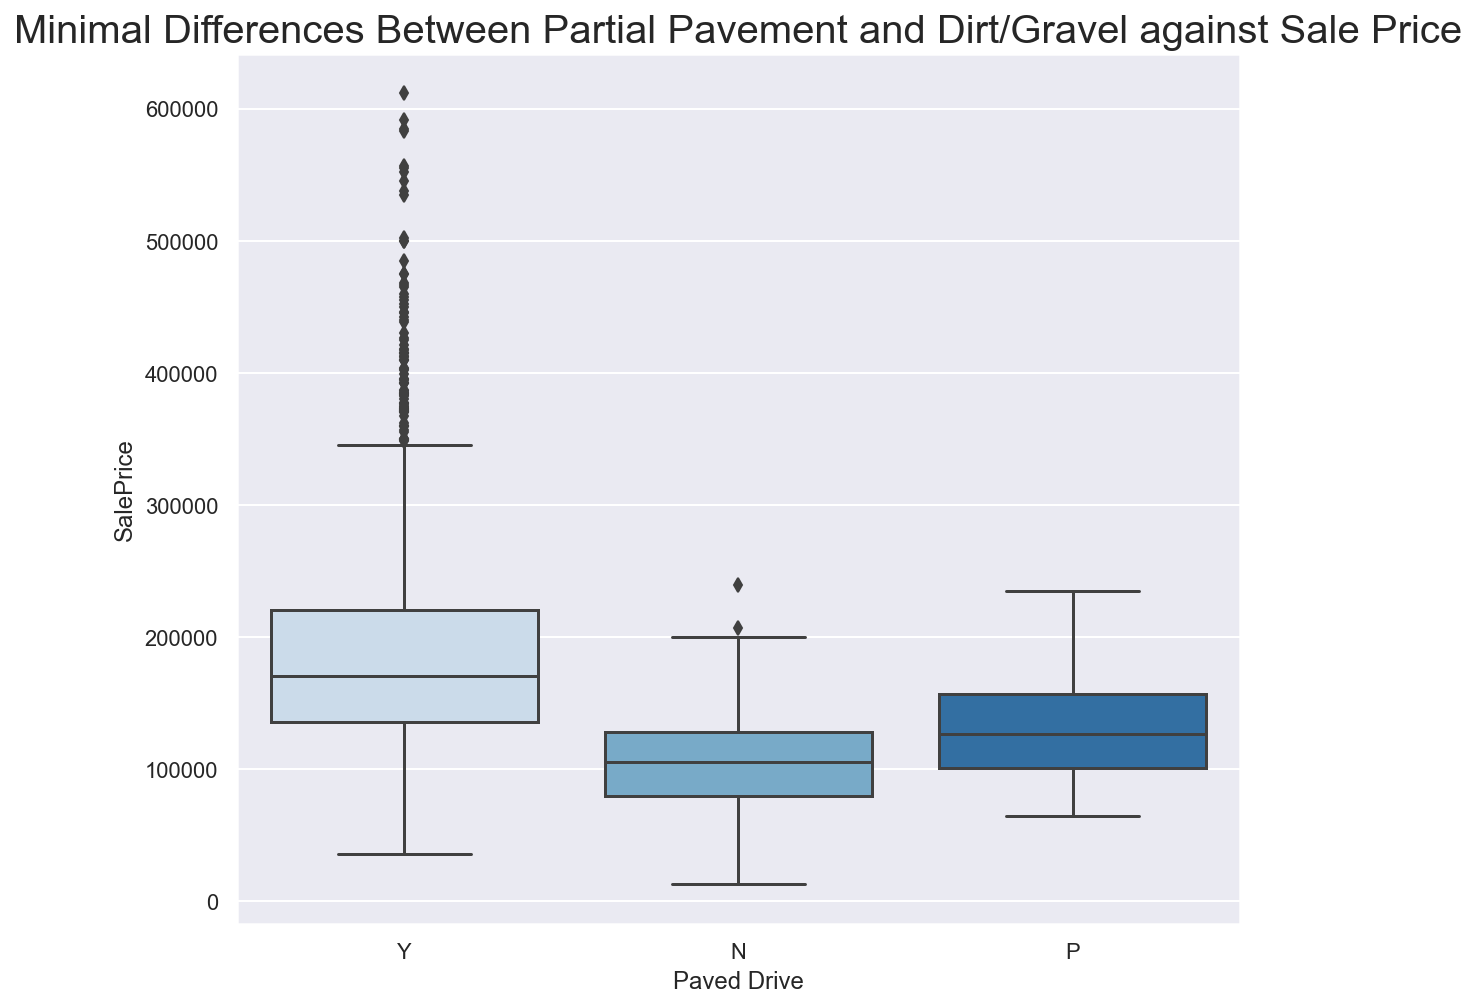

In [142]:
# Plot boxplot to understand the price distribution of each value. 
sns.set(rc={'figure.figsize':(8,8)})
paved_drive_boxplot = sns.boxplot(data=train, x='Paved Drive', y='SalePrice', palette="Blues");
paved_drive_boxplot.set_title('Minimal Differences Between Partial Pavement and Dirt/Gravel against Sale Price', fontsize=20);

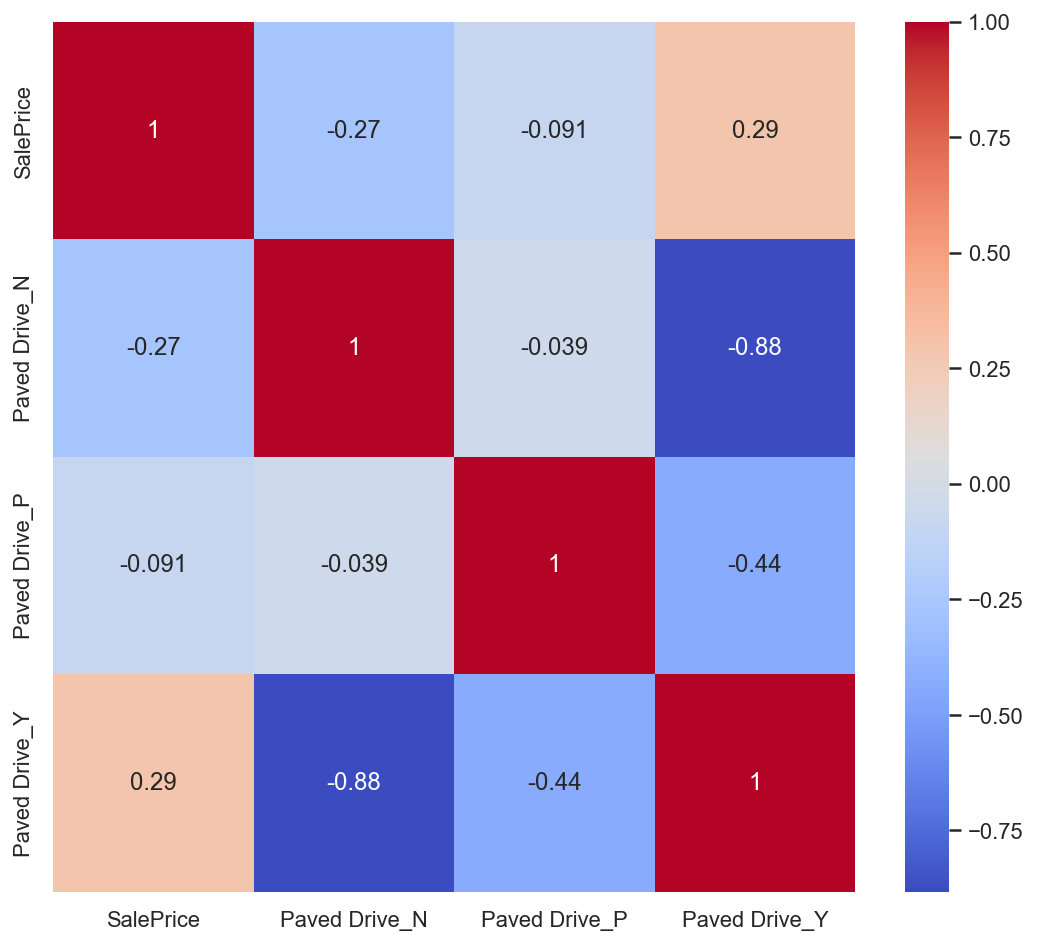

In [143]:
# create 'Paved Drive' dataframe, which will be used to understand correlations with 'Sale Price'
paved_drive_df = pd.get_dummies(train[['Paved Drive', 'SalePrice']], columns=['Paved Drive'], drop_first=False)
sns.heatmap(paved_drive_df.corr(), annot=True, cmap='coolwarm');

In [144]:
# Converting boolean datatypes to numbers so that one hot encoding may be avoided.
train['Paved Drive'].replace({'Y': 1, 'N': 0, 'P':0},inplace=True)

In [145]:
# Verify that consersion is done. 
train['Paved Drive'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: Paved Drive
Non-Null Count  Dtype
--------------  -----
2051 non-null   int64
dtypes: int64(1)
memory usage: 16.1 KB


##### Ordinal Data
- Identified features have unique scale that are not integers: `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Garage Finish`, `Land Slope`, `Lot Shape`. Specific dictionaries are specified to map the values to integers.
- `Exter Cond`,`Pool QC`,`Kitchen Qual`,`Bsmt Cond`,`Fireplace Qu`,`Garage Qual`,`Heating QC`,`Garage Cond`,`Bsmt Qual`,`Exter Qual` share a common scale and are converted accordingly. 
- `Overall Qual` and `Overall Cond` will not be mapped as they are already in integers. 

In [146]:
# Recap list of Ordinal features created earlier. 
train[ordinal_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot Shape       2051 non-null   object
 1   Land Slope      2051 non-null   object
 2   Exter Qual      2051 non-null   object
 3   Exter Cond      2051 non-null   object
 4   Bsmt Qual       2051 non-null   object
 5   Bsmt Cond       2051 non-null   object
 6   Bsmt Exposure   2051 non-null   object
 7   BsmtFin Type 1  2051 non-null   object
 8   BsmtFin Type 2  2051 non-null   object
 9   Heating QC      2051 non-null   object
 10  Kitchen Qual    2051 non-null   object
 11  Fireplace Qu    2051 non-null   object
 12  Garage Finish   2051 non-null   object
 13  Garage Qual     2051 non-null   object
 14  Garage Cond     2051 non-null   object
 15  Pool QC         2051 non-null   object
 16  Overall Qual    2051 non-null   int64 
 17  Overall Cond    2051 non-null   int64 
dtypes: int64

1. The following features have unique scale that are not integers: `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Garage Finish`, `Land Slope`, `Lot Shape`. Specific dictionaries are specified to map the values to integers. 
2. `Exter Cond`,`Pool QC`,`Kitchen Qual`,`Bsmt Cond`,`Fireplace Qu`,`Garage Qual`,`Heating QC`,`Garage Cond`,`Bsmt Qual`,`Exter Qual` share a common scale and are converted accordingly. 
3. `Overall Qual` and `Overall Cond` will not be mapped as they are already in integers. 

In [147]:
# list of features with unique scale. 
unique_scale_features = ['Bsmt Exposure', 'BsmtFin Type 1','BsmtFin Type 2',
                         'Garage Finish', 'Land Slope', 'Lot Shape']

In [148]:
# Dictionaries for conversion
bsmt_exposure_dict = {"Gd":4, "Av":3, "Mn":2, "No":1, "NotApplicable":0}
bsmtfin_dict = {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NotApplicable":0}
garage_finish_dict = {"Fin":3, "RFn":2, "Unf":1, "NotApplicable":0}
land_slope_dict = {"Sev":3, "Mod":2, "Gtl":1, "NotApplicable":0}
lot_shape_dict = {"Reg":4, "IR1":3, "IR2":2, "IR3":1, "NotApplicable":0}

# sequence of dictionary to input map_ordinal function
dict_seq=[bsmt_exposure_dict, bsmtfin_dict, bsmtfin_dict, 
          garage_finish_dict, land_slope_dict, lot_shape_dict]

In [149]:
# map unique scale columns to integers.

for column, column_dict in zip(unique_scale_features, dict_seq):
    map_ordinal(train, column, column_dict)

=== Bsmt Exposure ====
Before:
No               1342
Av                288
Gd                203
Mn                163
NotApplicable      55
Name: Bsmt Exposure, dtype: int64

After:
1    1342
3     288
4     203
2     163
0      55
Name: Bsmt Exposure, dtype: int64

=== BsmtFin Type 1 ===
Before:
GLQ              615
Unf              603
ALQ              293
BLQ              200
Rec              183
LwQ              102
NotApplicable     55
Name: BsmtFin Type 1, dtype: int64

After:
6    615
1    603
5    293
4    200
3    183
2    102
0     55
Name: BsmtFin Type 1, dtype: int64

=== BsmtFin Type 2 ===
Before:
Unf              1750
Rec                80
LwQ                60
NotApplicable      55
BLQ                48
ALQ                35
GLQ                23
Name: BsmtFin Type 2, dtype: int64

After:
1    1750
3      80
2      60
0      55
4      48
5      35
6      23
Name: BsmtFin Type 2, dtype: int64

=== Garage Finish ====
Before:
Unf              850
RFn              579
Fin  

`Exter Cond`,`Pool QC`,`Kitchen Qual`,`Bsmt Cond`,`Fireplace Qu`,`Garage Qual`,`Heating QC`,`Garage Cond`,`Bsmt Qual`,`Exter Qual` share a common scale and are converted accordingly. 

In [150]:
# Display list of remaining ordinal features not mapped. 
common_scale_features = list(set(ordinal_features) 
                             - set(unique_scale_features) 
                             - {'Overall Qual', 'Overall Cond'})
common_scale_features

['Fireplace Qu',
 'Garage Qual',
 'Heating QC',
 'Exter Cond',
 'Bsmt Cond',
 'Pool QC',
 'Bsmt Qual',
 'Garage Cond',
 'Kitchen Qual',
 'Exter Qual']

In [151]:
# Create dictionary for common scale ordinal features.
common_scale_dict = {'NotApplicable': 0,'Po':1,'Fa':2,"TA":3,"Gd":4,'Ex':5}

# map common scale columns to integers.
for column in common_scale_features:
    map_ordinal(train, column, common_scale_dict)

==== Fireplace Qu ====
Before:
NotApplicable    1000
Gd                523
TA                407
Fa                 59
Po                 31
Ex                 31
Name: Fireplace Qu, dtype: int64

After:
0    1000
4     523
3     407
2      59
1      31
5      31
Name: Fireplace Qu, dtype: int64

==== Garage Qual =====
Before:
TA               1833
NotApplicable     113
Fa                 82
Gd                 18
Ex                  3
Po                  2
Name: Garage Qual, dtype: int64

After:
3    1833
0     113
2      82
4      18
5       3
1       2
Name: Garage Qual, dtype: int64

===== Heating QC =====
Before:
Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

After:
5    1065
3     597
4     319
2      67
1       3
Name: Heating QC, dtype: int64

===== Exter Cond =====
Before:
TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

After:
3    1778
4     215
2      49
5       7
1       2
Name: Exter Cond, dtype:

In [152]:
# Verify all ordinal data are converted into integers
train[ordinal_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot Shape       2051 non-null   int64
 1   Land Slope      2051 non-null   int64
 2   Exter Qual      2051 non-null   int64
 3   Exter Cond      2051 non-null   int64
 4   Bsmt Qual       2051 non-null   int64
 5   Bsmt Cond       2051 non-null   int64
 6   Bsmt Exposure   2051 non-null   int64
 7   BsmtFin Type 1  2051 non-null   int64
 8   BsmtFin Type 2  2051 non-null   int64
 9   Heating QC      2051 non-null   int64
 10  Kitchen Qual    2051 non-null   int64
 11  Fireplace Qu    2051 non-null   int64
 12  Garage Finish   2051 non-null   int64
 13  Garage Qual     2051 non-null   int64
 14  Garage Cond     2051 non-null   int64
 15  Pool QC         2051 non-null   int64
 16  Overall Qual    2051 non-null   int64
 17  Overall Cond    2051 non-null   int64
dtypes: int64(18)
memory usage: 2

##### Continuous and Discrete Data
- `Yr Sold`, `Year Remod/Add`, `Year Built` will be condensed into `PropertyAge` and `RemodAge` and will be dropped subsequently. 
- `Lot Area` seems to have outliers significantly above the maximum value (one and a half times the interquartile range).
- `Bsmt Half Bath`, `3Ssn Porch`, `Screen Porch`, `Low Qual Fin SF`, `BsmtFin SF 2`, `Kitchen AbvGr`, `Pool Area`, `Misc Val`, `Enclosed Porch` has skewed distribution.
- `Gr Liv Area`, `BsmtFin SF 1`  has two outliers ( >4000 SF). 
    - Although these two properties are outliers, their other features, such as Open Porch SF and Garage Area are on the higher side as well. This is assessed to be genuine data and will be kept.
- No other anomalies observed. 

In [153]:
# Display distribution for each feature.
train[numeric_features].describe().T

count           mean           std      min       25%  \
Kitchen AbvGr    2051.0       1.042906      0.209790      0.0       1.0   
Pool Area        2051.0       2.397855     37.782570      0.0       0.0   
Full Bath        2051.0       1.577279      0.549279      0.0       1.0   
Lot Area         2051.0   10065.208191   6742.488909   1300.0    7500.0   
Yr Sold          2051.0    2007.775719      1.312014   2006.0    2007.0   
Enclosed Porch   2051.0      22.571916     59.845110      0.0       0.0   
Garage Cars      2051.0       1.776694      0.764367      0.0       1.0   
Gr Liv Area      2051.0    1499.330083    500.447829    334.0    1129.0   
Year Built       2051.0    1971.708922     30.177889   1872.0    1953.5   
Wood Deck SF     2051.0      93.833740    128.549416      0.0       0.0   
Year Remod/Add   2051.0    1984.190151     21.036250   1950.0    1964.5   
Screen Porch     2051.0      16.511458     57.374204      0.0       0.0   
Low Qual Fin SF  2051.0       5.512921     51.068870      0.0       0.0   
3Ssn Porch       2051.0       2.591419     25.229615      0.0       0.0   
Fireplaces       2051.0       0.590931      0.638516      0.0       0.0   
Total Bsmt SF    2051.0    1057.471965    449.908003      0.0     793.0   
Half Bath        2051.0       0.371039      0.501043      0.0       0.0   
BsmtFin SF 1     2051.0     442.084837    461.195041      0.0       0.0   
1st Flr SF       2051.0    1164.488055    396.446923    334.0     879.5   
Bsmt Full Bath   2051.0       0.427109      0.522589      0.0       0.0   
Bsmt Unf SF      2051.0     567.451487    445.022846      0.0     220.0   
2nd Flr SF       2051.0     329.329108    425.671046      0.0       0.0   
Bedroom AbvGr    2051.0       2.843491      0.826618      0.0       2.0   
Bsmt Half Bath   2051.0       0.063384      0.251590      0.0       0.0   
Mo Sold          2051.0       6.219893      2.744736      1.0       4.0   
SalePrice        2051.0  181469.701609  79258.659352  12789.0  129825.0   
BsmtFin SF 2     2051.0      47.935641    164.964052      0.0       0.0   
Mas Vnr Area     2051.0      98.626524    174.324690      0.0       0.0   
TotRms AbvGrd    2051.0       6.435885      1.560225      2.0       5.0   
Open Porch SF    2051.0      47.556802     66.747241      0.0       0.0   
Garage Area      2051.0     473.645539    215.885140      0.0     319.0   
GarageAge        2051.0      27.551926     25.154016     -1.0       4.0   

                      50%       75%       max  
Kitchen AbvGr         1.0       1.0       3.0  
Pool Area             0.0       0.0     800.0  
Full Bath             2.0       2.0       4.0  
Lot Area           9430.0   11513.5  159000.0  
Yr Sold            2008.0    2009.0    2010.0  
Enclosed Porch        0.0       0.0     432.0  
Garage Cars           2.0       2.0       5.0  
Gr Liv Area        1444.0    1728.5    5642.0  
Year Built         1974.0    2001.0    2010.0  
Wood Deck SF          0.0     168.0    1424.0  
Year Remod/Add     1993.0    2004.0    2010.0  
Screen Porch          0.0       0.0     490.0  
Low Qual Fin SF       0.0       0.0    1064.0  
3Ssn Porch            0.0       0.0     508.0  
Fireplaces            1.0       1.0       4.0  
Total Bsmt SF       994.0    1318.5    6110.0  
Half Bath             0.0       1.0       2.0  
BsmtFin SF 1        368.0     733.5    5644.0  
1st Flr SF         1093.0    1405.0    5095.0  
Bsmt Full Bath        0.0       1.0       3.0  
Bsmt Unf SF         474.0     811.0    2336.0  
2nd Flr SF            0.0     692.5    1862.0  
Bedroom AbvGr         3.0       3.0       8.0  
Bsmt Half Bath        0.0       0.0       2.0  
Mo Sold               6.0       8.0      12.0  
SalePrice        162500.0  214000.0  611657.0  
BsmtFin SF 2          0.0       0.0    1474.0  
Mas Vnr Area          0.0     159.0    1600.0  
TotRms AbvGrd         6.0       7.0      15.0  
Open Porch SF        27.0      70.0     547.0  
Garage Area         480.0     576.0    1418.0  
Garage

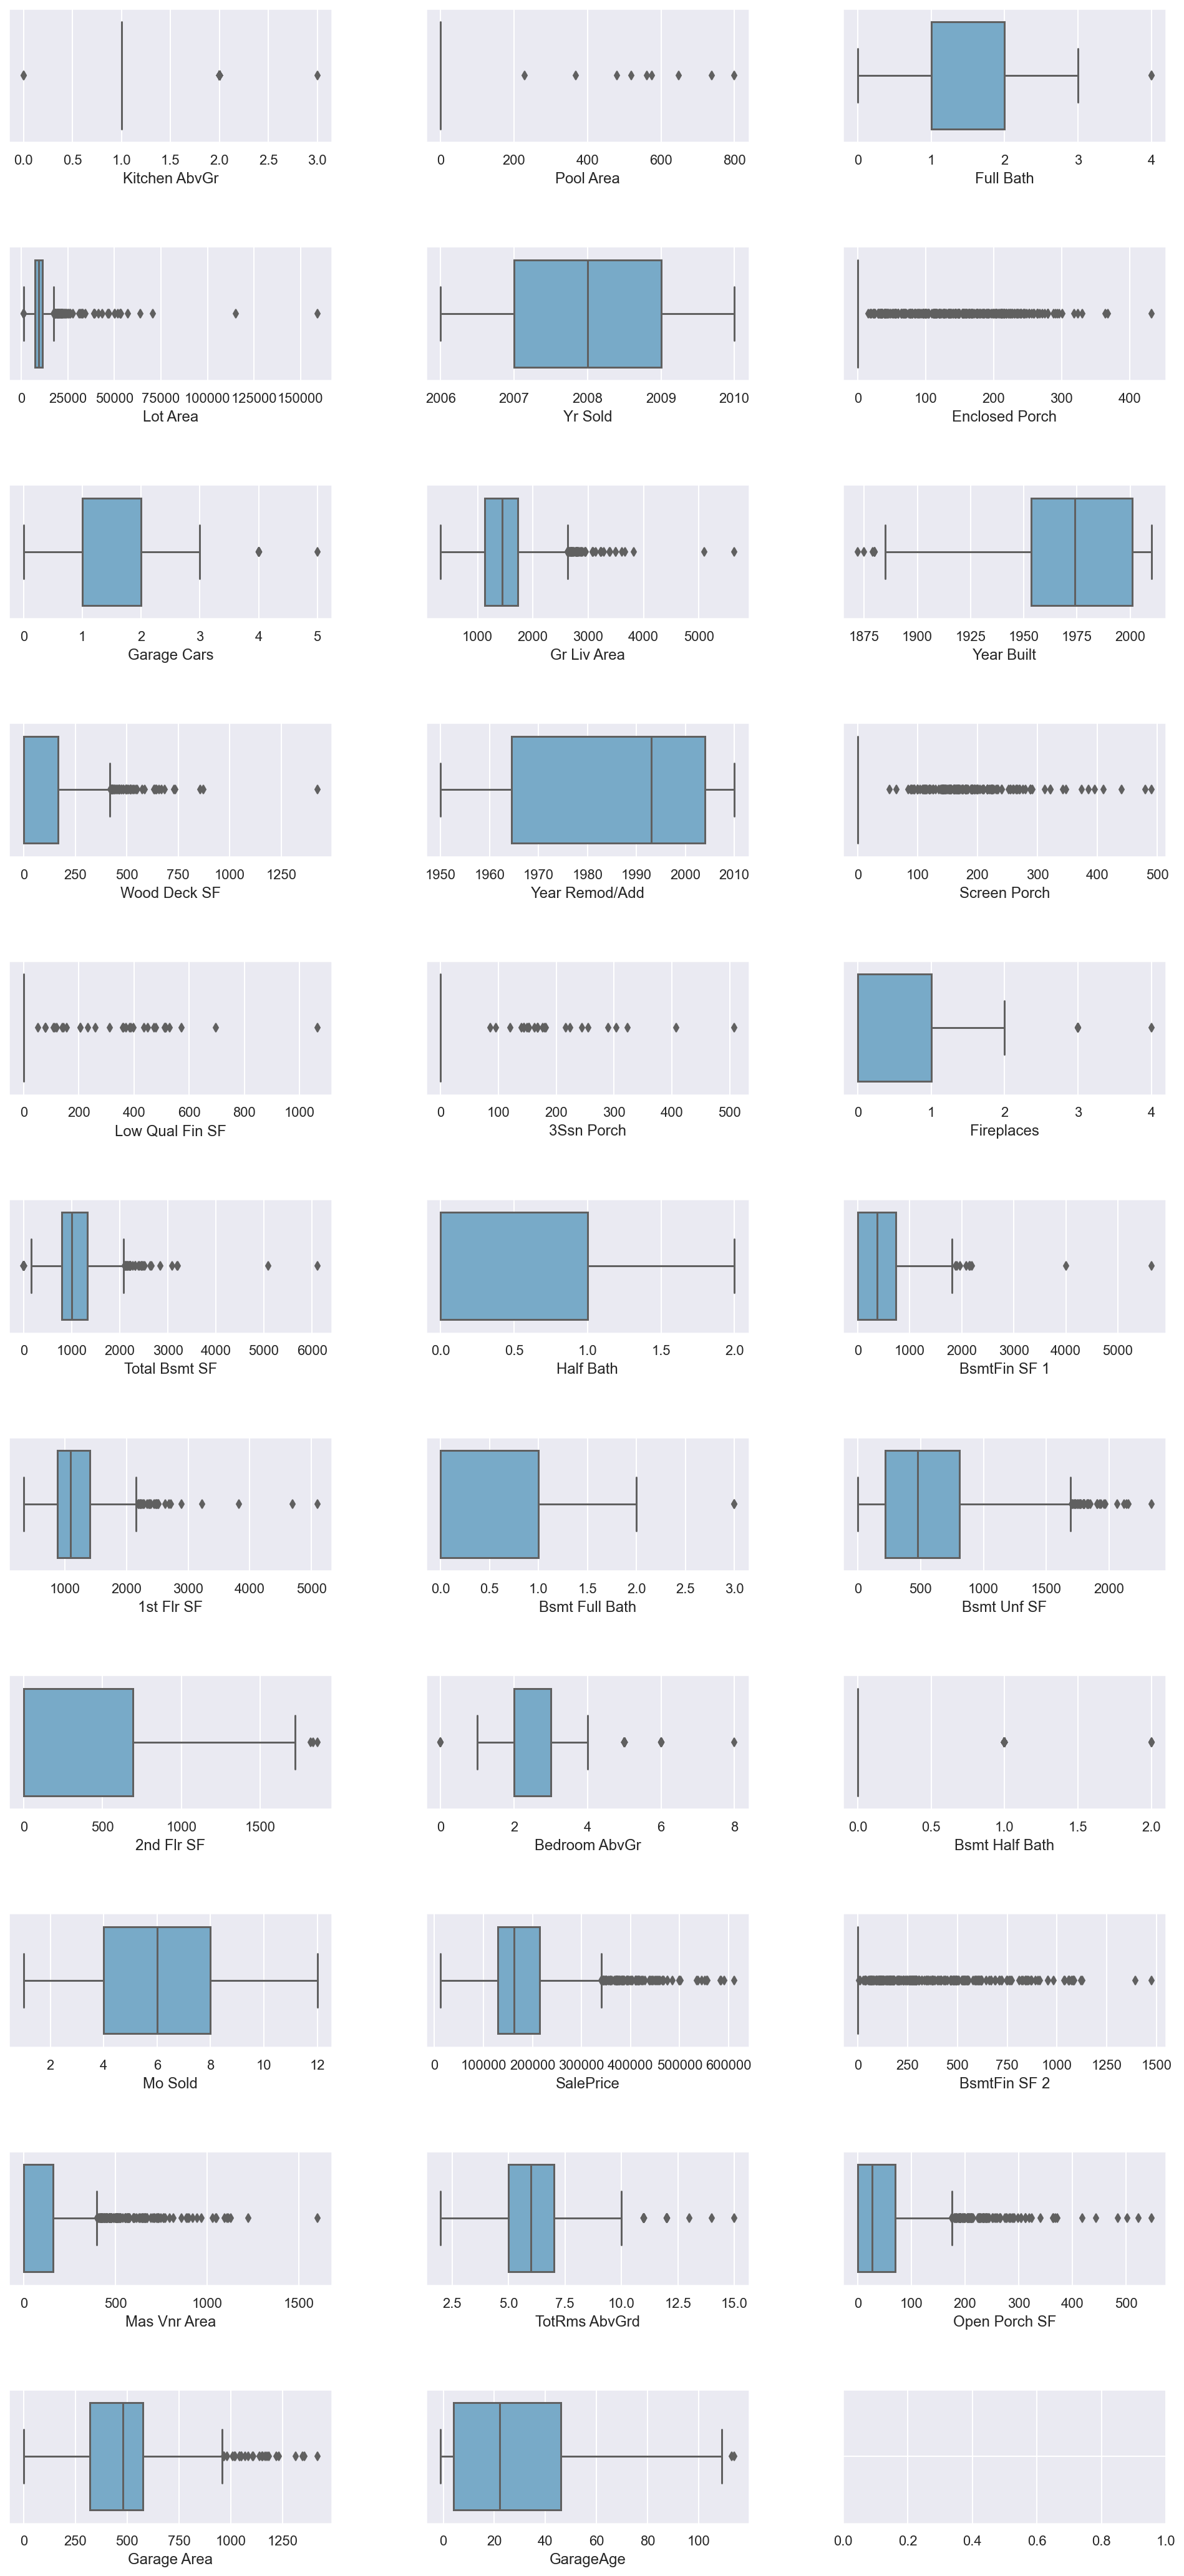

In [154]:
subplot_boxplot(dataframe=train[numeric_features], y_value=None, 
                list_of_columns=numeric_features, list_of_titles=['']*len(numeric_features), 
                list_of_xlabels=numeric_features, ylabels=None, 
                plot_title=None, figsize=(15,30))

- `Gr Liv Area`, `BsmtFin SF 1` have two outliers ( >4000 SF). 
    - Although these two properties are outliers, their other features, such as 1st Flr SF are on the higher side as well. considering that there is notable correlation between Gr Liv Area and Total Bsmt SF.  This is assessed to be genuine data and will be kept.
- `Lot Area` seems to have two outliers significantly above the maximum value (one and a half times the interquartile range). This seems to be genuine as well as the sale price is on the higher side. 

In [155]:
train[train['Gr Liv Area']>4000][cont_features]

Pool Area  Lot Area  Yr Sold  Enclosed Porch  Gr Liv Area  Year Built  \
960         480     63887     2008               0         5642        2008   
1885          0     39290     2007               0         5095        2008   

      Wood Deck SF  Year Remod/Add  Screen Porch  Low Qual Fin SF  3Ssn Porch  \
960            214            2008             0                0           0   
1885           546            2009             0                0           0   

      Total Bsmt SF  BsmtFin SF 1  1st Flr SF  Bsmt Unf SF  2nd Flr SF  \
960          6110.0        5644.0        4692        466.0         950   
1885         5095.0        4010.0        5095       1085.0           0   

      SalePrice  BsmtFin SF 2  Mas Vnr Area  Open Porch SF  Garage Area  \
960      160000           0.0         796.0            292       1418.0   
1885     183850           0.0        1224.0            484       1154.0   

      GarageAge  
960         0.0  
1885       -1.0

In [156]:
train[['Gr Liv Area', '1st Flr SF', 'Total Bsmt SF', 'BsmtFin SF 1']].corr()

Gr Liv Area  1st Flr SF  Total Bsmt SF  BsmtFin SF 1
Gr Liv Area       1.000000    0.562441       0.454245      0.215735
1st Flr SF        0.562441    1.000000       0.808351      0.462360
Total Bsmt SF     0.454245    0.808351       1.000000      0.539251
BsmtFin SF 1      0.215735    0.462360       0.539251      1.000000

In [157]:
train[train['Lot Area']>75000][cont_features]

Pool Area  Lot Area  Yr Sold  Enclosed Porch  Gr Liv Area  Year Built  \
471          0    159000     2007               0         2144        1958   
694          0    115149     2007               0         1824        1971   

     Wood Deck SF  Year Remod/Add  Screen Porch  Low Qual Fin SF  3Ssn Porch  \
471             0            2006             0                0           0   
694           380            2002             0                0           0   

     Total Bsmt SF  BsmtFin SF 1  1st Flr SF  Bsmt Unf SF  2nd Flr SF  \
471         1444.0         697.0        1444        747.0         700   
694         1643.0        1219.0        1824        424.0           0   

     SalePrice  BsmtFin SF 2  Mas Vnr Area  Open Porch SF  Garage Area  \
471     277000           0.0         472.0             98        389.0   
694     302000           0.0         351.0             48        739.0   

     GarageAge  
471       49.0  
694       36.0

In [158]:
# Identify skewed features in terms of distribution

skewed_num_features=[]

for col in numeric_features:
    if np.quantile(train[col], 0.25)==np.quantile(train[col], 0.75):
        skewed_num_features.append(col)
        
skewed_num_features

['Kitchen AbvGr',
 'Pool Area',
 'Enclosed Porch',
 'Screen Porch',
 'Low Qual Fin SF',
 '3Ssn Porch',
 'Bsmt Half Bath',
 'BsmtFin SF 2']

- `Bsmt Half Bath`, `3Ssn Porch`, `Screen Porch`, `Low Qual Fin SF`, `BsmtFin SF 2`, `Kitchen AbvGr`, `Pool Area`, `Misc Val`, `Enclosed Porch` has skewed distribution.
- Based on the count plot and box plot below. There is a relationship between the sub-categories. Hence, they will be treated as continuous features.  
- No other anomalies observed. 

**Continuous Features**


In [159]:
# Recap list of numeric features created earlier. 
train[cont_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pool Area        2051 non-null   int64  
 1   Lot Area         2051 non-null   int64  
 2   Yr Sold          2051 non-null   int64  
 3   Enclosed Porch   2051 non-null   int64  
 4   Gr Liv Area      2051 non-null   int64  
 5   Year Built       2051 non-null   int64  
 6   Wood Deck SF     2051 non-null   int64  
 7   Year Remod/Add   2051 non-null   int64  
 8   Screen Porch     2051 non-null   int64  
 9   Low Qual Fin SF  2051 non-null   int64  
 10  3Ssn Porch       2051 non-null   int64  
 11  Total Bsmt SF    2051 non-null   float64
 12  BsmtFin SF 1     2051 non-null   float64
 13  1st Flr SF       2051 non-null   int64  
 14  Bsmt Unf SF      2051 non-null   float64
 15  2nd Flr SF       2051 non-null   int64  
 16  SalePrice        2051 non-null   int64  
 17  BsmtFin SF 2  

`Yr Sold`, `Year Remod/Add`, `Year Built` will be condensed into `PropertyAge` and `RemodAge`, and will be dropped subsequently. 

In [160]:
# create PropertyAge column
train['PropertyAge'] = train['Yr Sold'] - train['Year Built']

# create RemodAge columns
train['RemodAge'] = train['Year Remod/Add'] - train['Year Built']

In [161]:
# Drop Yr Sold, Year Remod/Add, Year Built column
train.drop(columns=['Yr Sold', 'Year Remod/Add', 'Year Built'], inplace=True)

In [162]:
# Update cont_features list
cont_features.remove('Yr Sold')
cont_features.remove('Year Remod/Add')
cont_features.remove('Year Built')
cont_features.append('PropertyAge')
cont_features.append('RemodAge')

In [163]:
# convert cont_features to float
for feature in cont_features:
    train[feature] = train[feature].map(float)

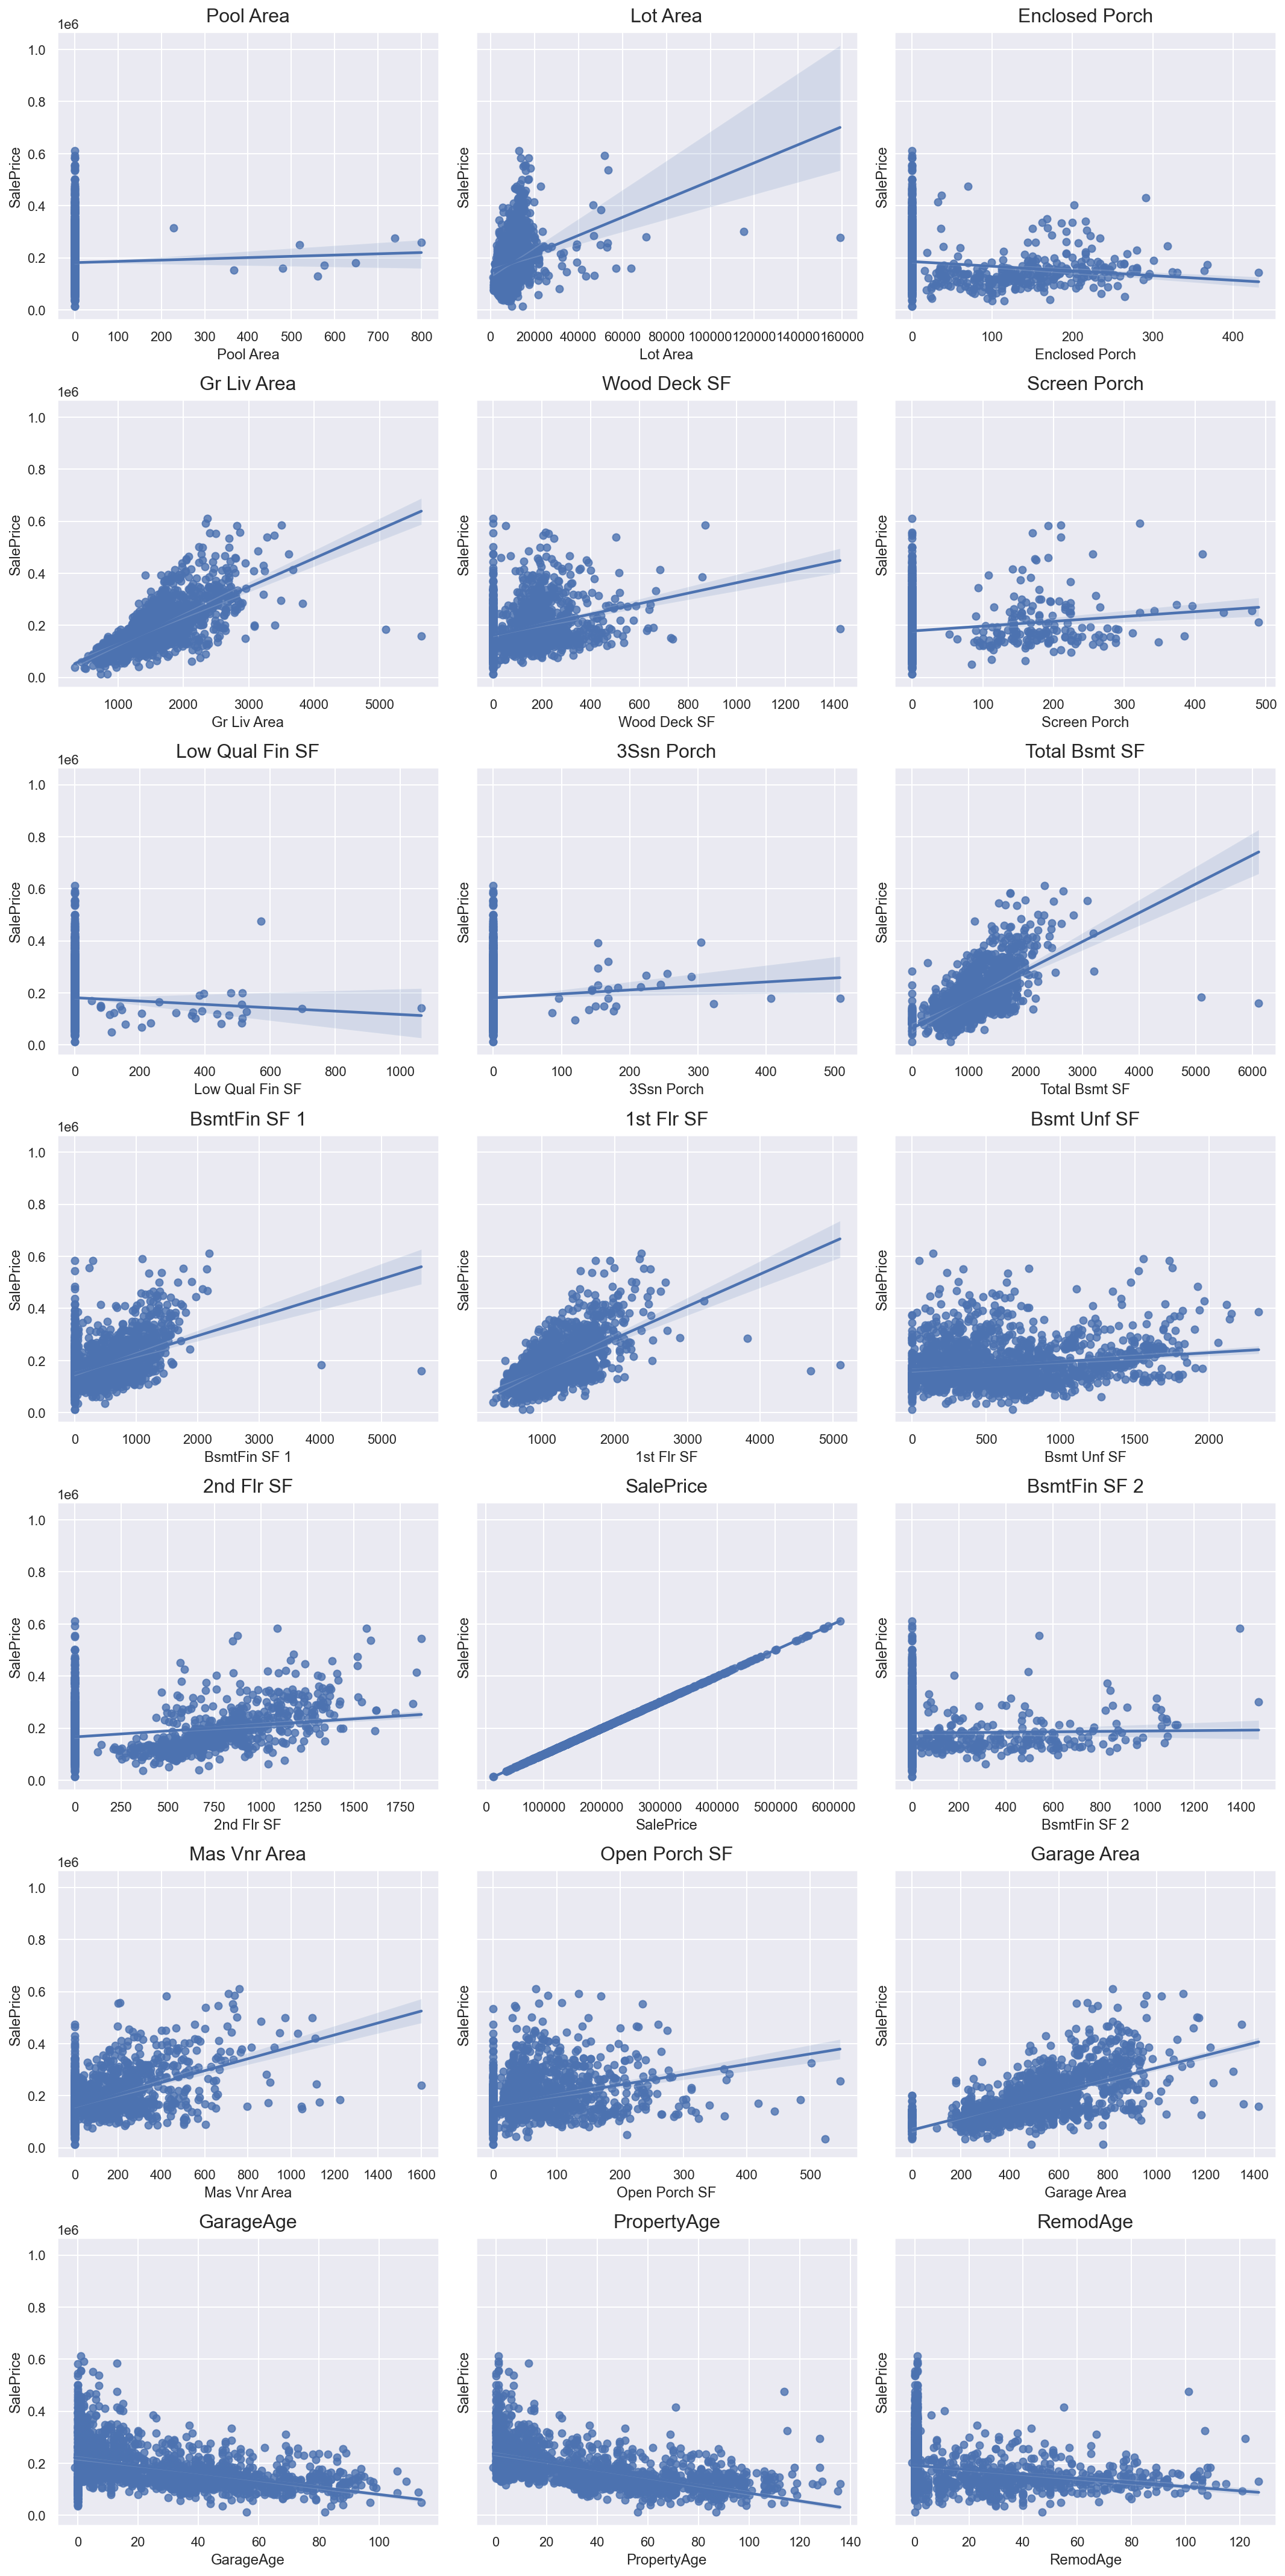

In [164]:
subplot_regplot(dataframe=train, y_value='SalePrice', 
                list_of_columns=cont_features, list_of_titles=cont_features, 
                list_of_xlabels=cont_features, ylabels='SalePrice', 
                plot_title='', figsize=(15,30));

**Discrete Features**
- These features seems categorical in nature. As the value increases uniformly, one hot encoding need not be applied on these feature to preserve the relationship between the categories. 

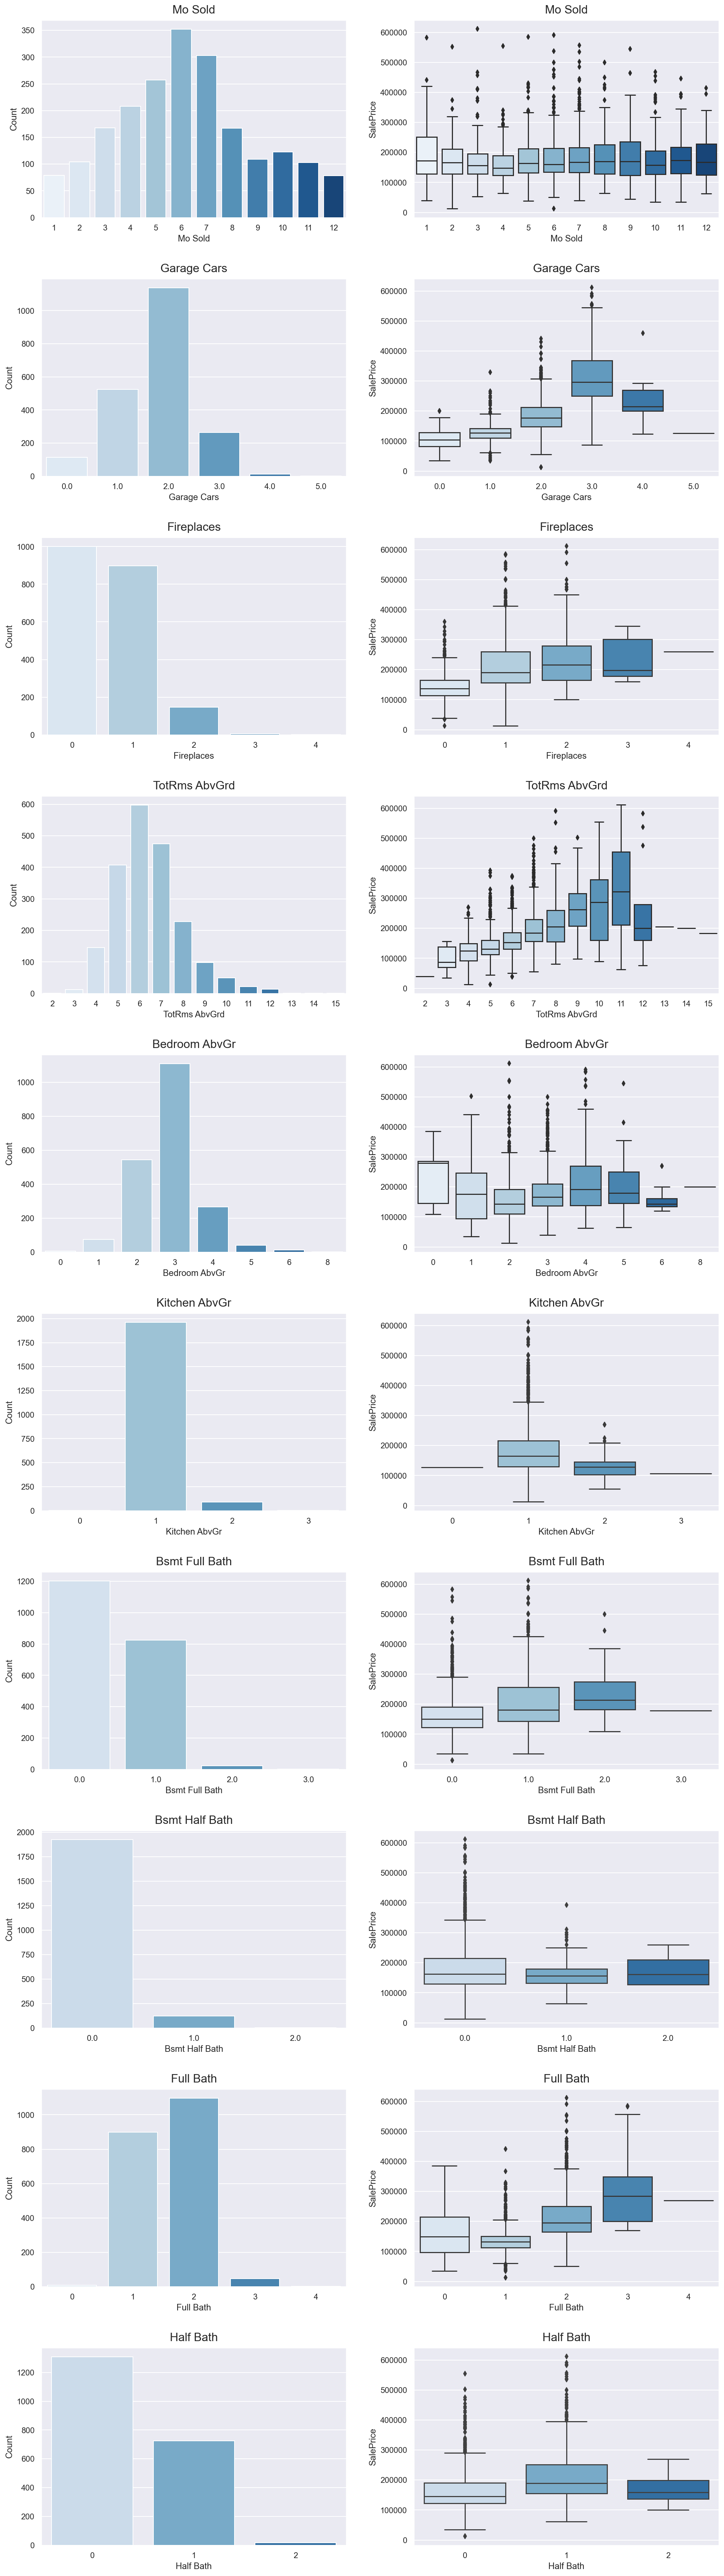

In [165]:
subplot_compare_nominal(dataframe=train, 
                        y_value='SalePrice',
                        list_of_columns=discrete_features, 
                        plot_title='', 
                        figsize=(15, 50));

In [166]:
# Recap list of numeric features created earlier. 
train[discrete_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mo Sold         2051 non-null   int64  
 1   Garage Cars     2051 non-null   float64
 2   Fireplaces      2051 non-null   int64  
 3   TotRms AbvGrd   2051 non-null   int64  
 4   Bedroom AbvGr   2051 non-null   int64  
 5   Kitchen AbvGr   2051 non-null   int64  
 6   Bsmt Full Bath  2051 non-null   float64
 7   Bsmt Half Bath  2051 non-null   float64
 8   Full Bath       2051 non-null   int64  
 9   Half Bath       2051 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 160.4 KB


In [167]:
# convert discrete_features to int
for feature in discrete_features:
    train[feature] = train[feature].map(int)

---
#### Renaming of Columns
Refering to the data dictionary, the empty spaces in the column name are removed. Hence, the spaces in the column name of the given data sets are also removed to align to the data dictionary. 

In [168]:
# Remove spaces in column name. 
train.columns = train.columns.str.replace(' ', '')

# Verify that column name has been renamed.
train.head()

MSSubClass MSZoning  LotArea  Street  LotShape LandContour Utilities  \
0         60       RL  13517.0       1         3         Lvl    AllPub   
1         60       RL  11492.0       1         3         Lvl    AllPub   
2         20       RL   7922.0       1         4         Lvl    AllPub   
3         60       RL   9802.0       1         4         Lvl    AllPub   
4         50       RL  14235.0       1         3         Lvl    AllPub   

  LotConfig  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0   CulDSac          1       Sawyer       RRAe       Norm     1Fam     2Story   
1   CulDSac          1      SawyerW       Norm       Norm     1Fam     2Story   
2    Inside          1        NAmes       Norm       Norm     1Fam     1Story   
3    Inside          1       Timber       Norm       Norm     1Fam     2Story   
4    Inside          1      SawyerW       Norm       Norm     1Fam     1.5Fin   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            8     Gable  CompShg     HdBoard     Plywood   
1            7            5     Gable  CompShg     VinylSd     VinylSd   
2            5            7     Gable  CompShg     VinylSd     VinylSd   
3            5            5     Gable  CompShg     VinylSd     VinylSd   
4            6            8     Gable  CompShg     Wd Sdng     Plywood   

  MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0    BrkFace       289.0          4          3     CBlock         3         3   
1    BrkFace       132.0          4          3      PConc         4         3   
2       None         0.0          3          4     CBlock         3         3   
3       None         0.0          3          3      PConc         4         3   
4       None         0.0          3          3      PConc         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  ...  BsmtHalfBath  FullBath  \
0             1             6       533.0  ...             0         2   
1             1             6       637.0  ...             0         2   
2             1             6       731.0  ...             0         1   
3             1             1         0.0  ...             0         2   
4             1             1         0.0  ...             0         2   

   HalfBath  BedroomAbvGr KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0         1             3            1            4             6        Typ   
1         1             4            1            4             8        Typ   
2         0             3            1            4             5        Typ   
3         1             3            1            3             7        Typ   
4         0             3            1            3             6        Typ   

   Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  \
0           0            0      Attchd             2           2       475.0   
1           1            3      Attchd             2           2       559.0   
2           0            0      Detchd             1           1       246.0   
3           0            0     BuiltIn             3           2       400.0   
4           0            0      Detchd             1           2       484.0   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           3           3           1         0.0         44.0            0.0   
1           3           3           1         0.0         74.0            0.0   
2           3           3           1         0.0         52.0            0.0   
3           3           3           1       100.0          0.0            0.0   
4           3           3           0         0.0         59.0            0.0   

  3SsnPorch  ScreenPorch  PoolArea PoolQC  MoSold  SaleType  SalePrice  \
0       0.0          0.0       0.0      0       3       WD    130500.0   
1       0.0          0.0       0.0      0       4       WD    220000.0   
2       0.0          0

---
### Summary of Data Cleaning (Train Dataset)

1. The null values for `Pool QC` are re-asssigned with 'NotApplicable' if the 'Pool Area' is indicated as zero (no pool). 
2. `Misc Feature` and `Misc Val` columns are dropped due to the large number of null value and its insignificance in determining the sale price.
3. `Alley` column is dropped due to insignificant size of values and increase likelihood of multi-collinearity.
4. `Fence` column is dropped due to the large number of null value and its insignificance in determining the sale price. 
5. The null values for `Fireplace Qu` are re-assigned with 'NotApplicable' if the 'Fireplaces' is indicated as zero (no fireplace).
6. `Lot Frontage` column is dropped due to increase likelihood of multi-collinearity and could possibly be represented by `Lot Area`.
7. Garage related features: `Garage Finish`, `Garage Qual`, `Garage Yr Blt`, `Garage Cond`,`Garage Type`, `Garage Area` and `Garage Cars`. For properties without garage, i.e., garage area is zero, their corresponding missing values for garage related features should be NotApplicable, except for Garage Yr Blt. As missing value in 'Garage Yr Blt' cannot be left as 'NotApplicable' or zero, a new column `GarageAge` will be created to reflect zero for no garage. `Garage Yr Blt` will be dropped.
8. For properties with no basement (`Total Bsmt SF` =0), the corresponding basement related columns are imputed with either zero or NotApplicable.
9. All 22 missing value in Masonry Veneer Area has corresponding missing value in Masonry Veneer Type. This makes up to about 1% of the data set. It is conservative to assumed that these properties has no masonry: to impute missing values in `Mas Vnr Area` with 0 and `Mas Vnr Type` with None.
10. `MS SubClass` is converted from integer to string.
11. The following features are treated as binary classification and converted to integers so that one hot encoding may be avoided: `Street`, `Central Air` and `Paved Drive`.
12. Identified features have unique scale that are not integers: `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Garage Finish`, `Land Slope`, `Lot Shape`. Specific dictionaries are specified to map the values to integers.
13. It is observed that some of the null values in `Bsmt Exposure`,`BsmtFin Type 1`, `BsmtFin Type 2`,`Bsmt Qual`, ignored earlier are converted to 0. This is assessed to be reasonable as they are less than 5% of the data set.
14. `Exter Cond`,`Pool QC`,`Kitchen Qual`,`Bsmt Cond`,`Fireplace Qu`,`Garage Qual`,`Heating QC`,`Garage Cond`,`Bsmt Qual`,`Exter Qual` share a common scale and are converted accordingly.
15. `Yr Sold`, `Year Remod/Add`, `Year Built` will be condensed into `PropertyAge` and `RemodAge` and will be dropped subsequently. 
16. `Id` and `PID` are dropped as they are unique and assessed to be not useful in predicting `SalePrice`
17. Spaces in column name are removed. 


---
### Cleaning Test Dataset

In [169]:
# Display first 5 rows of test dataset.
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond  ... Full Bath Half Bath  \
0         None           0.0         TA         Fa  ...         2         0   
1         None           0.0         TA         TA  ...         2         0   
2         None           0.0         Gd         TA  ...         2         1   
3         None           0.0         Gd         TA  ...         1         0   
4      BrkFace         247.0         TA         TA  ...         1         1   

  Bedroom AbvGr Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  \
0             4             2           Fa              9        Typ   
1             6             2           TA             10        Typ   
2             3             1           Gd              7        Typ   
3             2             1           TA              5        Typ   
4             3             1           TA              6        Typ   

   Fireplaces  Fireplace Qu  Garage Type Garage Yr Blt Garage Finish  \
0           0           NaN       Detchd        1910.0           Unf   
1           0           NaN       Attchd        1977.0           Fin   
2           1            Gd       Attchd        2006.0           RFn   
3           0           NaN       Detchd        1935.0           Unf   
4           2            Gd       Attchd        1963.0           RFn   

  Garage Cars Garage Area  Garage Qual  Garage Cond  Paved Drive  \
0           1         440           Po           Po            Y   
1           2         580           TA           TA            Y   
2           2         426           TA           TA            Y   
3           2         480           Fa           TA            N   
4           2         514           TA           TA            Y   

   Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
0             0             60             112           0             0   
1           170              0               0           0             0   
2           100             24               0           0             0   
3             0              0             184           0     

In [170]:
# Check for missing values
test.isnull().sum().sort_values(ascending=False)

Pool QC          874
Misc Feature     837
Alley            820
Fence            706
Fireplace Qu     422
                ... 
Bsmt Unf SF        0
Total Bsmt SF      0
PID                0
Heating QC         0
Sale Type          0
Length: 80, dtype: int64

1. Accounting for `Pool QC` missing values. 

In [171]:
# Count the number of unique values in 'Pool Area'
test['Pool Area'].value_counts()

0      874
144      1
555      1
512      1
444      1
Name: Pool Area, dtype: int64

In [172]:
#The total number of input for Pool QC column corresponds to 
# the total number of data for Pool Area with non-zero value. 
# Hence, it is deduced that the null values for Pool QC 
# should be 'NotApplicable' (no pool) instead.

# Replace null value in 'Pool QC' column with 'NotApplicable'
test['Pool QC'].fillna('NotApplicable', inplace=True)

In [173]:
# Check that all null values in 'Pool QC' are replaced
test['Pool QC'].value_counts()

NotApplicable    874
Ex                 3
TA                 1
Name: Pool QC, dtype: int64

In [174]:
# Recap missing values.
test.isnull().sum().sort_values(ascending=False)

Misc Feature     837
Alley            820
Fence            706
Fireplace Qu     422
Lot Frontage     160
                ... 
Bsmt Unf SF        0
Total Bsmt SF      0
PID                0
Heating QC         0
Sale Type          0
Length: 80, dtype: int64

2. `Misc Feature` and `Misc Val` columns are dropped due to the large number of null value and its insignificance in determining the sale price.

In [175]:
# Misc Feature column is dropped due to the large number of null value 
# and its insignificance in determining the sale price.
test.drop(columns=['Misc Feature', 'Misc Val'], inplace=True)

# check if 'Misc Feature' column was removed
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond  ... Bsmt Full Bath  \
0         None           0.0         TA         Fa  ...              0   
1         None           0.0         TA         TA  ...              0   
2         None           0.0         Gd         TA  ...              1   
3         None           0.0         Gd         TA  ...              0   
4      BrkFace         247.0         TA         TA  ...              1   

  Bsmt Half Bath Full Bath Half Bath Bedroom AbvGr  Kitchen AbvGr  \
0              0         2         0             4              2   
1              0         2         0             6              2   
2              0         2         1             3              1   
3              0         1         0             2              1   
4              0         1         1             3              1   

  Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
0           Fa              9         Typ           0          NaN   
1           TA             10         Typ           0          NaN   
2           Gd              7         Typ           1           Gd   
3           TA              5         Typ           0          NaN   
4           TA              6         Typ           2           Gd   

  Garage Type Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
0      Detchd        1910.0           Unf            1          440   
1      Attchd        1977.0           Fin            2          580   
2      Attchd        2006.0           RFn            2          426   
3      Detchd        1935.0           Unf            2          480   
4      Attchd        1963.0           RFn            2          514   

   Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  Open Porch SF  \
0           Po           Po            Y             0             60   
1           TA           TA            Y           170              0   
2           TA           TA            Y           100             24   
3           Fa           TA            N             0              0   
4           TA           TA            Y    

3. `Alley` column is dropped due to insignificant size of values and increase likelihood of multi-collinearity.

In [176]:
# Alley column is dropped due to insignificant size of values 
# and increase likelihood of multi-collinearity.
test.drop(columns='Alley', inplace=True)

# check if 'Alley' column was removed
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  ...  \
0         None           0.0         TA         Fa      Stone  ...   
1         None           0.0         TA         TA     CBlock  ...   
2         None           0.0         Gd         TA      PConc  ...   
3         None           0.0         Gd         TA     CBlock  ...   
4      BrkFace         247.0         TA         TA     CBlock  ...   

  Bsmt Full Bath Bsmt Half Bath Full Bath Half Bath  Bedroom AbvGr  \
0              0              0         2         0              4   
1              0              0         2         0              6   
2              1              0         2         1              3   
3              0              0         1         0              2   
4              1              0         1         1              3   

  Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  Functional Fireplaces  \
0             2            Fa              9         Typ          0   
1             2            TA             10         Typ          0   
2             1            Gd              7         Typ          1   
3             1            TA              5         Typ          0   
4             1            TA              6         Typ          2   

  Fireplace Qu Garage Type Garage Yr Blt  Garage Finish  Garage Cars  \
0          NaN      Detchd        1910.0            Unf            1   
1          NaN      Attchd        1977.0            Fin            2   
2           Gd      Attchd        2006.0            RFn            2   
3          NaN      Detchd        1935.0            Unf            2   
4           Gd      Attchd        1963.0            RFn            2   

   Garage Area  Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  \
0          440           Po           Po            Y             0   
1          580           TA           TA            Y           170   
2          426           TA           TA            Y           100   
3          480           Fa           TA            N             0   
4          514           TA           TA            Y             0   

   Open Porch SF  Enclos

In [177]:
# Recap missing values.
test.isnull().sum().sort_values(ascending=False)

Fence            706
Fireplace Qu     422
Lot Frontage     160
Garage Qual       45
Garage Yr Blt     45
                ... 
BsmtFin SF 2       0
Bsmt Unf SF        0
PID                0
Heating            0
Sale Type          0
Length: 77, dtype: int64

4. `Fence` column is dropped due to the large number of null value and its insignificance in determining the sale price.

In [178]:
# `Fence` column is dropped due to the large number of null value 
# and its insignificance in determining the sale price.
test.drop(columns='Fence', inplace=True)

# check if 'Fence' column was removed
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  ...  \
0         None           0.0         TA         Fa      Stone  ...   
1         None           0.0         TA         TA     CBlock  ...   
2         None           0.0         Gd         TA      PConc  ...   
3         None           0.0         Gd         TA     CBlock  ...   
4      BrkFace         247.0         TA         TA     CBlock  ...   

  Gr Liv Area Bsmt Full Bath Bsmt Half Bath Full Bath  Half Bath  \
0        1928              0              0         2          0   
1        1967              0              0         2          0   
2        1496              1              0         2          1   
3         968              0              0         1          0   
4        1394              1              0         1          1   

  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd Functional  \
0             4              2            Fa              9        Typ   
1             6              2            TA             10        Typ   
2             3              1            Gd              7        Typ   
3             2              1            TA              5        Typ   
4             3              1            TA              6        Typ   

  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  Garage Finish  \
0          0          NaN      Detchd         1910.0            Unf   
1          0          NaN      Attchd         1977.0            Fin   
2          1           Gd      Attchd         2006.0            RFn   
3          0          NaN      Detchd         1935.0            Unf   
4          2           Gd      Attchd         1963.0            RFn   

   Garage Cars  Garage Area  Garage Qual  Garage Cond  Paved Drive  \
0            1          440           Po           Po            Y   
1            2          580           TA           TA            Y   
2            2          426           TA           TA            Y   
3            2          480           Fa           TA            N   
4            2          514           TA           TA            Y   

   Wood Deck SF  Open Porch SF

5. The null values for `Fireplace Qu` are re-assigned with 'NotApplicable' if the 'Fireplaces' is indicated as zero (no fireplace).

In [179]:
test[test['Fireplaces']==0]['Fireplace Qu'].isnull().sum()

422

In [180]:
# For Fireplaces column, it has 422 rows with 0 fireplaces. 
# This means that there is no fireplaces in these properties, 
# which corresponds to the null value in the Fireplace Qu.

# Replace null value in 'Fireplace Qu' column with 'NotApplicable'
test['Fireplace Qu'].fillna('NotApplicable', inplace=True)

# Check that all null values in 'Pool QC' are replaced
test['Fireplace Qu'].value_counts()

NotApplicable    422
Gd               220
TA               193
Fa                16
Po                15
Ex                12
Name: Fireplace Qu, dtype: int64

6. `Lot Frontage` column is dropped due to increase likelihood of multi-collinearity and could possibly be represented by `Lot Area`.

In [181]:
# Lot Frontage column is dropped due to increase likelihood of multi-collinearity 
# and could possibly be represented by Lot Area.
test.drop(columns='Lot Frontage', inplace=True)

# check if 'Lot Frontage' column was removed
test.head()

Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
0  2658  902301120          190        RM      9142   Pave       Reg   
1  2718  905108090           90        RL      9662   Pave       IR1   
2  2414  528218130           60        RL     17104   Pave       IR1   
3  1989  902207150           30        RM      8520   Pave       Reg   
4   625  535105100           20        RL      9500   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
1          Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
2          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
3          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
4          Lvl    AllPub     Inside        Gtl        NAmes        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm    2fmCon      2Story             6             8        1910   
1        Norm    Duplex      1Story             5             4        1977   
2        Norm      1Fam      2Story             7             5        2006   
3        Norm      1Fam      1Story             5             6        1923   
4        Norm      1Fam      1Story             6             5        1963   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            1950      Gable   CompShg      AsbShng      AsbShng         None   
1            1977      Gable   CompShg      Plywood      Plywood         None   
2            2006      Gable   CompShg      VinylSd      VinylSd         None   
3            2006      Gable   CompShg      Wd Sdng      Wd Sdng         None   
4            1963      Gable   CompShg      Plywood      Plywood      BrkFace   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  ... Gr Liv Area  \
0           0.0         TA         Fa      Stone        Fa  ...        1928   
1           0.0         TA         TA     CBlock        Gd  ...        1967   
2           0.0         Gd         TA      PConc        Gd  ...        1496   
3           0.0         Gd         TA     CBlock        TA  ...         968   
4         247.0         TA         TA     CBlock        Gd  ...        1394   

  Bsmt Full Bath Bsmt Half Bath  Full Bath Half Bath  Bedroom AbvGr  \
0              0              0          2         0              4   
1              0              0          2         0              6   
2              1              0          2         1              3   
3              0              0          1         0              2   
4              1              0          1         1              3   

   Kitchen AbvGr  Kitchen Qual TotRms AbvGrd Functional Fireplaces  \
0              2            Fa             9        Typ          0   
1              2            TA            10        Typ          0   
2              1            Gd             7        Typ          1   
3              1            TA             5        Typ          0   
4              1            TA             6        Typ          2   

    Fireplace Qu  Garage Type  Garage Yr Blt  Garage Finish  Garage Cars  \
0  NotApplicable       Detchd         1910.0            Unf            1   
1  NotApplicable       Attchd         1977.0            Fin            2   
2             Gd       Attchd         2006.0            RFn            2   
3  NotApplicable       Detchd         1935.0            Unf            2   
4             Gd       Attchd         1963.0            RFn            2   

   Garage Area  Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  \
0          440           Po           Po            Y             0   
1          580           TA           TA            Y           170   
2          426           TA           TA            Y           100   
3          480           Fa           TA            N             0   
4          514          

In [182]:
# Recap missing values.
test.isnull().sum().sort_values(ascending=False)

Garage Cond      45
Garage Yr Blt    45
Garage Finish    45
Garage Qual      45
Garage Type      44
                 ..
BsmtFin SF 2      0
Bsmt Unf SF       0
PID               0
Heating           0
Sale Type         0
Length: 75, dtype: int64

7. Garage related features: `Garage Finish`, `Garage Qual`, `Garage Yr Blt`, `Garage Cond`,`Garage Type`, `Garage Area` and `Garage Cars`. For properties without garage, i.e., garage area is zero, their corresponding missing values for garage related features should be NotAppplicable, except for Garage Yr Blt. As missing value in 'Garage Yr Blt' cannot be left as 'NotApplicable' or zero, a new column `GarageAge` will be created to reflect zero for no garage. `Garage Yr Blt` will be dropped.

In [183]:
# for properties with no garage, check for missing values in the other garage features
test[test['Garage Area']==0].filter(like='Garage').isnull().sum()

Garage Type      44
Garage Yr Blt    44
Garage Finish    44
Garage Cars       0
Garage Area       0
Garage Qual      44
Garage Cond      44
dtype: int64

In [184]:
# For properties with no garage, fill missing value 
# of the corresponding missing values for garage related features with NA.

garage_features_to_fill = ['Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Type']

test.loc[test['Garage Area'] == 0, garage_features_to_fill] = 'NotApplicable'            

In [185]:
# Add a columns called GarageAge 
for i in test.index:
    if test.loc[i,'Garage Area']>0:
        test.loc[i, 'GarageAge'] = test.loc[i, 'Yr Sold'] - test.loc[i, 'Garage Yr Blt']
    else:
        test.loc[i, 'GarageAge'] = 0

In [186]:
# check if null values were filled with 'NotApplicable'
test.filter(like='Garage').isnull().sum()

Garage Type       0
Garage Yr Blt    45
Garage Finish     1
Garage Cars       0
Garage Area       0
Garage Qual       1
Garage Cond       1
GarageAge         1
dtype: int64

In [187]:
# identify row of data with garage area is null value  
test[test['Garage Qual'].isnull()][list(test.filter(like='Garage').columns)+['Year Built', 'Year Remod/Add', 'Yr Sold']]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
764      Detchd            NaN           NaN            1          360   

    Garage Qual Garage Cond  GarageAge  Year Built  Year Remod/Add  Yr Sold  
764         NaN         NaN        NaN        1910            1983     2008

This is the same row which the garage features has null values except for Garage Type. As all columns in index 1712 is filled except for the 6 garage related features with missing value, the missing values will be imputed. 
- `Garage Yr Blt` is filled as 1910, assuming garage is built with the property. This is assessed to be reasonable as there is a high correlation between year which property was built and year which garage was built. Moreover, their correlation with the sale price is about the same. 
- `Garage Finish`, `Garage Qual`, `Garage Cond` will be imputed with the mode of the respective column. 
- `Garage Cars` and `Garage Area` will be imputed with the mean of the respective column. 

In [188]:
# input Garage Yr Blt for index 764. 
test.loc[test.index==764, 'Garage Yr Blt'] = 1910  

# update GarageAge accordingly
test.loc[test.index==764, 'GarageAge'] = test.loc[test.index==764, 'Yr Sold'] - test.loc[test.index==764, 'Garage Yr Blt'] 

In [189]:
# Check that value is input correctly.
test.loc[test.index==764][list(test.filter(like='Garage').columns)+['Year Built', 'Year Remod/Add', 'Yr Sold']]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
764      Detchd         1910.0           NaN            1          360   

    Garage Qual Garage Cond  GarageAge  Year Built  Year Remod/Add  Yr Sold  
764         NaN         NaN       98.0        1910            1983     2008

In [190]:
test.loc[test['Garage Type']=='Detchd','Garage Finish']

0      Unf
3      Unf
6      Unf
7      Unf
9      Unf
      ... 
853    Unf
854    Fin
855    Unf
864    Unf
876    Unf
Name: Garage Finish, Length: 246, dtype: object

In [191]:
# Compute the mode for 'Garage Finish', 'Garage Qual', 'Garage Cond' column. 
garage_mode_df = test.loc[test['Garage Type']=='Detchd', ['Garage Finish', 'Garage Qual', 'Garage Cond']].mode()
garage_mode_df

Garage Finish Garage Qual Garage Cond
0           Unf          TA          TA

In [192]:
# impute 'Garage Finish', 'Garage Qual', 'Garage Cond' column with the respective mode values for index 764. 
test.loc[test.index==764, ['Garage Finish', 'Garage Qual', 'Garage Cond']] = list(garage_mode_df.iloc[0])

In [193]:
# Check that value is input correctly.
test.loc[test.index==764][test.filter(like='Garage').columns]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
764      Detchd         1910.0           Unf            1          360   

    Garage Qual Garage Cond  GarageAge  
764          TA          TA       98.0

In [194]:
# check if null values were filled with 'NotApplicable'
test.filter(like='Garage').isnull().sum()

Garage Type       0
Garage Yr Blt    44
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
GarageAge         0
dtype: int64

In [195]:
# Drop 'Garage Yr Blt' column
test.drop(columns='Garage Yr Blt', inplace=True)

In [196]:
# Recap missing values.
test.isnull().sum().sort_values(ascending=False)

Bsmt Exposure     25
BsmtFin Type 2    25
Bsmt Qual         25
Bsmt Cond         25
BsmtFin Type 1    25
                  ..
BsmtFin SF 2       0
Bsmt Unf SF        0
PID                0
Heating            0
GarageAge          0
Length: 75, dtype: int64

8. Accounting for missing values in basement related columns

In [197]:
# Display number of missing values in Basement related columns/
test.filter(like='Bsmt').isnull().sum()

Bsmt Qual         25
Bsmt Cond         25
Bsmt Exposure     25
BsmtFin Type 1    25
BsmtFin SF 1       0
BsmtFin Type 2    25
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Bsmt Full Bath     0
Bsmt Half Bath     0
dtype: int64

In [198]:
# Display properties with zero basement area.
test.filter(like='Bsmt')[test['Total Bsmt SF']==0]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
15        NaN       NaN           NaN            NaN             0   
37        NaN       NaN           NaN            NaN             0   
76        NaN       NaN           NaN            NaN             0   
78        NaN       NaN           NaN            NaN             0   
112       NaN       NaN           NaN            NaN             0   
144       NaN       NaN           NaN            NaN             0   
189       NaN       NaN           NaN            NaN             0   
205       NaN       NaN           NaN            NaN             0   
278       NaN       NaN           NaN            NaN             0   
291       NaN       NaN           NaN            NaN             0   
293       NaN       NaN           NaN            NaN             0   
314       NaN       NaN           NaN            NaN             0   
320       NaN       NaN           NaN            NaN             0   
413       NaN       NaN           NaN            NaN             0   
430       NaN       NaN           NaN            NaN             0   
480       NaN       NaN           NaN            NaN             0   
527       NaN       NaN           NaN            NaN             0   
552       NaN       NaN           NaN            NaN             0   
613       NaN       NaN           NaN            NaN             0   
618       NaN       NaN           NaN            NaN             0   
621       NaN       NaN           NaN            NaN             0   
625       NaN       NaN           NaN            NaN             0   
654       NaN       NaN           NaN            NaN             0   
702       NaN       NaN           NaN            NaN             0   
771       NaN       NaN           NaN            NaN             0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
15             NaN             0            0              0               0   
37             NaN             0            0              0               0   
76             NaN             0            0              0               0   
78             NaN             0            0              0               0   
112            NaN             0            0              0               0   
144            NaN             0            0              0               0   
189            NaN             0            0              0               0   
205            NaN             0            0              0               0   
278            NaN             0            0              0               0   
291            NaN             0            0              0               0   
293            NaN             0            0              0               0   
314            NaN             0            0              0               0   
320            NaN             0            0              0               0   
413            NaN             0            0              0               0   
430            NaN             0            0              0               0   
480            NaN             0            0              0               0   
527            NaN             0            0              0               0   
552            NaN             0            0              0               0   
613            NaN             0            0              0               0   
618            NaN             0            0              0               0   
621            NaN             0            0              0               0   
625            NaN             0            0              0               0   
654            NaN             0            0              0               0   
702            NaN             0            0              0               0   
771            NaN             0            0              0               0   

     Bsmt Half Bath  
15                0  
37                0  
76                0  
78            

In [199]:
# Count the values for 'Total Bsmt SF' column for filtered data.
test.filter(like='Bsmt')[test['Total Bsmt SF']==0].shape

(25, 11)

These 25 properties have zero 'Total Bsmt SF'. This means that basement is not present. All null values should be filled with 'NotApplicable'.

In [200]:
# Get index of properties with zero 'Total Bsmt SF'.
no_bsmt_index = test.filter(like='Bsmt')[test['Total Bsmt SF']==0].index

In [201]:
# List of columns to impute
bsmt_features_to_impute = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

# impute missing values of these properties with 'NotApplicable'. 
test.loc[list(no_bsmt_index), bsmt_features_to_impute] = 'NotApplicable'

In [202]:
# Verify that data has been replace correctly.
test[bsmt_features].isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

In [203]:
# Recap missing values.
test.isnull().sum().sort_values(ascending=False)

Electrical      1
Mas Vnr Type    1
Mas Vnr Area    1
Id              0
Half Bath       0
               ..
Exter Qual      0
Exterior 2nd    0
Exterior 1st    0
Roof Matl       0
GarageAge       0
Length: 75, dtype: int64

9. Missing value in Masonry Veneer Area has corresponding missing value in Masonry Veneer Type. This makes up to less than 1% of the data set. It is conservative to assumed that these properties has no masonry: to impute missing values in `Mas Vnr Area` with 0 and `Mas Vnr Type` with None.


In [204]:
# Check the value count of Mas Vnr Area
test[test['Mas Vnr Area'].isnull()][['Mas Vnr Area', 'Mas Vnr Type']]

Mas Vnr Area Mas Vnr Type
865           NaN          NaN

In [205]:
# impute Mas Vnr Area with 0 and Mas Vnr Type to None.
test['Mas Vnr Area'].fillna(0, inplace=True)
test['Mas Vnr Type'].fillna('None', inplace=True)

In [206]:
# impute missing data for ELectrical columns with mode. 
test['Electrical'].fillna(str(test['Electrical'].mode()), inplace=True)

In [207]:
# Recap missing values. 
# All null values addressed. 
test.isnull().sum().sort_values(ascending=False)

Id               0
Fireplace Qu     0
Functional       0
TotRms AbvGrd    0
Kitchen Qual     0
                ..
Mas Vnr Type     0
Exterior 2nd     0
Exterior 1st     0
Roof Matl        0
GarageAge        0
Length: 75, dtype: int64

10. `MS SubClass` is converted from integer to string.

In [208]:
# Reclassify MS SubClass to string instead of int so that it will not be processed as numeric feature. 
test['MS SubClass'] = test['MS SubClass'].map(lambda value: str(value))

11. The following features are treated as binary classification and converted to integers so that one hot encoding may be avoided: `Street`, `Central Air` and `Paved Drive`.

In [209]:
# Display values for Street column. 
test['Street'].value_counts()

Pave    873
Grvl      5
Name: Street, dtype: int64

In [210]:
# Converting boolean datatypes to numbers so that one hot encoding may be avoided.
test['Street'].replace({'Pave': 1, 'Grvl': 0},inplace=True)

In [211]:
# Verify that consersion is done. 
test['Street'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: Street
Non-Null Count  Dtype
--------------  -----
878 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


In [212]:
# Display values for Street column. 
test['Central Air'].value_counts()

Y    823
N     55
Name: Central Air, dtype: int64

In [213]:
# Converting boolean datatypes to numbers so that one hot encoding may be avoided.
test['Central Air'].replace({'Y': 1, 'N': 0},inplace=True)

In [214]:
# Verify that consersion is done. 
test['Central Air'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: Central Air
Non-Null Count  Dtype
--------------  -----
878 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


In [215]:
# Display values for Paved Drive column. 
test['Paved Drive'].value_counts()

Y    790
N     65
P     23
Name: Paved Drive, dtype: int64

In [216]:
# Converting boolean datatypes to numbers so that one hot encoding may be avoided.
test['Paved Drive'].replace({'Y': 1, 'N': 0, 'P':0},inplace=True)

In [217]:
# Verify that consersion is done. 
test['Paved Drive'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: Paved Drive
Non-Null Count  Dtype
--------------  -----
878 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


12. Identified features have unique scale that are not integers: `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Garage Finish`, `Land Slope`, `Lot Shape`. Specific dictionaries are specified to map the values to integers.

In [218]:
# list of features with unique scale. 
unique_scale_features = ['Bsmt Exposure', 'BsmtFin Type 1','BsmtFin Type 2',
                         'Garage Finish', 'Land Slope', 'Lot Shape']

In [219]:
# Dictionaries for conversion
bsmt_exposure_dict = {"Gd":4, "Av":3, "Mn":2, "No":1, "NotApplicable":0}
bsmtfin_dict = {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NotApplicable":0}
garage_finish_dict = {"Fin":3, "RFn":2, "Unf":1, "NotApplicable":0}
land_slope_dict = {"Sev":3, "Mod":2, "Gtl":1, "NotApplicable":0}
lot_shape_dict = {"Reg":4, "IR1":3, "IR2":2, "IR3":1, "NotApplicable":0}

# sequence of dictionary to input map_ordinal function
dict_seq=[bsmt_exposure_dict, bsmtfin_dict, bsmtfin_dict, 
          garage_finish_dict, land_slope_dict, lot_shape_dict]

In [220]:
# map unique scale columns to integers.

for column, column_dict in zip(unique_scale_features, dict_seq):
    map_ordinal(test, column, column_dict)

=== Bsmt Exposure ====
Before:
No               567
Av               130
Gd                80
Mn                76
NotApplicable     25
Name: Bsmt Exposure, dtype: int64

After:
1    567
3    130
4     80
2     76
0     25
Name: Bsmt Exposure, dtype: int64

=== BsmtFin Type 1 ===
Before:
Unf              248
GLQ              243
ALQ              136
Rec              105
BLQ               69
LwQ               52
NotApplicable     25
Name: BsmtFin Type 1, dtype: int64

After:
1    248
6    243
5    136
3    105
4     69
2     52
0     25
Name: BsmtFin Type 1, dtype: int64

=== BsmtFin Type 2 ===
Before:
Unf              749
LwQ               29
Rec               26
NotApplicable     25
BLQ               20
ALQ               18
GLQ               11
Name: BsmtFin Type 2, dtype: int64

After:
1    749
2     29
3     26
0     25
4     20
5     18
6     11
Name: BsmtFin Type 2, dtype: int64

=== Garage Finish ====
Before:
Unf              383
RFn              233
Fin              218
NotAppli

13. `Exter Cond`,`Pool QC`,`Kitchen Qual`,`Bsmt Cond`,`Fireplace Qu`,`Garage Qual`,`Heating QC`,`Garage Cond`,`Bsmt Qual`,`Exter Qual` share a common scale and are converted accordingly.

In [221]:
# Display list of remaining ordinal features not mapped. 
common_scale_features = list(set(ordinal_features) 
                             - set(unique_scale_features) 
                             - {'Overall Qual', 'Overall Cond'})
common_scale_features

['Fireplace Qu',
 'Garage Qual',
 'Heating QC',
 'Exter Cond',
 'Bsmt Cond',
 'Pool QC',
 'Bsmt Qual',
 'Garage Cond',
 'Kitchen Qual',
 'Exter Qual']

In [222]:
# Create dictionary for common scale ordinal features.
common_scale_dict = {'NotApplicable': 0,'Po':1,'Fa':2,"TA":3,"Gd":4,'Ex':5}

# map common scale columns to integers.
for column in common_scale_features:
    map_ordinal(test, column, common_scale_dict)

==== Fireplace Qu ====
Before:
NotApplicable    422
Gd               220
TA               193
Fa                16
Po                15
Ex                12
Name: Fireplace Qu, dtype: int64

After:
0    422
4    220
3    193
2     16
1     15
5     12
Name: Fireplace Qu, dtype: int64

==== Garage Qual =====
Before:
TA               783
NotApplicable     44
Fa                42
Gd                 6
Po                 3
Name: Garage Qual, dtype: int64

After:
3    783
0     44
2     42
4      6
1      3
Name: Garage Qual, dtype: int64

===== Heating QC =====
Before:
Ex    429
TA    267
Gd    157
Fa     25
Name: Heating QC, dtype: int64

After:
5    429
3    267
4    157
2     25
Name: Heating QC, dtype: int64

===== Exter Cond =====
Before:
TA    770
Gd     84
Fa     18
Ex      5
Po      1
Name: Exter Cond, dtype: int64

After:
3    770
4     84
2     18
5      5
1      1
Name: Exter Cond, dtype: int64

===== Bsmt Cond ======
Before:
TA               781
Fa                39
Gd          

In [223]:
# Verify all ordinal data are converted into integers
test[ordinal_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot Shape       878 non-null    int64
 1   Land Slope      878 non-null    int64
 2   Exter Qual      878 non-null    int64
 3   Exter Cond      878 non-null    int64
 4   Bsmt Qual       878 non-null    int64
 5   Bsmt Cond       878 non-null    int64
 6   Bsmt Exposure   878 non-null    int64
 7   BsmtFin Type 1  878 non-null    int64
 8   BsmtFin Type 2  878 non-null    int64
 9   Heating QC      878 non-null    int64
 10  Kitchen Qual    878 non-null    int64
 11  Fireplace Qu    878 non-null    int64
 12  Garage Finish   878 non-null    int64
 13  Garage Qual     878 non-null    int64
 14  Garage Cond     878 non-null    int64
 15  Pool QC         878 non-null    int64
 16  Overall Qual    878 non-null    int64
 17  Overall Cond    878 non-null    int64
dtypes: int64(18)
memory usage: 123

14. `Yr Sold`, `Year Remod/Add`, `Year Built` will be condensed into `PropertyAge` and `RemodAge` and will be dropped subsequently. 

In [224]:
# create PropertyAge column
test['PropertyAge'] = test['Yr Sold'] - test['Year Built']

# create RemodAge columns
test['RemodAge'] = test['Year Remod/Add'] - test['Year Built']

In [225]:
# Drop Yr Sold, Year Remod/Add, Year Built column
test.drop(columns=['Yr Sold', 'Year Remod/Add', 'Year Built'], inplace=True)

15. `Id` and `PID` are dropped as they are unique and assessed to be not useful in predicting `SalePrice`. However, `Id` will be kept as it is needed for kaggle submission.

In [226]:
# Drop Id and PID column
test.drop(columns=['PID'], inplace=True)

16. Spaces in column name are removed.

In [227]:
# Remove spaces in column name. 
test.columns = test.columns.str.replace(' ', '')

# Verify that column name has been renamed.
test.head()

Id MSSubClass MSZoning  LotArea  Street  LotShape LandContour Utilities  \
0  2658        190       RM     9142       1         4         Lvl    AllPub   
1  2718         90       RL     9662       1         3         Lvl    AllPub   
2  2414         60       RL    17104       1         3         Lvl    AllPub   
3  1989         30       RM     8520       1         4         Lvl    AllPub   
4   625         20       RL     9500       1         3         Lvl    AllPub   

  LotConfig  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside          1      OldTown       Norm       Norm   2fmCon     2Story   
1    Inside          1       Sawyer       Norm       Norm   Duplex     1Story   
2    Inside          1      Gilbert       Norm       Norm     1Fam     2Story   
3    Inside          1      OldTown       Norm       Norm     1Fam     1Story   
4    Inside          1        NAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            8     Gable  CompShg     AsbShng     AsbShng   
1            5            4     Gable  CompShg     Plywood     Plywood   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            5            6     Gable  CompShg     Wd Sdng     Wd Sdng   
4            6            5     Gable  CompShg     Plywood     Plywood   

  MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       None         0.0          3          2      Stone         2         3   
1       None         0.0          3          3     CBlock         4         3   
2       None         0.0          4          3      PConc         4         4   
3       None         0.0          4          3     CBlock         3         3   
4    BrkFace       247.0          3          3     CBlock         4         3   

   BsmtExposure  BsmtFinType1  ...  BsmtFullBath  BsmtHalfBath  FullBath  \
0             1             1  ...             0             0         2   
1             1             1  ...             0             0         2   
2             3             6  ...             1             0         2   
3             1             1  ...             0             0         1   
4             1             4  ...             1             0         1   

   HalfBath  BedroomAbvGr KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0         0             4            2            2             9        Typ   
1         0             6            2            3            10        Typ   
2         1             3            1            4             7        Typ   
3         0             2            1            3             5        Typ   
4         1             3            1            3             6        Typ   

   Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  \
0           0            0      Detchd             1           1         440   
1           0            0      Attchd             3           2         580   
2           1            4      Attchd             2           2         426   
3           0            0      Detchd             1           2         480   
4           2            4      Attchd             2           2         514   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           1           1           1           0           60            112   
1           3           3           1         170            0              0   
2           3           3           1         100           24              0   
3           2           3           0           0            0            184   
4           3           3           1           0           76              0   

  3SsnPorch  ScreenPorch  PoolArea PoolQC  MoSold  SaleType  GarageAge  \
0         0            0         0      0       4       WD        96.0   
1         0            0         0      0       8  

In [228]:
# rename features list of the various data types
nominal_features = [feature.replace(' ', '') for feature in nominal_features]
ordinal_features = [feature.replace(' ', '') for feature in ordinal_features]
discrete_features = [feature.replace(' ', '') for feature in discrete_features]
cont_features = [feature.replace(' ', '') for feature in cont_features]

In [229]:
# check that the sets of columns in test and train dataset are the same.
set(test.drop(columns=['Id']).columns) == set(train.drop(columns=['SalePrice']).columns)

True

In [230]:
# convert cont_features to float
for feature in (set(cont_features)-{'SalePrice'}):
    test[feature] = test[feature].map(float)

In [231]:
# convert discrete_features to int
for feature in discrete_features:
    test[feature] = test[feature].map(int)

In [232]:
# check that the sets of columns in test and train dataset are the same.
list(test.drop(columns=['Id']).dtypes)== list(train.drop(columns=['SalePrice']).dtypes)

True

---
### Data Dictionary

Data Dictionary was provided for this project. Refer to data dictionary [here](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/data).

---
## 2. Exploratory Data Analysis (EDA)

### Nominal Data
1. `LotConfig` - the sub-categories does not seem to suggest significant differentiation in sale price. Hence, it will be dropped.
2. Features possible to group sub-categories:
    
    * Condition1
        - PosA_PosN_RRNn (low count, high price)
        - Norm
        - Others 
    * Condition2
        - PosA_PosN (low count, high price)
        - Norm (high count)
        - Others 
    * BldgType
        - 1Fam_TwnhsE (high count, high price)
        - Others
    * LandContour
        - HLS_Low (low count, high price)
        - Others 
    * GarageType
        - Attchd (high count, high price)
        - BuiltIn (low count, high price)
        - Others
    * MSZoning
        - FV_RL_RH
        - Others
    * HouseStyle
        - 2.5Fin
        - 1Story_2Story
        - Others 
    * Roofstyle
        - Hip
        - Others
    * RoofMatl
        - CompShg (high count, high price)
        - WdShngl (low count, high price)
        - WdShake (low count, high price)
        - Others
    * MSSubClass
        - 60_20 (high count, high price)
        - 120 (low count, high price)
        - 75 (low count, high price)
        - Others 
    * MasVnrType
        - Stone (low count, high price)
        - Others 
    * Foundation
        - PConc  (high count, high price)
        - Others
    * Heating
        - GasA_GasW (high count, high price)
        - Others
    * Electrical
        - SBrkr (high count, high price)
        - Others
    * Functional
        - Typ (high count, high price)
        - Others
    * SaleType
        - New (low count, high price)
        - Con (low count, high price)
        - Others

3. Features further analysis as they have too many sub-categories: `Neighborhood`, `Exterior1st`, `Exterior2nd`
4. Skewed features (high count of a particular sub-category) and will be dropped: `Utilities`


In [233]:
# Recap on the number of nominal features.
len(nominal_features)

24

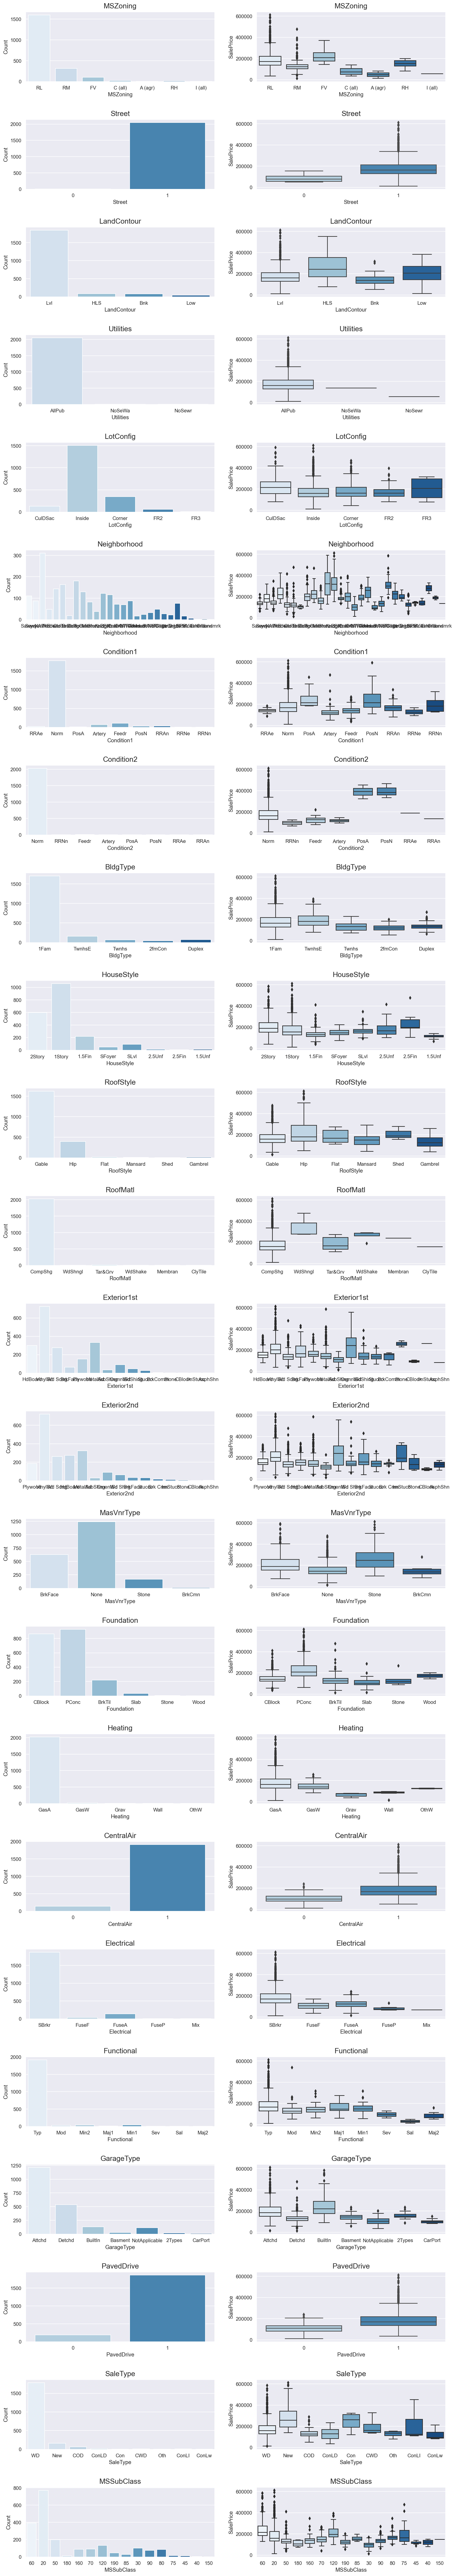

In [234]:
subplot_compare_nominal(dataframe=train, 
                        y_value='SalePrice',
                        list_of_columns=nominal_features, 
                        plot_title='', 
                        figsize=(15, 80));

#### Drop LotConfig and Utilities
- `LotConfig` - the sub-categories does not seem to suggest significant differentiation in sale price. Hence, it will be dropped.

- Skewed features (high count of a particular sub-category) and will be dropped: `Utilities`


In [235]:
train.drop(columns=['LotConfig', 'Utilities'], inplace=True);
test.drop(columns=['LotConfig', 'Utilities'], inplace=True);

In [236]:
# update nominal features list
nominal_features.remove('LotConfig')
nominal_features.remove('Utilities')


#### Re-categorise Features
From the count plot and box plot above, the project identified features that has sub-categories that has notable price differences. These sub-categories would be grouped together in order to create a not so complex model. These features are:

- `Condition1`
- `Condition2`
- `BldgType`
- `LandContour`
- `GarageType`
- `MSZoning`
- `HouseStyle`
- `RoofStyle`
- `RoofMatl`
- `MSSubClass`
- `MasVnrType`
- `Foundation`
- `Heating`
- `Electrical`
- `Functional`
- `SaleType`

In [237]:
# re-categorise Condition1
map_dict = {'RRAe':'Others',
            'Norm':'Norm', 
            'PosA': 'PosA_PosN_RRNn', 
            'Artery': 'Others', 
            'Feedr': 'Others', 
            'PosN': 'PosA_PosN_RRNn', 
            'RRAn': 'Others', 
            'RRNe': 'Others',
            'RRNn':'PosA_PosN_RRNn'}

train['Condition1'] = train['Condition1'].map(map_dict)
test['Condition1'] = test['Condition1'].map(map_dict)

In [238]:
# re-categorise Condition2
map_dict = {'RRAe':'Others',
            'Norm':'Norm', 
            'PosA': 'PosA_PosN', 
            'Artery': 'Others', 
            'Feedr': 'Others', 
            'PosN': 'PosA_PosN', 
            'RRAn': 'Others',
            'RRNn':'Others'}

train['Condition2'] = train['Condition2'].map(map_dict)
test['Condition2'] = test['Condition2'].map(map_dict)

In [239]:
# re-categorise BldgType
map_dict = {'2fmCon':'Others',
            'Duplex':'Others', 
            '1Fam': '1Fam_TwnhsE', 
            'TwnhsE': '1Fam_TwnhsE', 
            'Twnhs': 'Others'}

train['BldgType'] = train['BldgType'].map(map_dict)

test['BldgType'] = test['BldgType'].map(map_dict)

In [240]:
# re-categorise LandContour
map_dict = {'Lvl':'Others',
            'HLS':'HLS_Low', 
            '1Fam': 'Others', 
            'Bnk': 'Others', 
            'Low': 'HLS_Low'}

train['LandContour'] = train['LandContour'].map(map_dict)

test['LandContour'] = test['LandContour'].map(map_dict)

In [241]:
# re-categorise GarageType
map_dict = {'Attchd':'Attchd',
            'Detchd':'Others', 
            'BuiltIn': 'BuiltIn', 
            'Basment': 'Others', 
            'NotApplicable': 'Others'}

train['GarageType'] = train['GarageType'].map(map_dict)

test['GarageType'] = test['GarageType'].map(map_dict)

In [242]:
# re-categorise MSZoning
map_dict = {'RL':'FV_RL_RH',
            'RM':'Others', 
            'FV': 'FV_RL_RH', 
            'C (all)': 'Others', 
            'A (agr)': 'Others', 
            'RH': 'FV_RL_RH',
            'I (all)': 'Others'}

train['MSZoning'] = train['MSZoning'].map(map_dict)

test['MSZoning'] = test['MSZoning'].map(map_dict)

In [243]:
# re-categorise HouseStyle
map_dict = {'2Story':'1Story_2Story',
            '1Story':'1Story_2Story', 
            '1.5Fin': 'Others', 
            'SFoyer': 'Others', 
            'SLvl': 'Others', 
            '2.5Unf': 'Others',
            '2.5Fin': '2.5Fin', 
            '1.5Unf': 'Others'}

train['HouseStyle'] = train['HouseStyle'].map(map_dict)
    
test['HouseStyle'] = test['HouseStyle'].map(map_dict)

In [244]:
# re-categorise RoofStyle
map_dict = {'Gable':'Others',
            'Hip':'Hip', 
            'Flat': 'Others', 
            'Mansard': 'Others', 
            'Shed': 'Others', 
            'Gambrel': 'Others'}

train['RoofStyle'] = train['RoofStyle'].map(map_dict)
    
test['RoofStyle'] = test['RoofStyle'].map(map_dict)

In [245]:
# re-categorise RoofMatl
map_dict = {'CompShg':'CompShg',
            'WdShngl':'WdShngl', 
            'Tar&Grv': 'Others', 
            'WdShake': 'WdShake', 
            'Membran': 'Others', 
            'ClyTile': 'Others'}

train['RoofMatl'] = train['RoofMatl'].map(map_dict)
    
test['RoofMatl'] = test['RoofMatl'].map(map_dict)

In [246]:
# re-categorise MSSubClass
map_dict={'60':'60_20', 
          '20': '60_20', 
          '50': 'Others',
          '180':'Others',
          '160':'Others',
          '70':'Others',
          '120':'120',
          '190':'Others',
          '85':'Others',
          '30':'Others',
          '90':'Others',
          '80':'Others',
          '75':'75',
          '45':'Others',
          '40':'Others',
          '150':'Others'}

train['MSSubClass'] = train['MSSubClass'].map(map_dict)
    
test['MSSubClass'] = test['MSSubClass'].map(map_dict)

In [247]:
# re-categorise MasVnrType
map_dict={'BrkFace':'Others', 
          'None': 'Others', 
          'Stone': 'Stone',
          'BrkCmn':'Others'}

train['MasVnrType'] = train['MasVnrType'].map(map_dict)
    
test['MasVnrType'] = test['MasVnrType'].map(map_dict)

In [248]:
# re-categorise Foundation
map_dict={'CBlock':'Others', 
          'PConc': 'PConc', 
          'BrkTil': 'Others',
          'Slab':'Others',
          'Stone':'Others',
          'Wood':'Others'}

train['Foundation'] = train['Foundation'].map(map_dict)
    
test['Foundation'] = test['Foundation'].map(map_dict)

In [249]:
# re-categorise Heating
map_dict={'GasA':'GasA_GasW', 
          'GasW': 'GasA_GasW', 
          'Grav': 'Others',
          'OthW':'Others', 
          'Floor': 'Others',
          'Wall': 'Others'}

train['Heating'] = train['Heating'].map(map_dict)
    
test['Heating'] = test['Heating'].map(map_dict)

In [250]:
# re-categorise Electrical
map_dict={'SBrkr':'SBrkr', 
          'FuseF': 'Others', 
          'FuseA': 'Others',
          'FuseP':'Others',
          'Mix':'Others'}

train['Electrical'] = train['Electrical'].map(map_dict)
    
test['Electrical'] = test['Electrical'].map(map_dict)

In [251]:
# re-categorise Functional
map_dict={'Typ':'Typ', 
          'Mod': 'Others', 
          'Min2': 'Others',
          'Maj1':'Others',
          'Min1':'Others',
          'Sev':'Others',
          'Sal':'Others',
          'Maj2':'Others'}

train['Functional'] = train['Functional'].map(map_dict)
    
test['Functional'] = test['Functional'].map(map_dict)

In [252]:
# re-categorise SaleType
map_dict={'WD ':'Others', 
          'New': 'New', 
          'COD': 'Others',
          'ConLD':'Others',
          'Con':'Con',
          'CWD':'Others',
          'VWD':'Others',
          'Oth':'Others',
          'ConLI':'Others', 
          'ConLw':'Others'}

train['SaleType'] = train['SaleType'].map(map_dict)
    
test['SaleType'] = test['SaleType'].map(map_dict)

#### Features with many sub-categories

Features further analysis as they have too many sub-categories: `Neighborhood`, `Exterior1st`, `Exterior2nd`
- `Neighborhood`: the neighborhoods will be grouped into three sub-categories 
    - Neighborhoods with median sale price higher than the state 75% quantile sale price.
    - Neighborhoods with median sale price lower than the state 25% quantile sale price.
    - Neighborhoods belongs to neither groups.
- `Exterior1st`

`Neighborhood`: From the boxplot, it is observed that the price varies significantly for the various neighborhoods. Hence, it will be broadly categorise into:
- Neighborhoods with median sale price higher than the state 75% quantile sale price.
- Neighborhoods with median sale price lower than the state 25% quantile sale price.
- Neighborhoods belongs to neither groups.

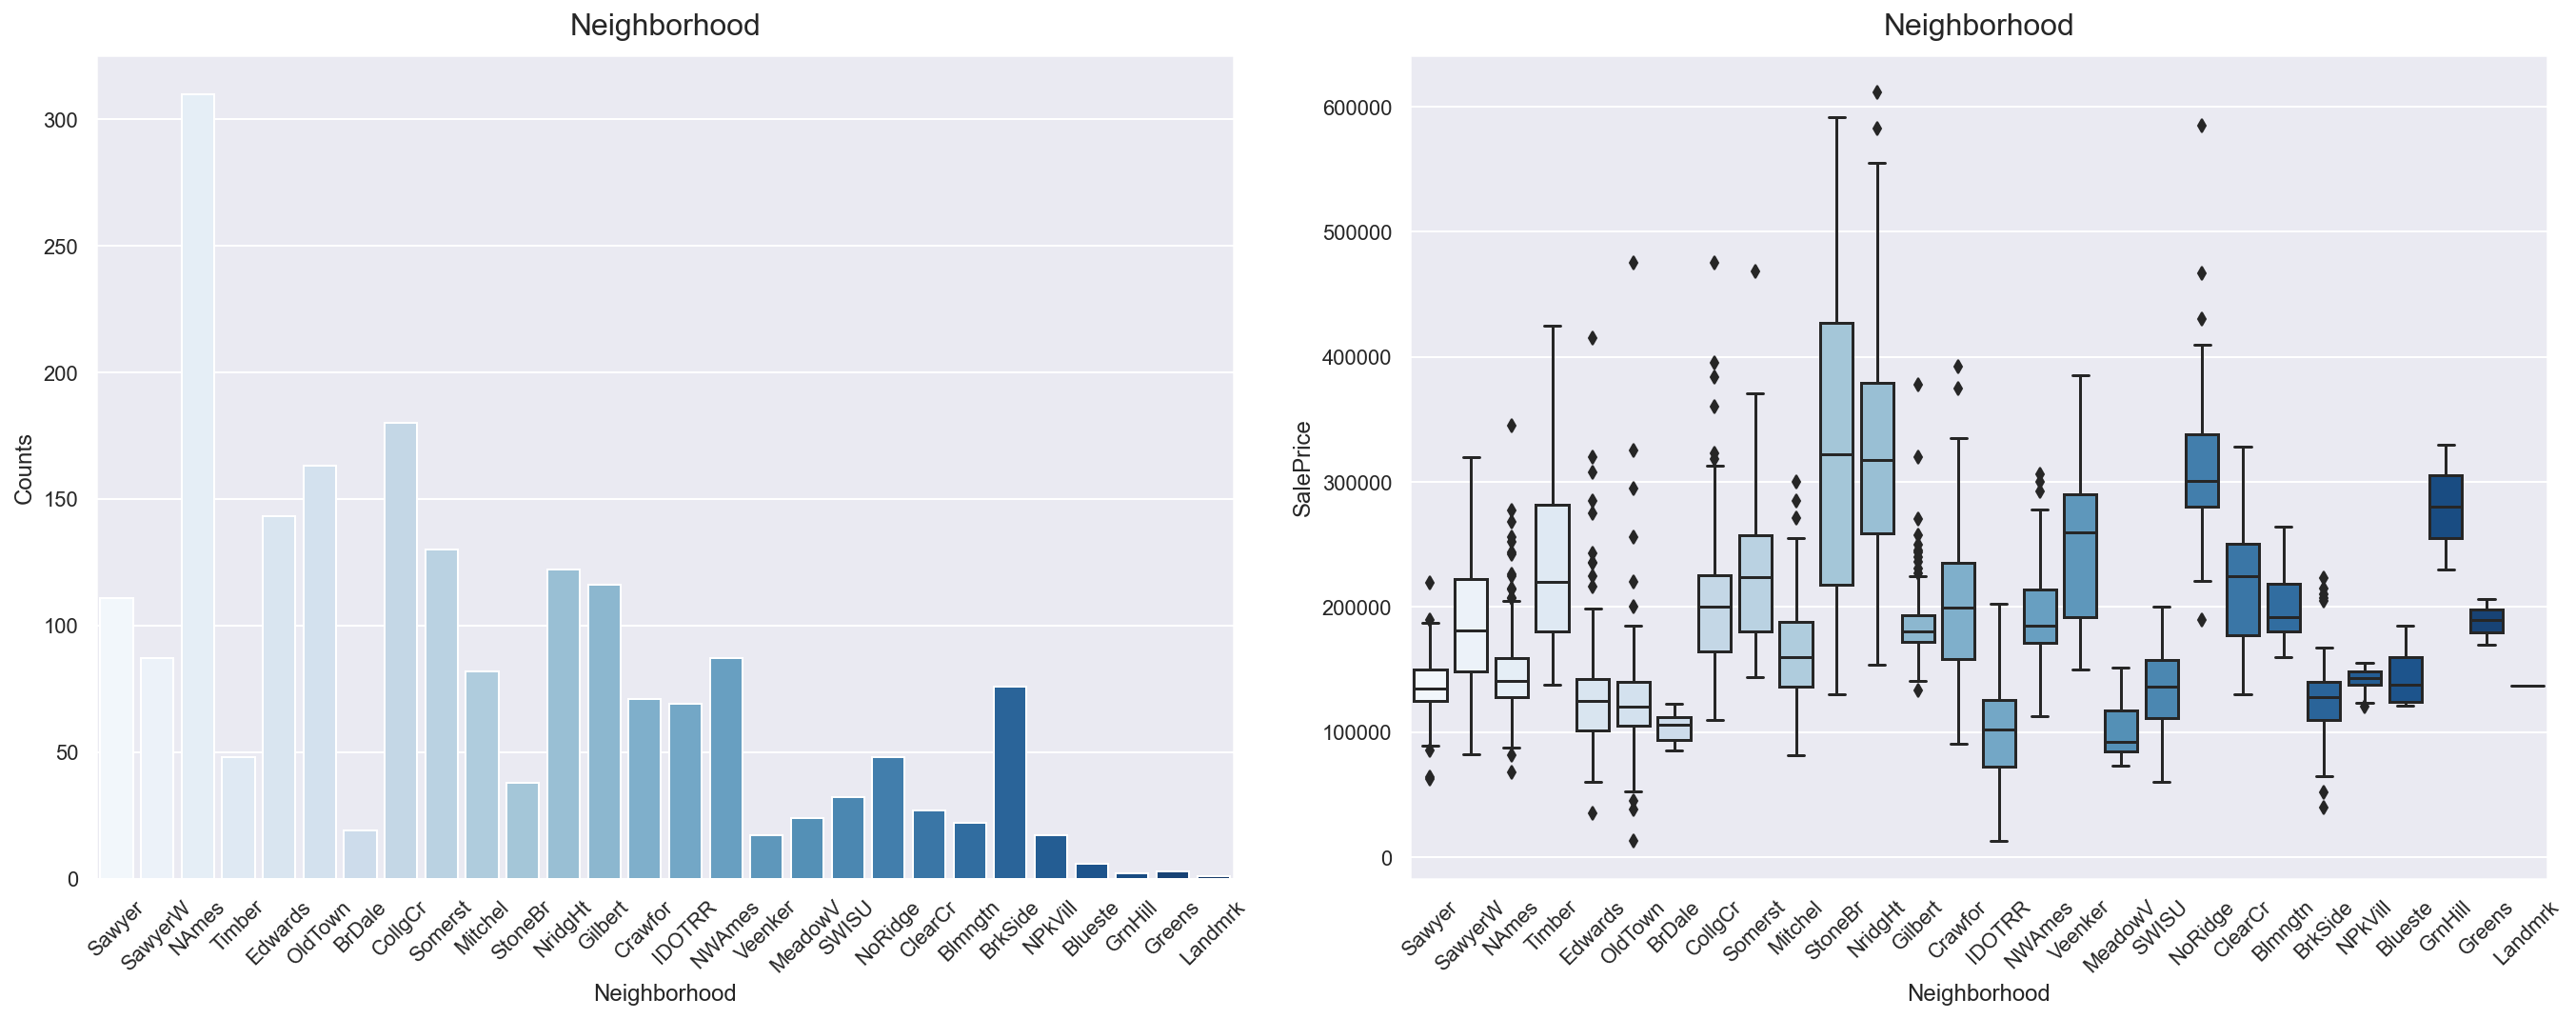

In [253]:
compare_nominal(dataframe=train, 
                column='Neighborhood', 
                y_value='SalePrice', 
                plot_title='', 
                figsize=(20, 8));

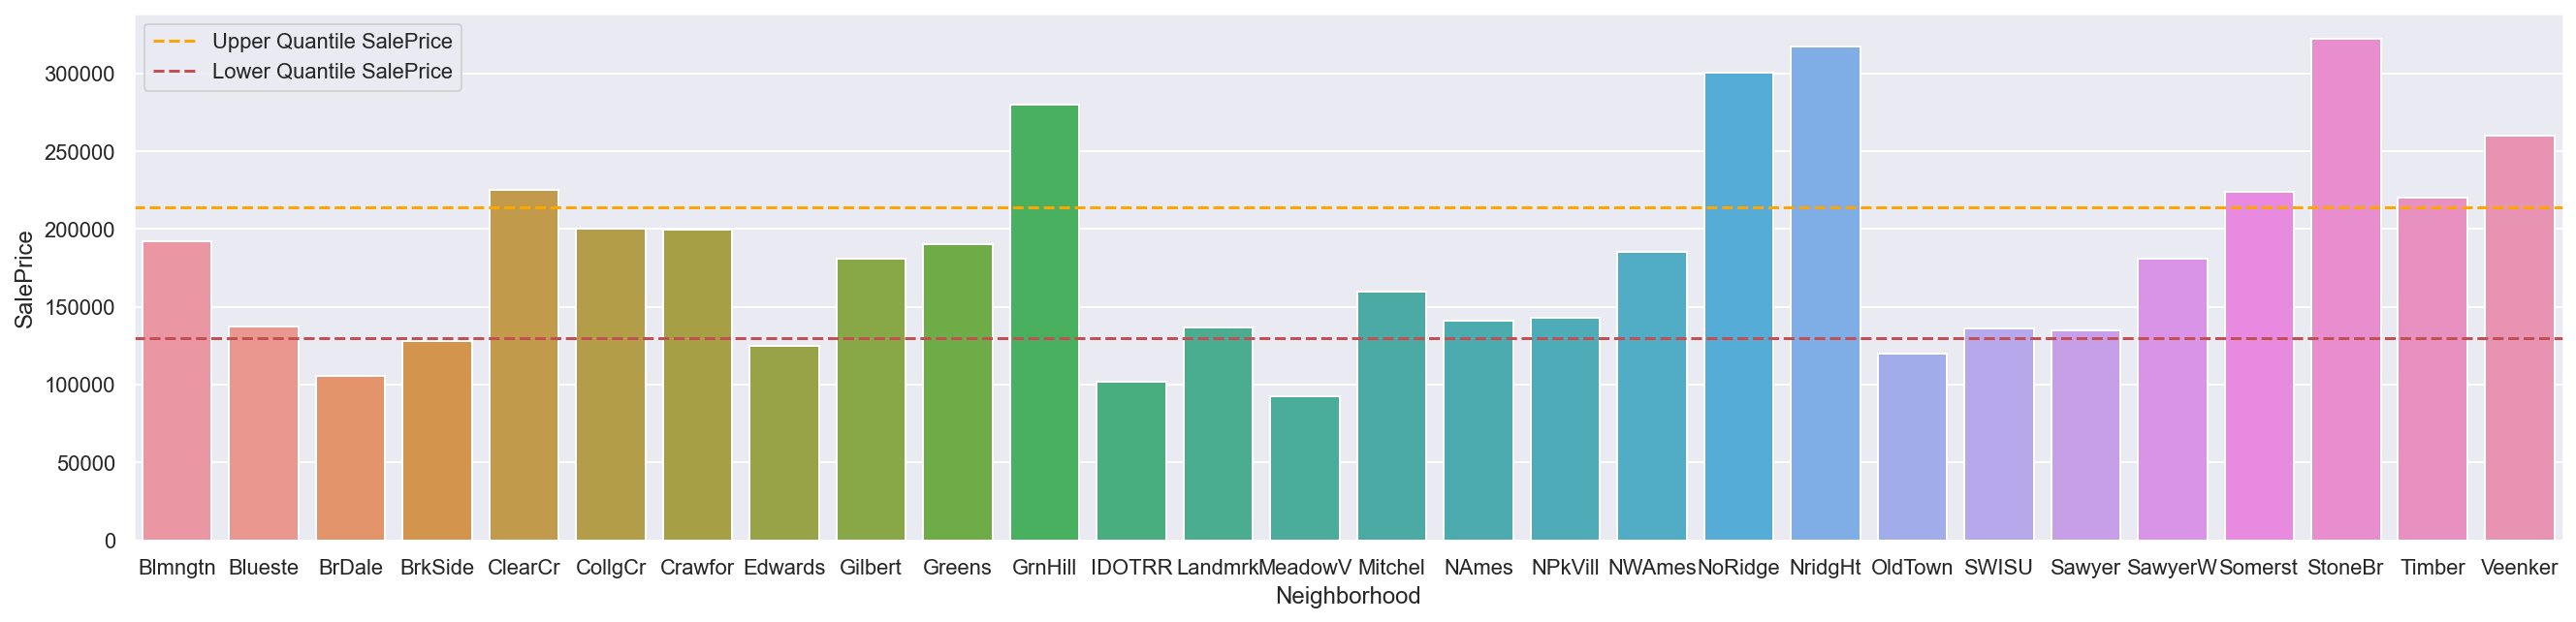

In [254]:
# plot barplot to identify which neighborhoom belongs to the upper and lower quantile of the sale price
plt.figure(figsize=(20,5))
sns.barplot(x=train.groupby('Neighborhood').median().index, y=train.groupby('Neighborhood').median()['SalePrice'])
plt.axhline(y=train['SalePrice'].quantile(0.75), color='orange', linestyle='--', label='Upper Quantile SalePrice');
plt.axhline(y=train['SalePrice'].quantile(0.25), color='r', linestyle='--', label='Lower Quantile SalePrice');
plt.legend();

In [255]:
# Compute the median for the various neighborhood.
neighborhood_median_df = train.groupby('Neighborhood').median()[['SalePrice']]
neighborhood_median_df.head()

SalePrice
Neighborhood           
Blmngtn        192250.0
Blueste        137500.0
BrDale         105500.0
BrkSide        128000.0
ClearCr        225000.0

In [256]:
# identify neighborhood with median sale price higher than the overall upper quantile sale price.
neighborhood_median_df[neighborhood_median_df['SalePrice'] > neighborhood_median_df['SalePrice'].quantile(0.75)]

SalePrice
Neighborhood           
ClearCr        225000.0
GrnHill        280000.0
NoRidge        300750.0
NridgHt        317500.0
Somerst        224000.0
StoneBr        322450.0
Veenker        260000.0

In [257]:
# identify neighborhood with median sale price lower than the overall upper quantile sale price.
neighborhood_median_df[neighborhood_median_df['SalePrice'] < neighborhood_median_df['SalePrice'].quantile(0.25)]

SalePrice
Neighborhood           
BrDale         105500.0
BrkSide        128000.0
Edwards        125000.0
IDOTRR         102000.0
MeadowV         92450.0
OldTown        120000.0
Sawyer         135000.0

In [258]:
# Put the neighborhood into the respective lists.
upper_neighborhood = ['ClearCr', 'GrnHill', 'NoRidge', 'NridgHt', 'Somerst', 'StoneBr', 'Veenker']
lower_neighborhood = ['BrDale', 'BrkSide', 'Edwards', 'IDOTRR', 'MeadowV', 'OldTown', 'Sawyer']

In [259]:
# Map values into the three categories for train and test data set.
train['Neighborhood'] = train['Neighborhood'].map(lambda value: 
                                                  'UpperQuan' if value in upper_neighborhood else 
                                                  'LowerQuan' if value in lower_neighborhood else 'Others')

test['Neighborhood'] = test['Neighborhood'].map(lambda value: 
                                                'UpperQuan' if value in upper_neighborhood else 
                                                'LowerQuan' if value in lower_neighborhood else 'Others')

`Exterior1st`
- VinylSd, CemntBd, Stone and ImStucc seems to display higher sale prices based on their median. these features will be grouped as 1 category. 

`Exterior2nd`
- VinylSd, CemntBd and ImStucc seems to display higher sale prices based on their median. these features will be grouped as 1 category. 

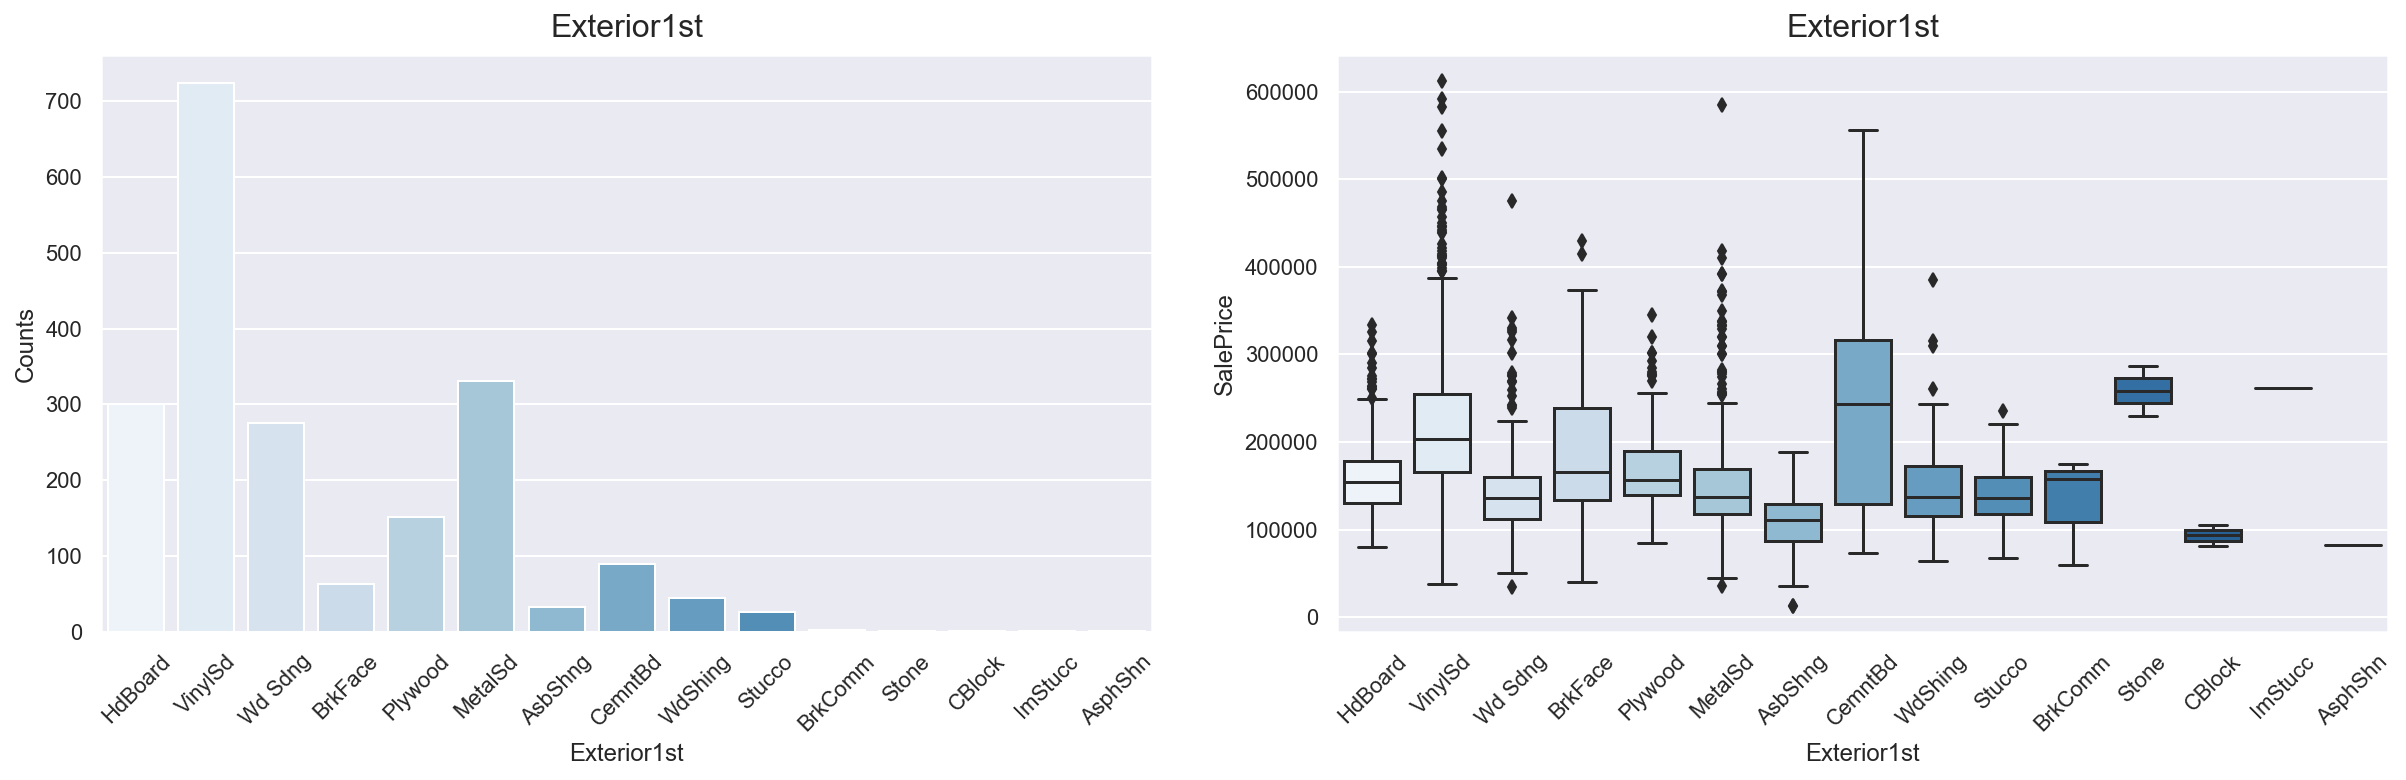

In [260]:
compare_nominal(dataframe=train, 
                column='Exterior1st', 
                y_value='SalePrice', 
                plot_title='', 
                figsize=(18, 6));

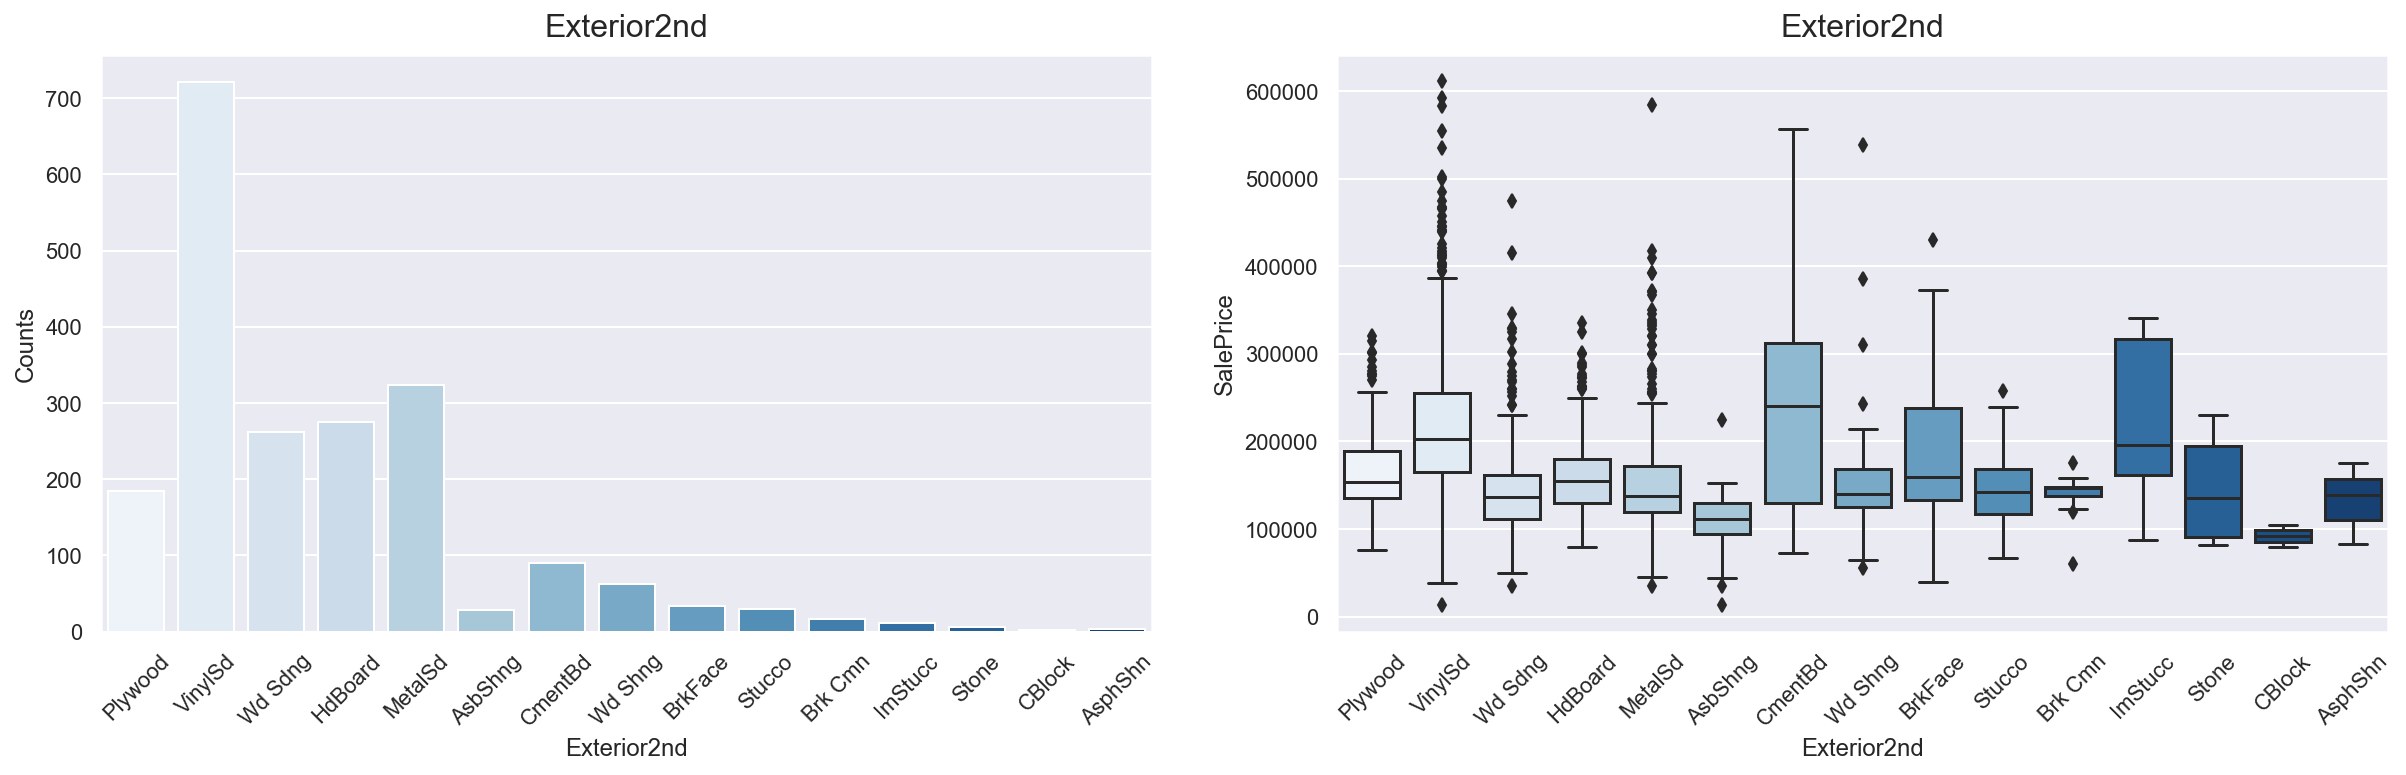

In [261]:
compare_nominal(dataframe=train, 
                column='Exterior2nd', 
                y_value='SalePrice', 
                plot_title='', 
                figsize=(18, 6));

In [262]:
# Map values into the two categories for train and test data set.
train['Exterior1st'] = train['Exterior1st'].map(lambda value: 
                                                'VinylSd_CemntBd_Stone_ImStucc' if value in ['VinylSd', 'CemntBd', 'Stone', 'ImStucc'] else 
                                                'Others')

test['Exterior1st'] = test['Exterior1st'].map(lambda value: 
                                              'VinylSd_CemntBd_Stone_ImStucc' if value in ['VinylSd', 'CemntBd', 'Stone', 'ImStucc'] else 
                                              'Others')

train['Exterior2nd'] = train['Exterior2nd'].map(lambda value: 
                                                'VinylSd_CemntBd_Stone_ImStucc' if value in ['VinylSd', 'CemntBd', 'ImStucc'] else 
                                                'Others')

test['Exterior2nd'] = test['Exterior2nd'].map(lambda value: 
                                              'VinylSd_CemntBd_Stone_ImStucc' if value in ['VinylSd', 'CemntBd', 'ImStucc'] else 
                                              'Others')

### Ordinal Data
1. Feature with sub-categories with no significant differentiation in prices. These will be dropped:
- `LandSlope`

In [263]:
# Recap on the number of nominal features.
len(ordinal_features)

18

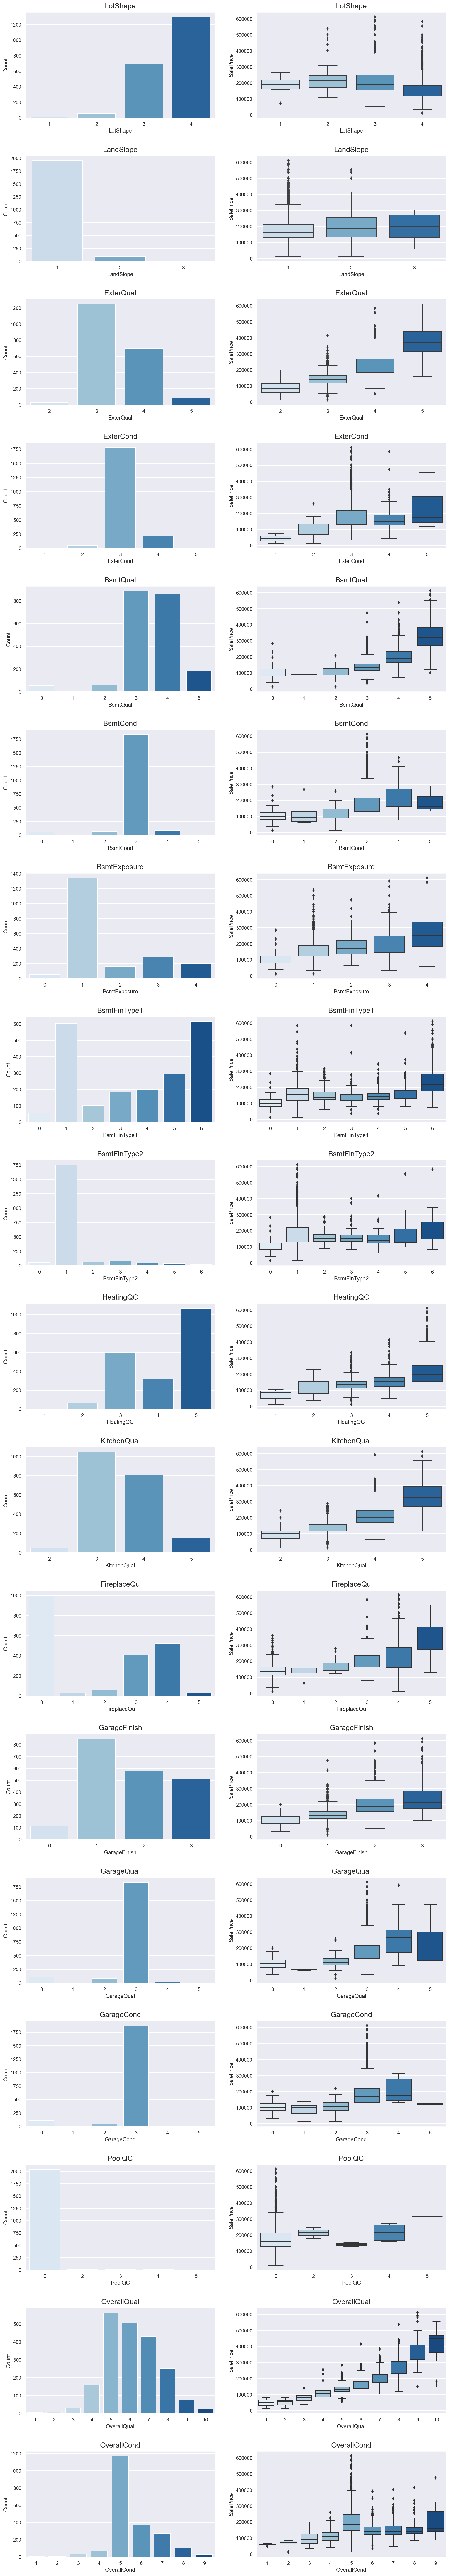

In [264]:
subplot_compare_nominal(dataframe=train, 
                        y_value='SalePrice',
                        list_of_columns=ordinal_features, 
                        plot_title='', 
                        figsize=(15, 80));

In [265]:
# drop 'LandSlope' as it has no significant differentiation in prices.
train.drop(columns=['LandSlope'], inplace=True);
test.drop(columns=['LandSlope'], inplace=True);

In [266]:
# update ordinal features list
ordinal_features.remove('LandSlope')

### Continuous and Discrete Data
1. Heatmap: Of the two features with high correlations, one will be selected to avoid multi-colinearity.
    - `TotalBsmtSF` vs `1stFlrSF` -->  81% correlation 
        - As some properties do not have basement, `1stFlrSF` will be kept.
    - `GarageCars` vs `GarageArea` -->  89% correlation
        - As 'GarageCars' seems to be a more functional outcome of garage size, `GarageCars` will be kept.
    - `TotalRmsAbvGrd` vs `GrLivArea` -->  81% correlation
        - As 'TotalRmsAbvGrd' seems to be a more functional outcome of garage size, `TotalRmsAbvGrd` will be kept.
2. From the bar plot and boxplot below, the number of kitchen above ground seems to be skewed and does not signigicantly differentiate sale price. Hence it will be dropped.

#### Drop one of two features with high correlations

Heatmap: Of the two features with high correlations, one will be selected to avoid multi-colinearity.
- `TotalBsmtSF` vs `1stFlrSF` -->  81% correlation 
    - As some properties do not have basement, `1stFlrSF` will be kept.
- `GarageCars` vs `GarageArea` -->  89% correlation
    - As 'GarageCars' seems to be a more functional outcome of garage size, `GarageCars` will be kept.
- `TotalRmsAbvGrd` vs `GrLivArea` -->  81% correlation
    - As 'TotalRmsAbvGrd' seems to be a more functional outcome of garage size, `TotalRmsAbvGrd` will be kept.

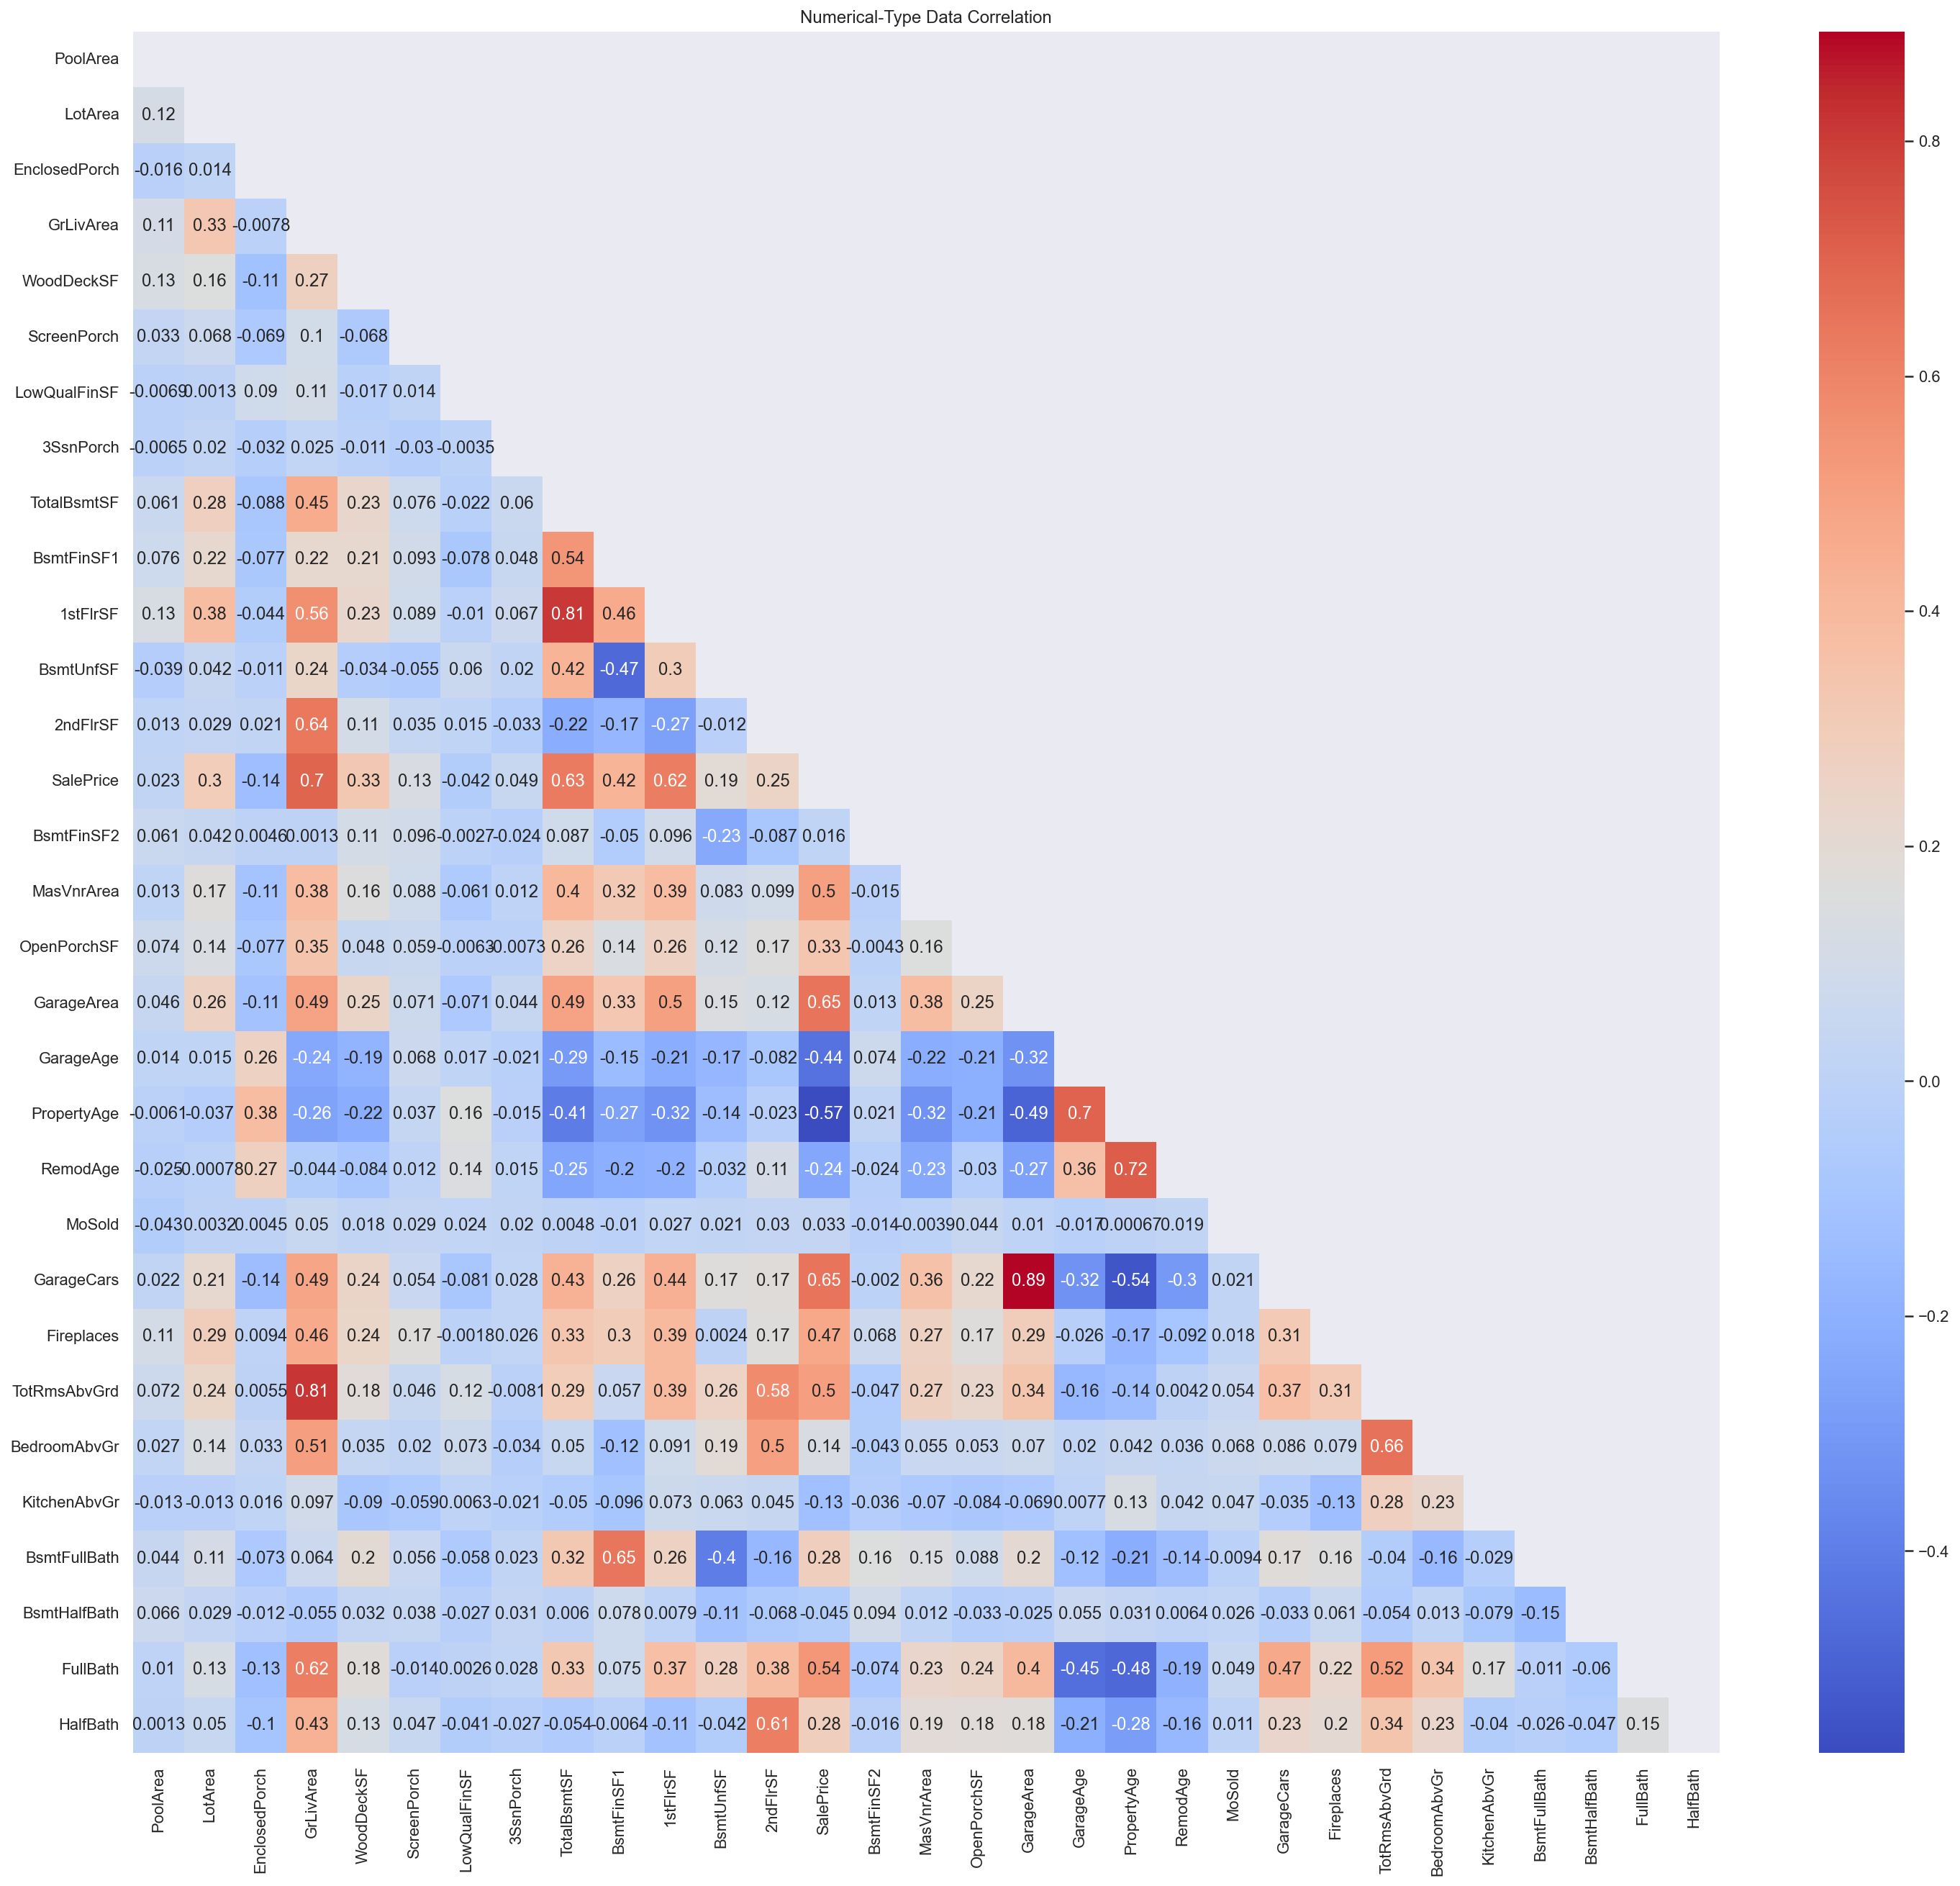

In [267]:
# Plot correlations of numeric features
# create mask for heatmap
custom_mask = np.zeros_like(train[cont_features+discrete_features].corr())   
custom_mask[np.triu_indices_from(custom_mask)] = True

plt.figure(figsize=(22, 22))
sns.heatmap(train[cont_features+discrete_features].corr(), annot=True, mask=custom_mask, cmap='coolwarm').set_title("Numerical-Type Data Correlation");

In [268]:
# drop TotalBsmtSF GarageArea GrLivArea columns.
train.drop(columns=['TotalBsmtSF', 'GarageArea', 'GrLivArea'], inplace=True)
test.drop(columns=['TotalBsmtSF', 'GarageArea', 'GrLivArea'], inplace=True)

In [269]:
# Update cont features list
cont_features.remove('TotalBsmtSF')
cont_features.remove('GarageArea')
cont_features.remove('GrLivArea')

In [270]:
len(cont_features)

18

In [271]:
train[cont_features].dtypes


PoolArea         float64
LotArea          float64
EnclosedPorch    float64
WoodDeckSF       float64
ScreenPorch      float64
LowQualFinSF     float64
3SsnPorch        float64
BsmtFinSF1       float64
1stFlrSF         float64
BsmtUnfSF        float64
2ndFlrSF         float64
SalePrice        float64
BsmtFinSF2       float64
MasVnrArea       float64
OpenPorchSF      float64
GarageAge        float64
PropertyAge      float64
RemodAge         float64
dtype: object

#### Drop features that has skewed distribution and insiginificant differentiation between unique values

From the bar plot and boxplot below, the number of kitchen above ground seems to be skewed and does not signigicantly differentiate sale price. Hence it will be dropped.

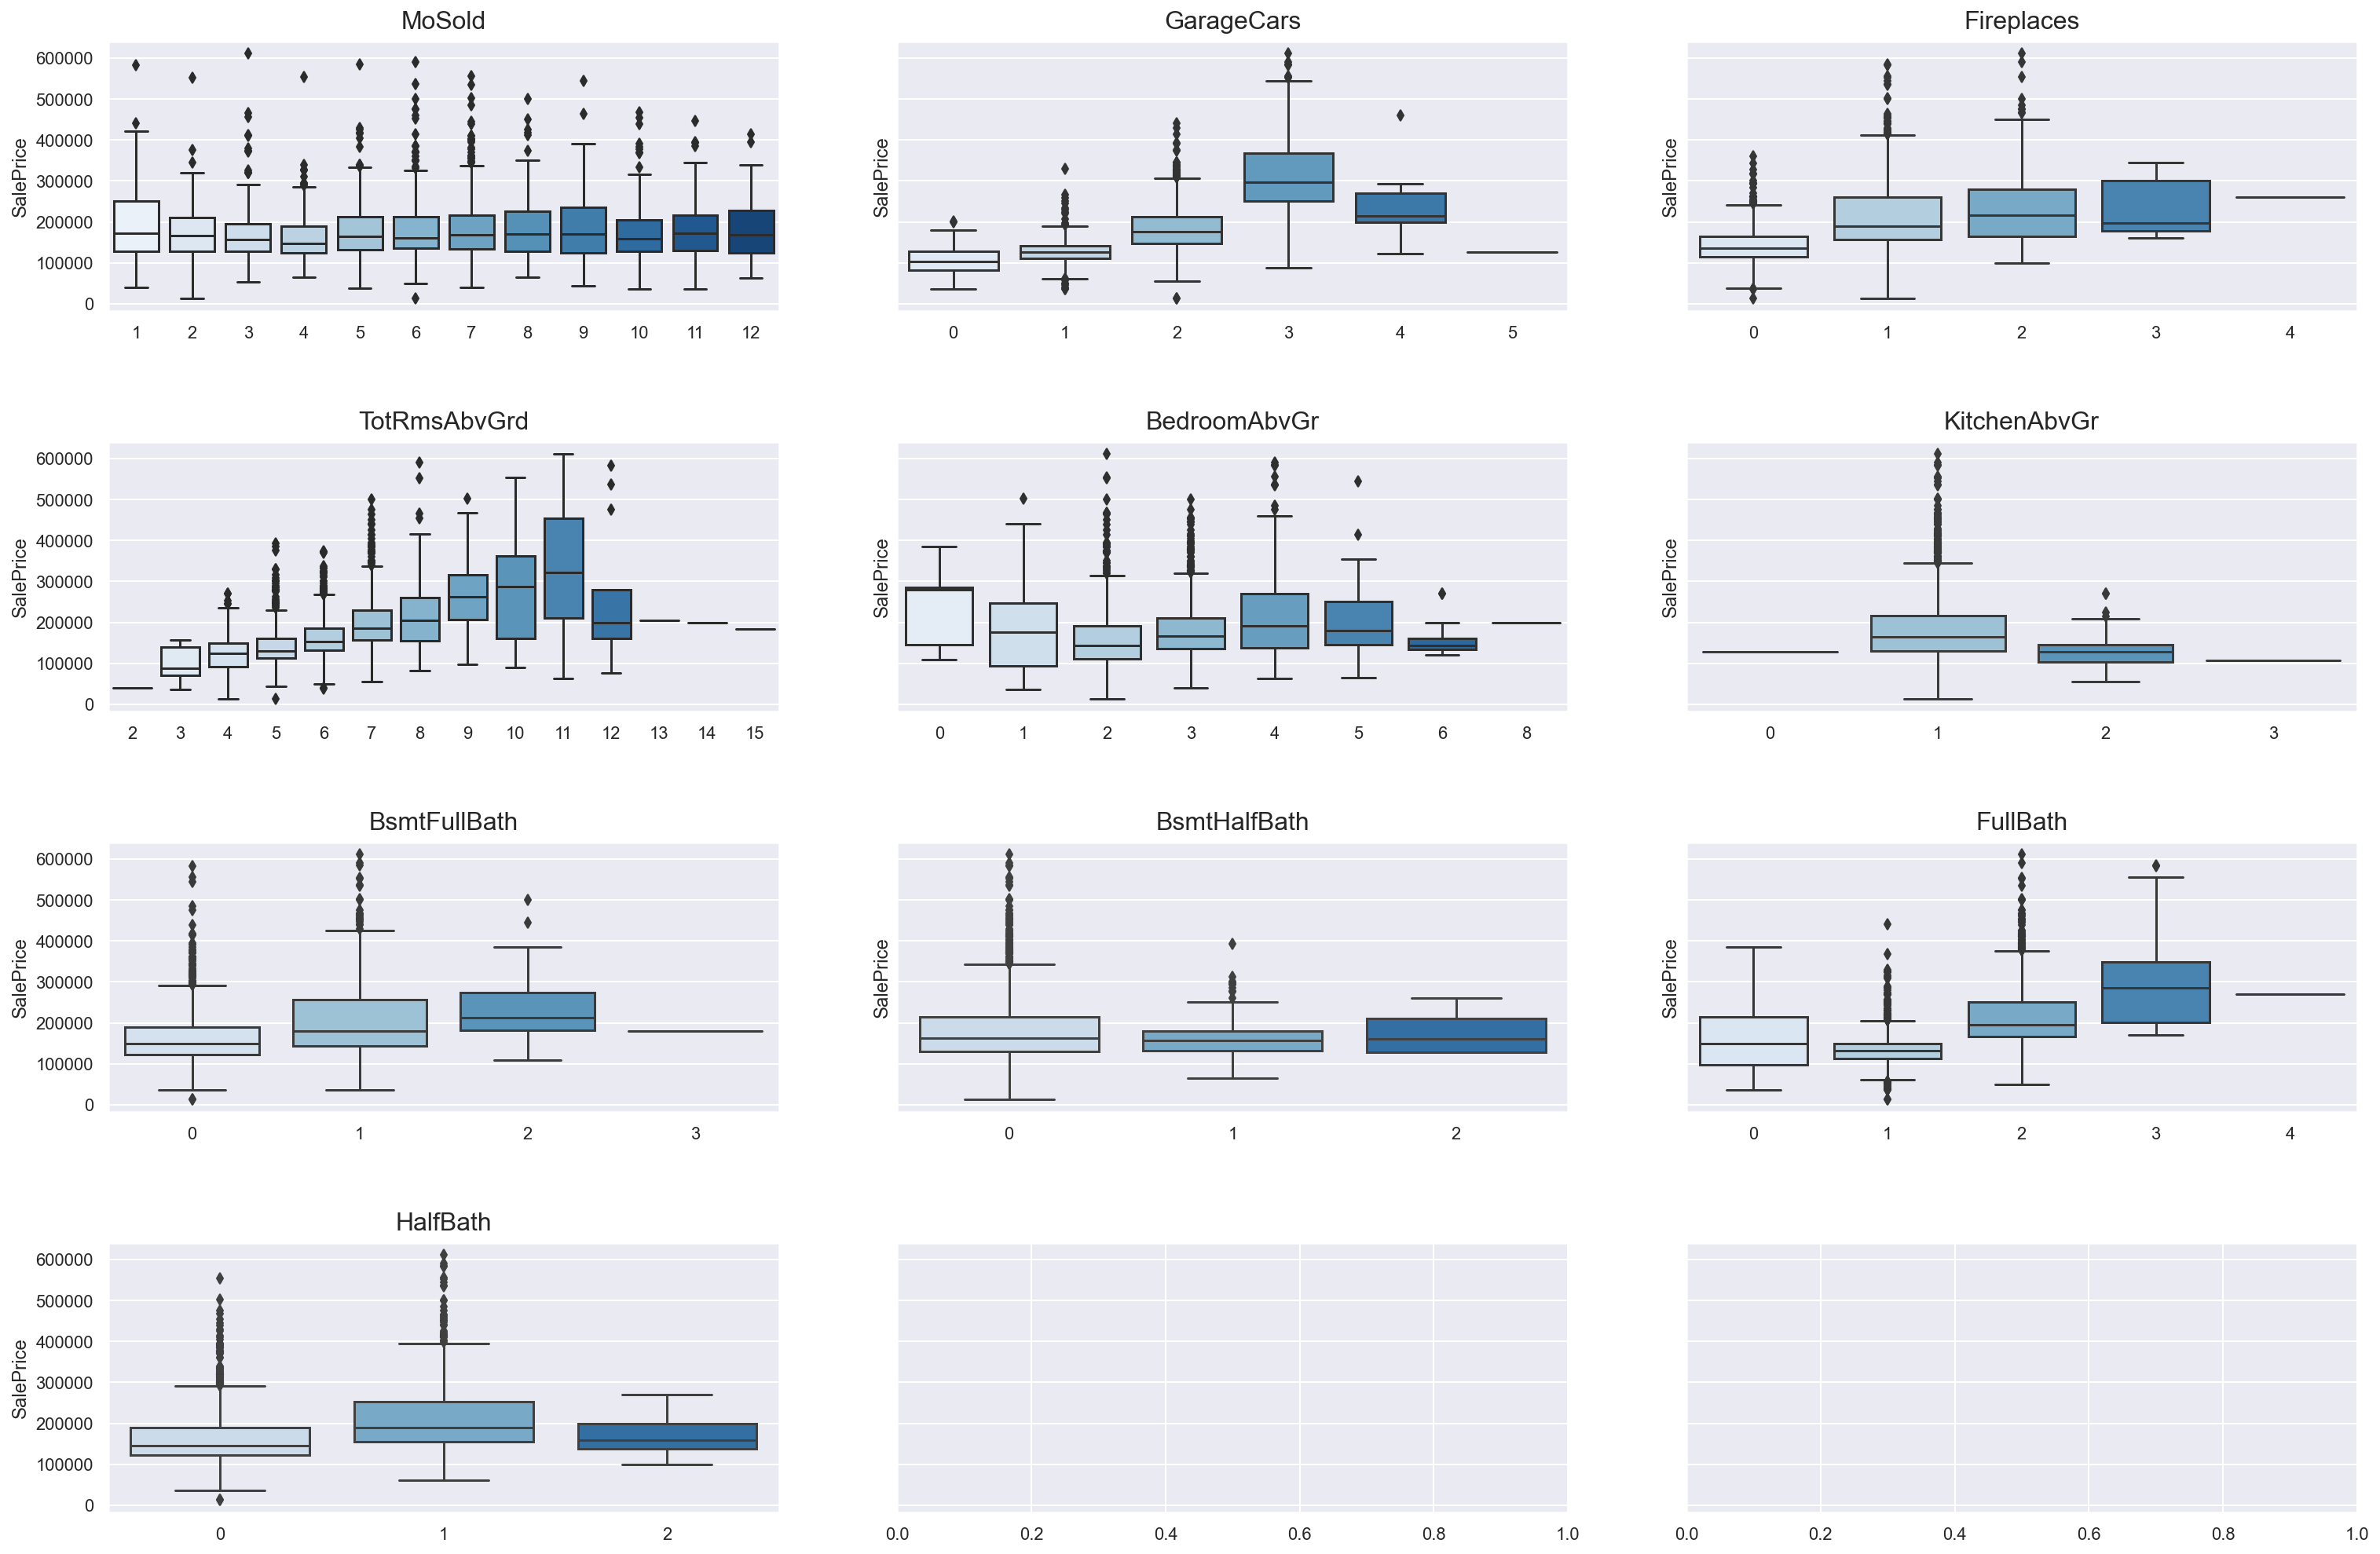

In [272]:
subplot_boxplot(dataframe=train, 
                y_value='SalePrice', 
                list_of_columns=discrete_features,
                list_of_titles=discrete_features, 
                list_of_xlabels=['']*len(discrete_features),
                ylabels='SalePrice',
                plot_title='', 
                figsize=(22,15));

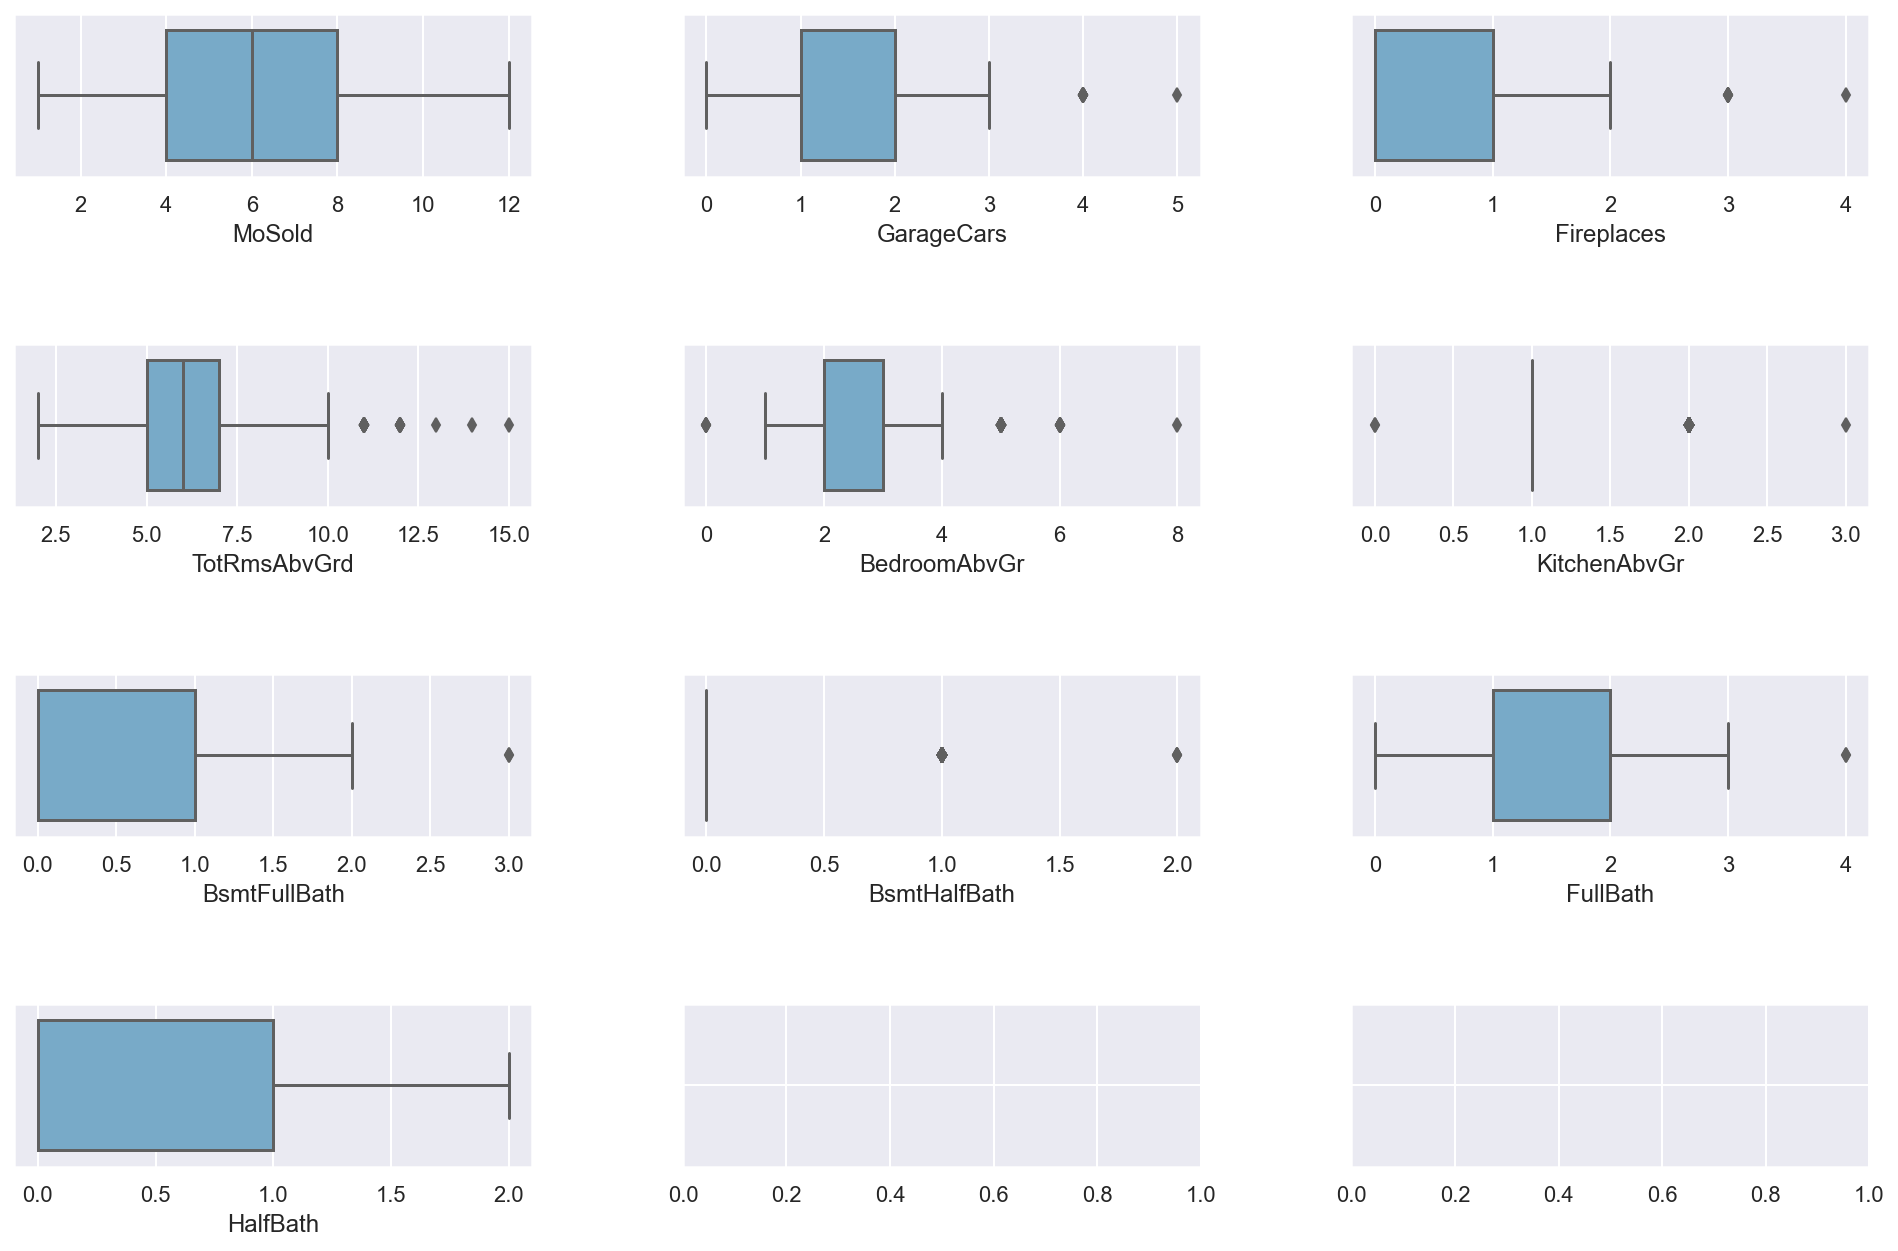

In [273]:
subplot_boxplot(dataframe=train, y_value=None, 
                list_of_columns=discrete_features, list_of_titles=['']*len(discrete_features), 
                list_of_xlabels=discrete_features, ylabels=None, 
                plot_title=None, figsize=(15,10))

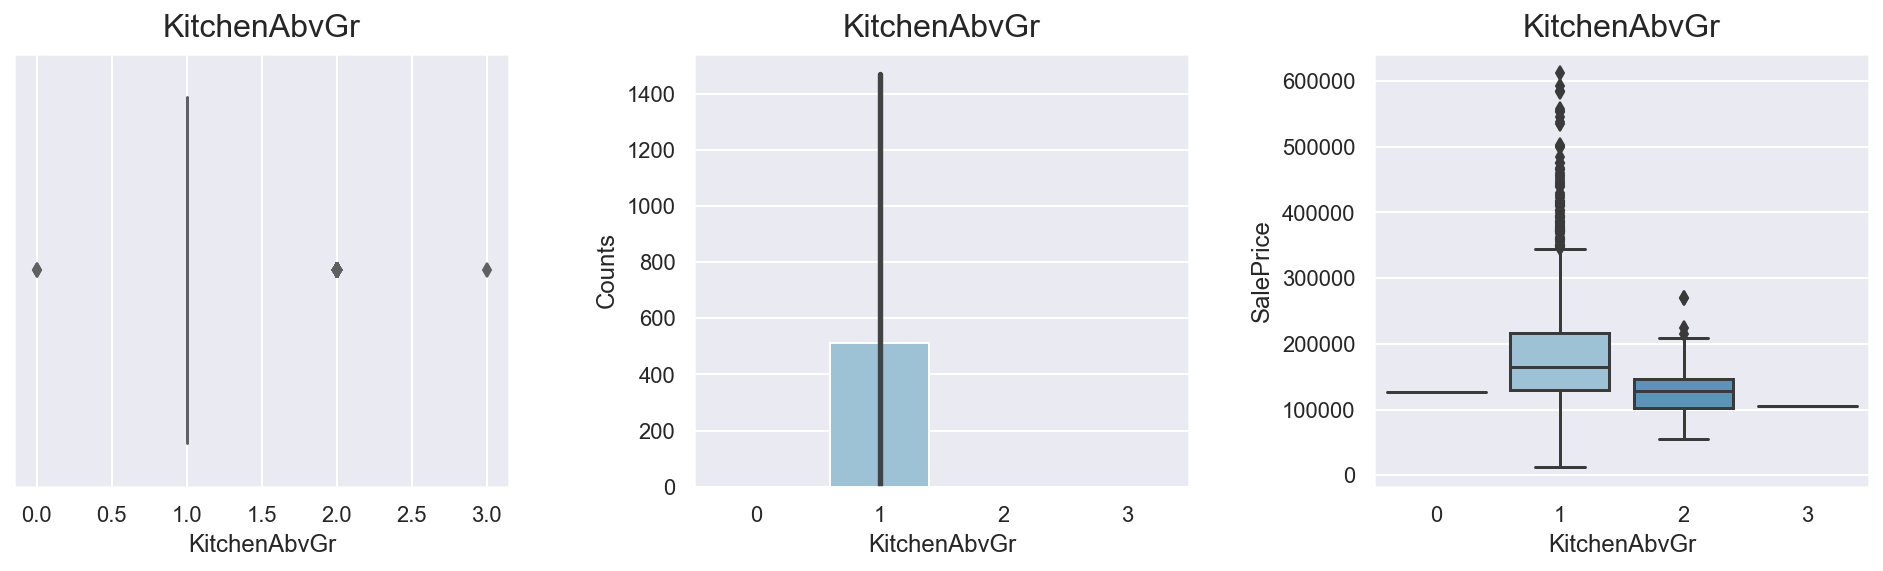

In [274]:
compare_discrete(dataframe=train, column='KitchenAbvGr', y_value='SalePrice', plot_title='', figsize=(15,5));

In [275]:
# drop KitchenAbvGr column
train.drop(columns=['KitchenAbvGr'], inplace=True)
test.drop(columns=['KitchenAbvGr'], inplace=True)

# Update discrete features list
discrete_features.remove('KitchenAbvGr')

---
### Save cleaned dataframe as csv file.

In [276]:
# Display and do final check on the train data set before saving
train.head()

MSSubClass  MSZoning  LotArea  Street  LotShape LandContour Neighborhood  \
0      60_20  FV_RL_RH  13517.0       1         3      Others    LowerQuan   
1      60_20  FV_RL_RH  11492.0       1         3      Others       Others   
2      60_20  FV_RL_RH   7922.0       1         4      Others       Others   
3      60_20  FV_RL_RH   9802.0       1         4      Others       Others   
4     Others  FV_RL_RH  14235.0       1         3      Others       Others   

  Condition1 Condition2     BldgType     HouseStyle  OverallQual  OverallCond  \
0     Others       Norm  1Fam_TwnhsE  1Story_2Story            6            8   
1       Norm       Norm  1Fam_TwnhsE  1Story_2Story            7            5   
2       Norm       Norm  1Fam_TwnhsE  1Story_2Story            5            7   
3       Norm       Norm  1Fam_TwnhsE  1Story_2Story            5            5   
4       Norm       Norm  1Fam_TwnhsE         Others            6            8   

  RoofStyle RoofMatl                    Exterior1st  \
0    Others  CompShg                         Others   
1    Others  CompShg  VinylSd_CemntBd_Stone_ImStucc   
2    Others  CompShg  VinylSd_CemntBd_Stone_ImStucc   
3    Others  CompShg  VinylSd_CemntBd_Stone_ImStucc   
4    Others  CompShg                         Others   

                     Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0                         Others     Others       289.0          4          3   
1  VinylSd_CemntBd_Stone_ImStucc     Others       132.0          4          3   
2  VinylSd_CemntBd_Stone_ImStucc     Others         0.0          3          4   
3  VinylSd_CemntBd_Stone_ImStucc     Others         0.0          3          3   
4                         Others     Others         0.0          3          3   

  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0     Others         3         3             1             6       533.0   
1      PConc         4         3             1             6       637.0   
2     Others         3         3             1             6       731.0   
3      PConc         4         3             1             1         0.0   
4      PConc         2         4             1             1         0.0   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  ... LowQualFinSF  BsmtFullBath  \
0             1         0.0      192.0  ...          0.0             0   
1             1         0.0      276.0  ...          0.0             1   
2             1         0.0      326.0  ...          0.0             1   
3             1         0.0      384.0  ...          0.0             0   
4             1         0.0      676.0  ...          0.0             0   

   BsmtHalfBath FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  \
0             0        2         1             3            4             6   
1             0        2         1             4            4             8   
2             0        1         0             3            4             5   
3             0        2         1             3            3             7   
4             0        2         0             3            3             6   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0         Typ           0            0      Attchd             2           2   
1         Typ           1            3      Attchd             2           2   
2         Typ           0            0      Others             1           1   
3         Typ           0            0     BuiltIn             3           2   
4         Typ           0            0      Others             1           2   

  GarageQual  GarageCond  PavedDrive WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0          3           3           1        0.0         44.0            0.0   
1          3           3           1        0.0         74.0            0.0   
2          3           3           1        0.0         52.0            0.0   
3          3           3           1      100.0       

In [277]:
# Display and do final check on the train data set before saving
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2051 non-null   object 
 1   MSZoning       2051 non-null   object 
 2   LotArea        2051 non-null   float64
 3   Street         2051 non-null   int64  
 4   LotShape       2051 non-null   int64  
 5   LandContour    2051 non-null   object 
 6   Neighborhood   2051 non-null   object 
 7   Condition1     2051 non-null   object 
 8   Condition2     2051 non-null   object 
 9   BldgType       2051 non-null   object 
 10  HouseStyle     2051 non-null   object 
 11  OverallQual    2051 non-null   int64  
 12  OverallCond    2051 non-null   int64  
 13  RoofStyle      2051 non-null   object 
 14  RoofMatl       2051 non-null   object 
 15  Exterior1st    2051 non-null   object 
 16  Exterior2nd    2051 non-null   object 
 17  MasVnrType     2051 non-null   object 
 18  MasVnrAr

In [278]:
# Display and do final check on the train data set before saving
train.describe()

LotArea       Street     LotShape  OverallQual  OverallCond  \
count    2051.000000  2051.000000  2051.000000  2051.000000  2051.000000   
mean    10065.208191     0.996587     3.595807     6.112140     5.562165   
std      6742.488909     0.058335     0.566514     1.426271     1.104497   
min      1300.000000     0.000000     1.000000     1.000000     1.000000   
25%      7500.000000     1.000000     3.000000     5.000000     5.000000   
50%      9430.000000     1.000000     4.000000     6.000000     5.000000   
75%     11513.500000     1.000000     4.000000     7.000000     6.000000   
max    159000.000000     1.000000     4.000000    10.000000     9.000000   

        MasVnrArea    ExterQual    ExterCond     BsmtQual     BsmtCond  \
count  2051.000000  2051.000000  2051.000000  2051.000000  2051.000000   
mean     98.626524     3.406143     3.085812     3.490005     2.929303   
std     174.324690     0.587962     0.372792     0.901637     0.572009   
min       0.000000     2.000000     1.000000     0.000000     0.000000   
25%       0.000000     3.000000     3.000000     3.000000     3.000000   
50%       0.000000     3.000000     3.000000     4.000000     3.000000   
75%     159.000000     4.000000     3.000000     4.000000     3.000000   
max    1600.000000     5.000000     5.000000     5.000000     5.000000   

       BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2   BsmtFinSF2  \
count   2051.000000   2051.000000  2051.000000   2051.000000  2051.000000   
mean       1.630424      3.564603   442.084837      1.274988    47.935641   
std        1.077907      2.125592   461.195041      0.949173   164.964052   
min        0.000000      0.000000     0.000000      0.000000     0.000000   
25%        1.000000      1.000000     0.000000      1.000000     0.000000   
50%        1.000000      4.000000   368.000000      1.000000     0.000000   
75%        2.000000      6.000000   733.500000      1.000000     0.000000   
max        4.000000      6.000000  5644.000000      6.000000  1474.000000   

         BsmtUnfSF    HeatingQC   CentralAir     1stFlrSF     2ndFlrSF  \
count  2051.000000  2051.000000  2051.000000  2051.000000  2051.000000   
mean    567.451487     4.158459     0.931253  1164.488055   329.329108   
std     445.022846     0.964112     0.253085   396.446923   425.671046   
min       0.000000     1.000000     0.000000   334.000000     0.000000   
25%     220.000000     3.000000     1.000000   879.500000     0.000000   
50%     474.000000     5.000000     1.000000  1093.000000     0.000000   
75%     811.000000     5.000000     1.000000  1405.000000   692.500000   
max    2336.000000     5.000000     1.000000  5095.000000  1862.000000   

       LowQualFinSF  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count   2051.000000   2051.000000   2051.000000  2051.000000  2051.000000   
mean       5.512921      0.427109      0.063384     1.577279     0.371039   
std       51.068870      0.522589      0.251590     0.549279     0.501043   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     1.000000     0.000000   
50%        0.000000      0.000000      0.000000     2.000000     0.000000   
75%        0.000000      1.000000      0.000000     2.000000     1.000000   
max     1064.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenQual  TotRmsAbvGrd   Fireplaces  FireplaceQu  \
count   2051.000000  2051.000000   2051.000000  2051.000000  2051.000000   
mean       2.843491     3.517309      6.435885     0.590931     1.763530   
std        0.826618     0.665577      1.560225     0.638516     1.807074   
min        0.000000     2.000000      2.000000     0.000000     0.000000   
25%        2.000000     3.000000      5.000000     0.000000     0.000000   
50%        3.000000     3.000000      6.000000     1.000000     1.000000   
75%        3.000000     4.000000      7.000000     1.000000     4.000000  

In [279]:
# Save cleaned dataframe as csv file.
train.to_csv('../datasets/cleaned_train.csv', index=False)

In [280]:
# Display and do final check on the train data set before saving
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             878 non-null    int64  
 1   MSSubClass     878 non-null    object 
 2   MSZoning       878 non-null    object 
 3   LotArea        878 non-null    float64
 4   Street         878 non-null    int64  
 5   LotShape       878 non-null    int64  
 6   LandContour    878 non-null    object 
 7   Neighborhood   878 non-null    object 
 8   Condition1     878 non-null    object 
 9   Condition2     878 non-null    object 
 10  BldgType       878 non-null    object 
 11  HouseStyle     878 non-null    object 
 12  OverallQual    878 non-null    int64  
 13  OverallCond    878 non-null    int64  
 14  RoofStyle      878 non-null    object 
 15  RoofMatl       876 non-null    object 
 16  Exterior1st    878 non-null    object 
 17  Exterior2nd    878 non-null    object 
 18  MasVnrType

In [281]:
# Save cleaned dataframe as csv file.
test.to_csv('../datasets/cleaned_test.csv', index=False)

# <center> **End of Notebook**